## Prepare data

### Only consider remove outliers

Read all the data. Apply simple outlier removal by validity range.

In [11]:
from utility import read_all_test_data_from_path
import numpy as np
import pandas as pd


def remove_outliers(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges. 
    Define a valid range of temperature and voltage. 
    Use ffil function to replace the invalid measurement with the previous value.
    '''
    df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
    df['temperature'] = df['temperature'].ffill()

    df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
    df['voltage'] = df['voltage'].ffill()

    df['position'] = df['position'].where(df['position'] >= 0, np.nan)
    df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
    df['position'] = df['position'].ffill()


base_dictionary = '../../projects/maintenance_industry_4_2024/dataset/training_data/'
df_data = read_all_test_data_from_path(base_dictionary, remove_outliers, is_plot=False)

## Define experiment supporting function

### Training the model for all motors, using all the features.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from utility import run_cross_val

def run_all_motors(df_data, mdl, window_size=0, single_run_result=True, mdl_type='reg'):
    all_results = []
    # Loop over all the six motors.
    for i in range(1, 7):
        # Get the name of the response variable.
        y_name = f'data_motor_{i}_label'
    
        # Seperate features and the response variable.
        # Remove the irrelavent features.
        df_x = df_data.drop(columns=[y_name])
        # Get y.
        y = df_data.loc[:, y_name]

        print(f'Model for predicting the label of motor {i}:')
        # Run cross validation.
        df_perf = run_cross_val(mdl, df_x, y, window_size=window_size, single_run_result=single_run_result, mdl_type=mdl_type)
        # Print the mean performance.
        print(df_perf.mean())
        print('\n')

        all_results.append(df_perf)

    return all_results

## Logistic regression

In [13]:
# We pick five tests with label 1.
df_data = df_data[df_data['test_condition'].isin(['20240325_155003', '20240425_093699', '20240425_094425', '20240426_140055', '20240426_141190'])]

### Window size = 0

Model for predicting the label of motor 1:

 New cv run:

Training performance, accuracy is: 0.9501940491591203
Training performance, precision is: 0.2634146341463415
Training performance, recall: 0.9473684210526315
Training performance, F1: 0.41221374045801523


Prediction performance, accuracy is: 0.8057726999398677
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


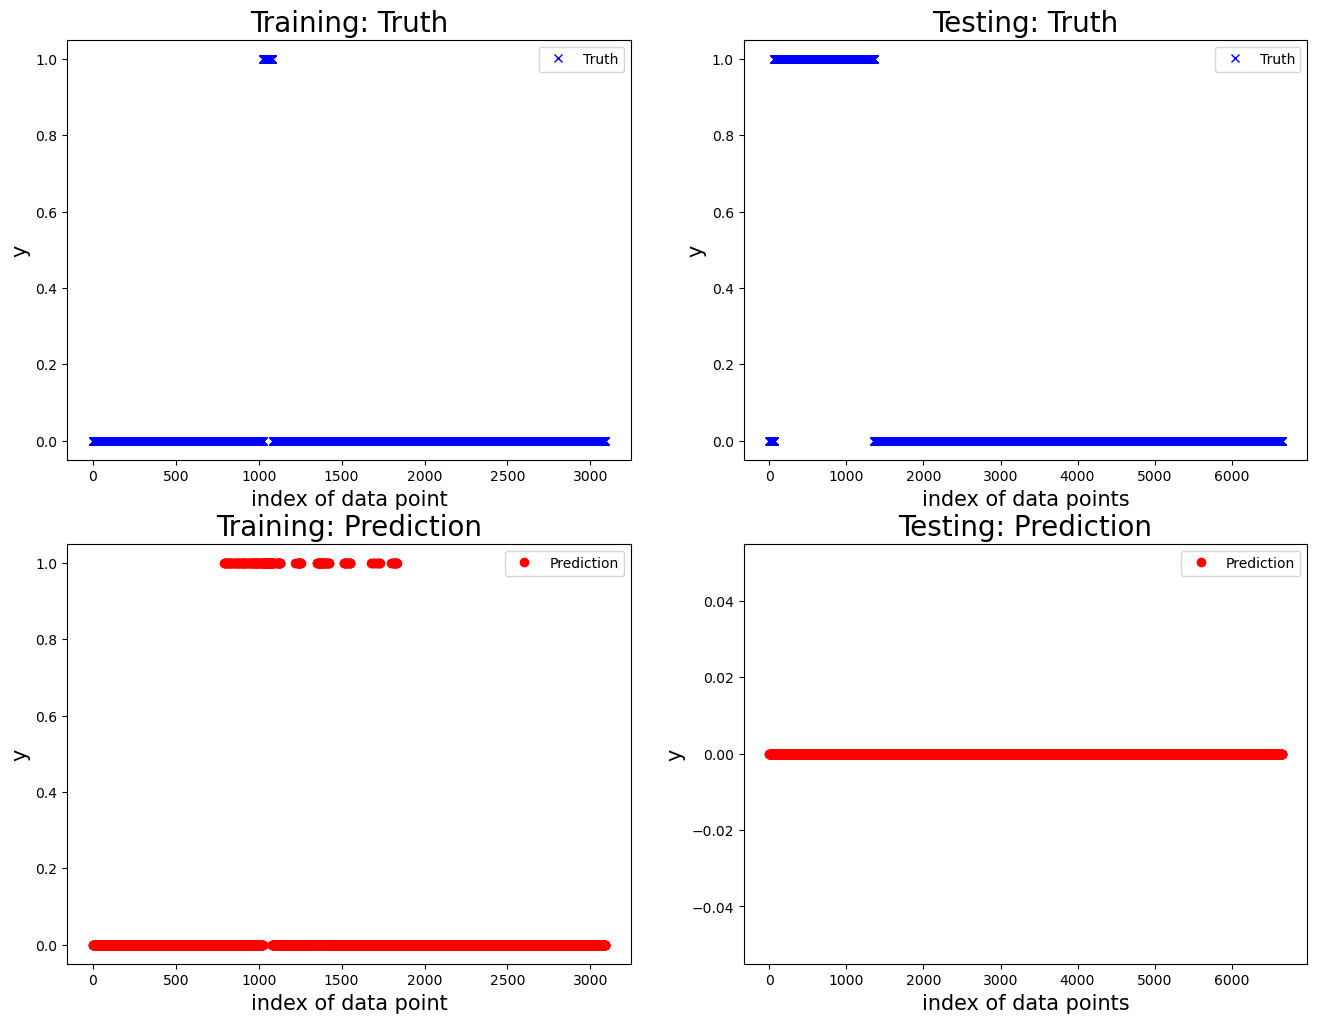


 New cv run:

Training performance, accuracy is: 0.970776831703984
Training performance, precision is: 0.8484059856864021
Training performance, recall: 0.9666419570051891
Training performance, F1: 0.9036729036729036


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


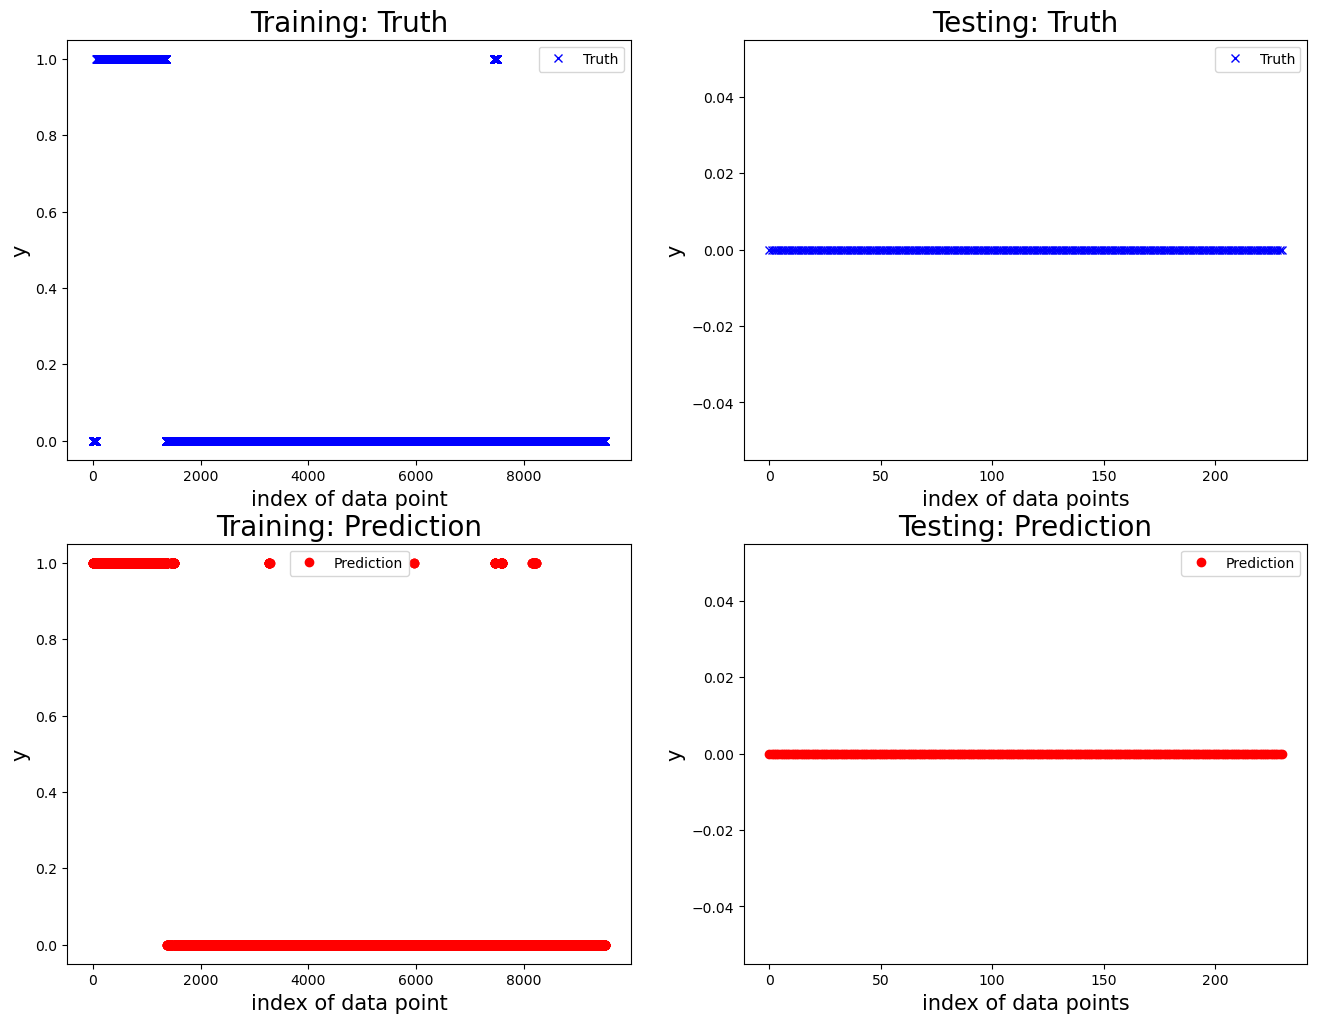


 New cv run:

Training performance, accuracy is: 0.9946646341463414
Training performance, precision is: 0.9716981132075472
Training performance, recall: 0.9925871015567087
Training performance, F1: 0.982031536486982


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


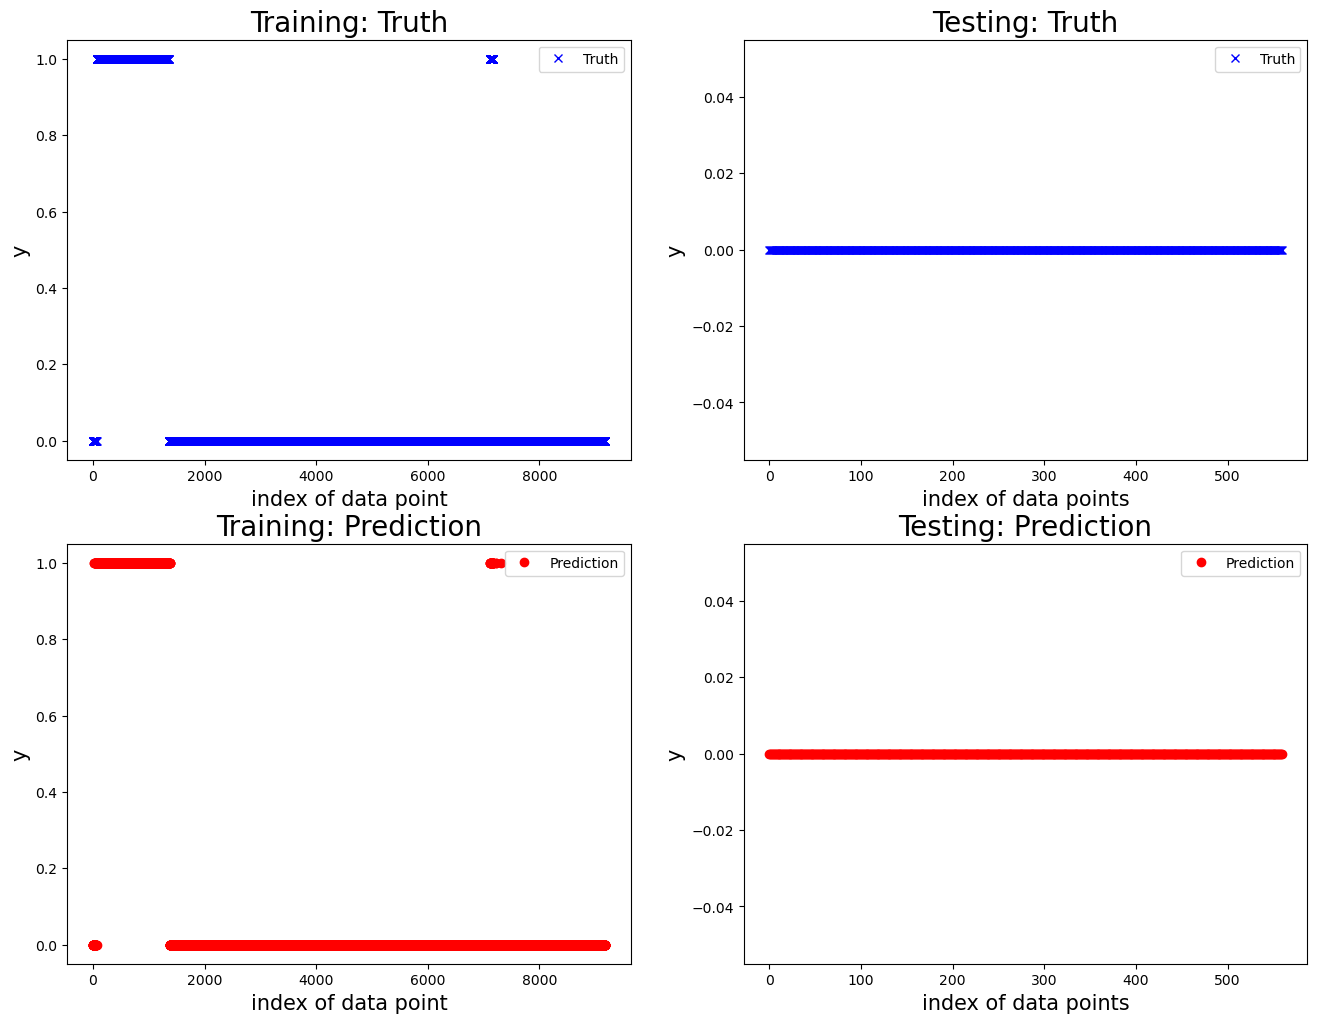


 New cv run:

Training performance, accuracy is: 0.986551724137931
Training performance, precision is: 0.9169623846699787
Training performance, recall: 1.0
Training performance, F1: 0.9566827101073676


Prediction performance, accuracy is: 0.9454022988505747
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


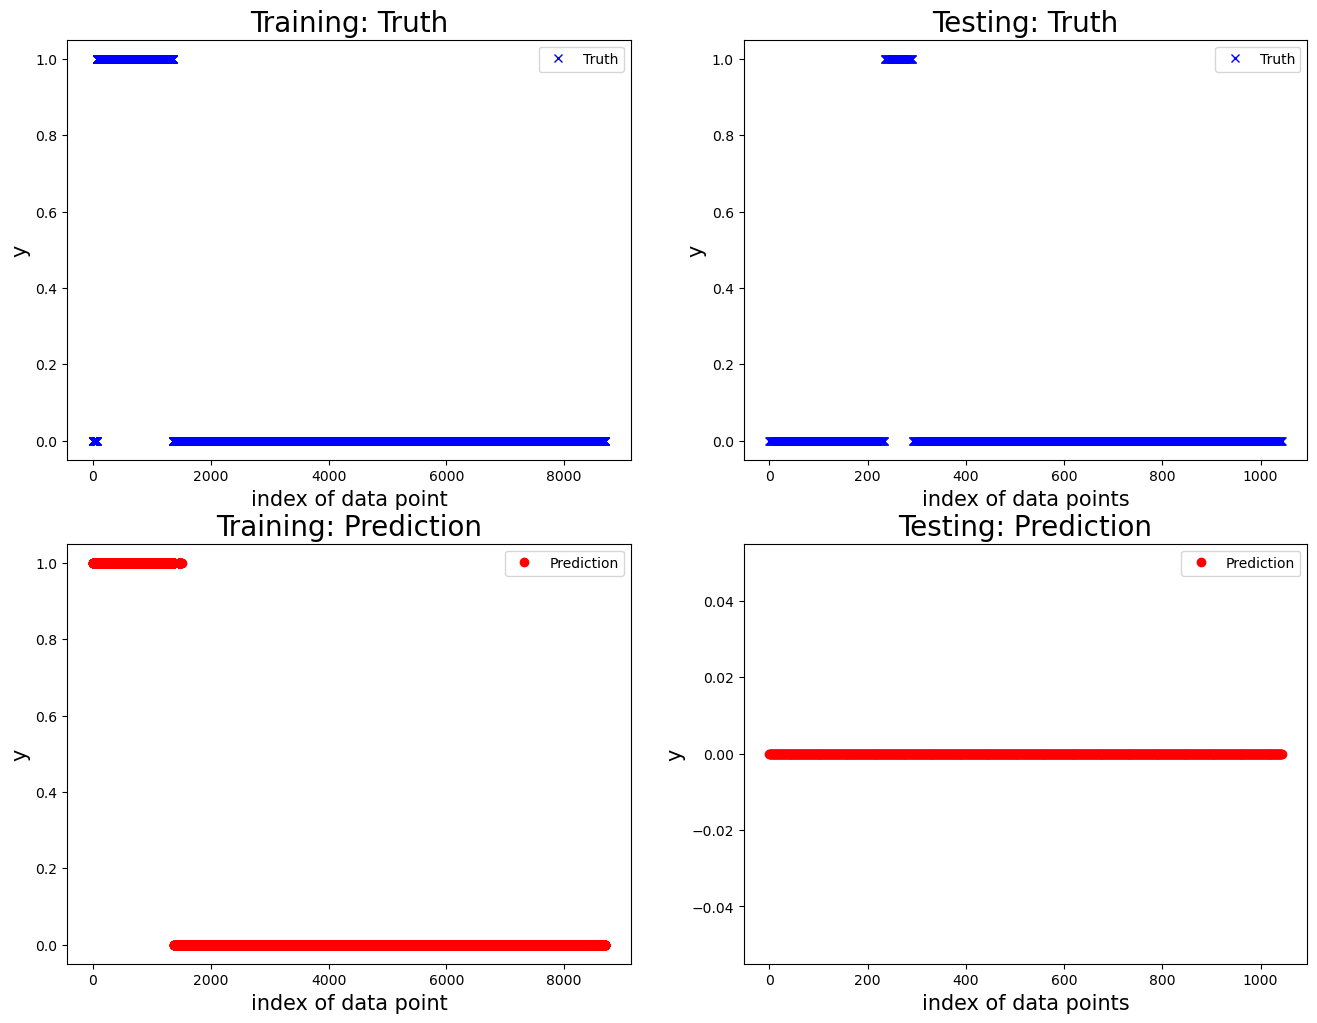


 New cv run:

Training performance, accuracy is: 0.9839754919288324
Training performance, precision is: 0.9208882720333103
Training performance, recall: 0.9836916234247591
Training performance, F1: 0.9512544802867384


Prediction performance, accuracy is: 0.7223548130469372
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


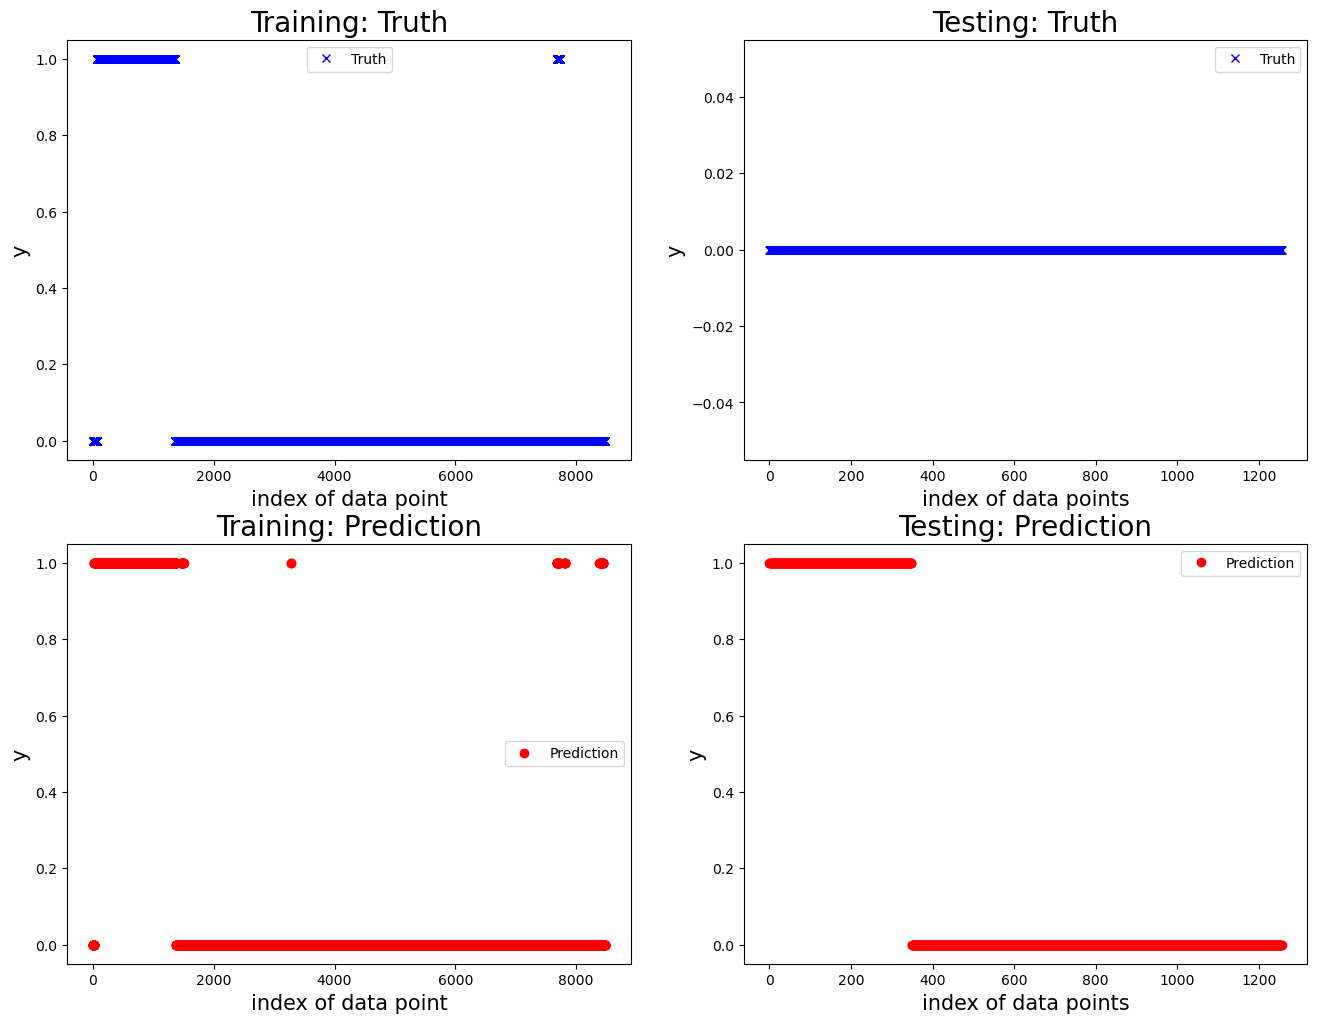

Accuracy     0.894706
Precision    0.400000
Recall       0.400000
F1 score     0.400000
dtype: float64


Model for predicting the label of motor 2:

 New cv run:

Training performance, accuracy is: 0.9611901681759379
Training performance, precision is: 0.39473684210526316
Training performance, recall: 0.9375
Training performance, F1: 0.5555555555555556


Prediction performance, accuracy is: 0.24383644016837042
Prediction performance, precision is: 1.0
Prediction performance, recall is：0.24383644016837042
Prediction performance, F1 is：0.39207154943195555


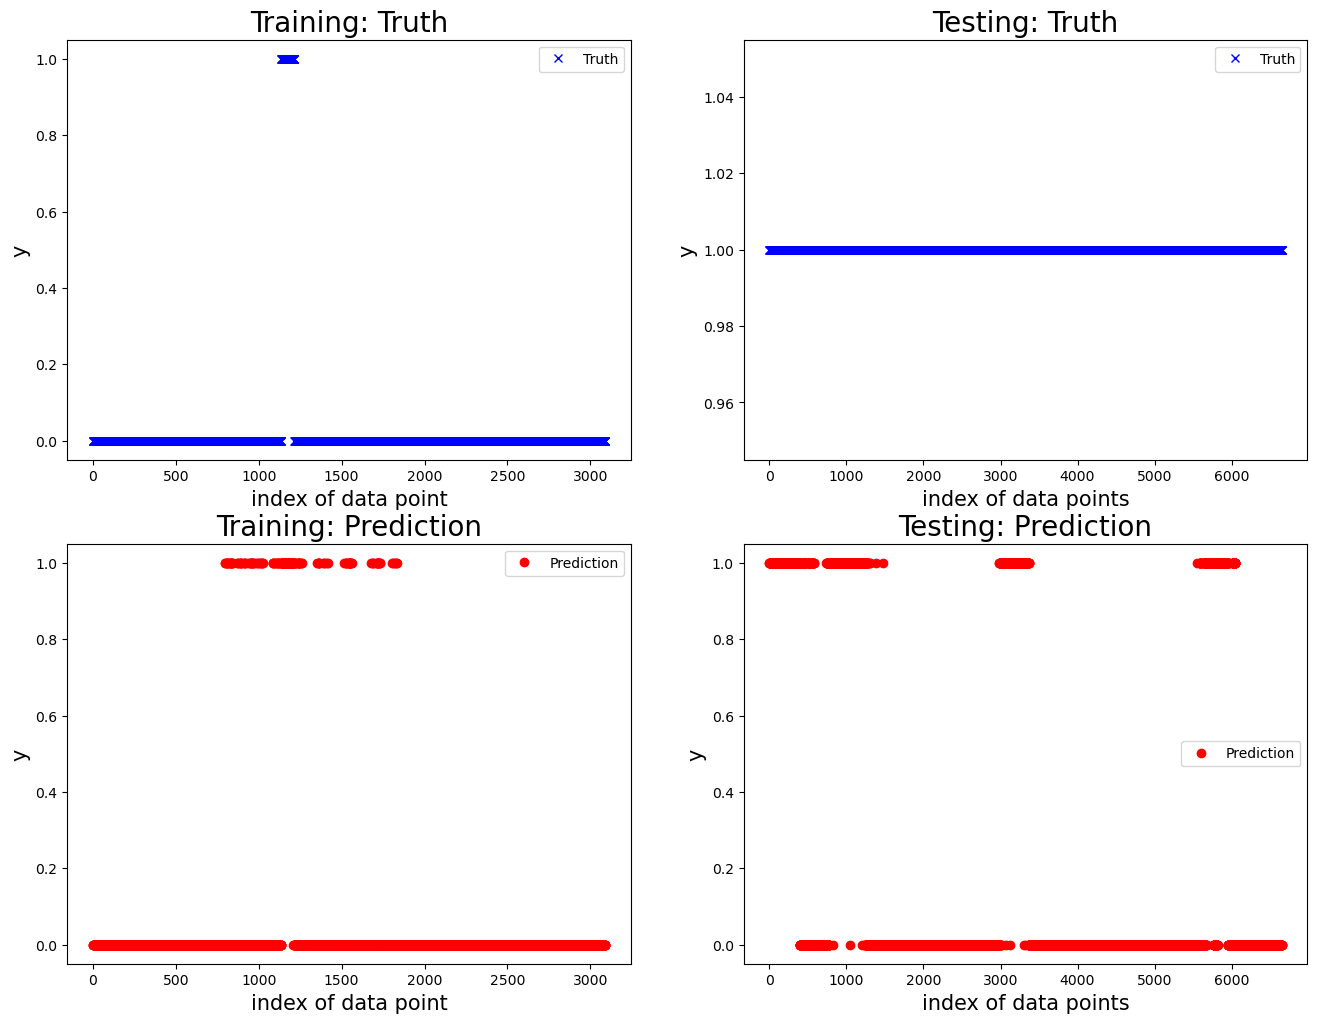


 New cv run:

Training performance, accuracy is: 0.9915904551666141
Training performance, precision is: 1.0
Training performance, recall: 0.988116458704694
Training performance, F1: 0.9940227136879857


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


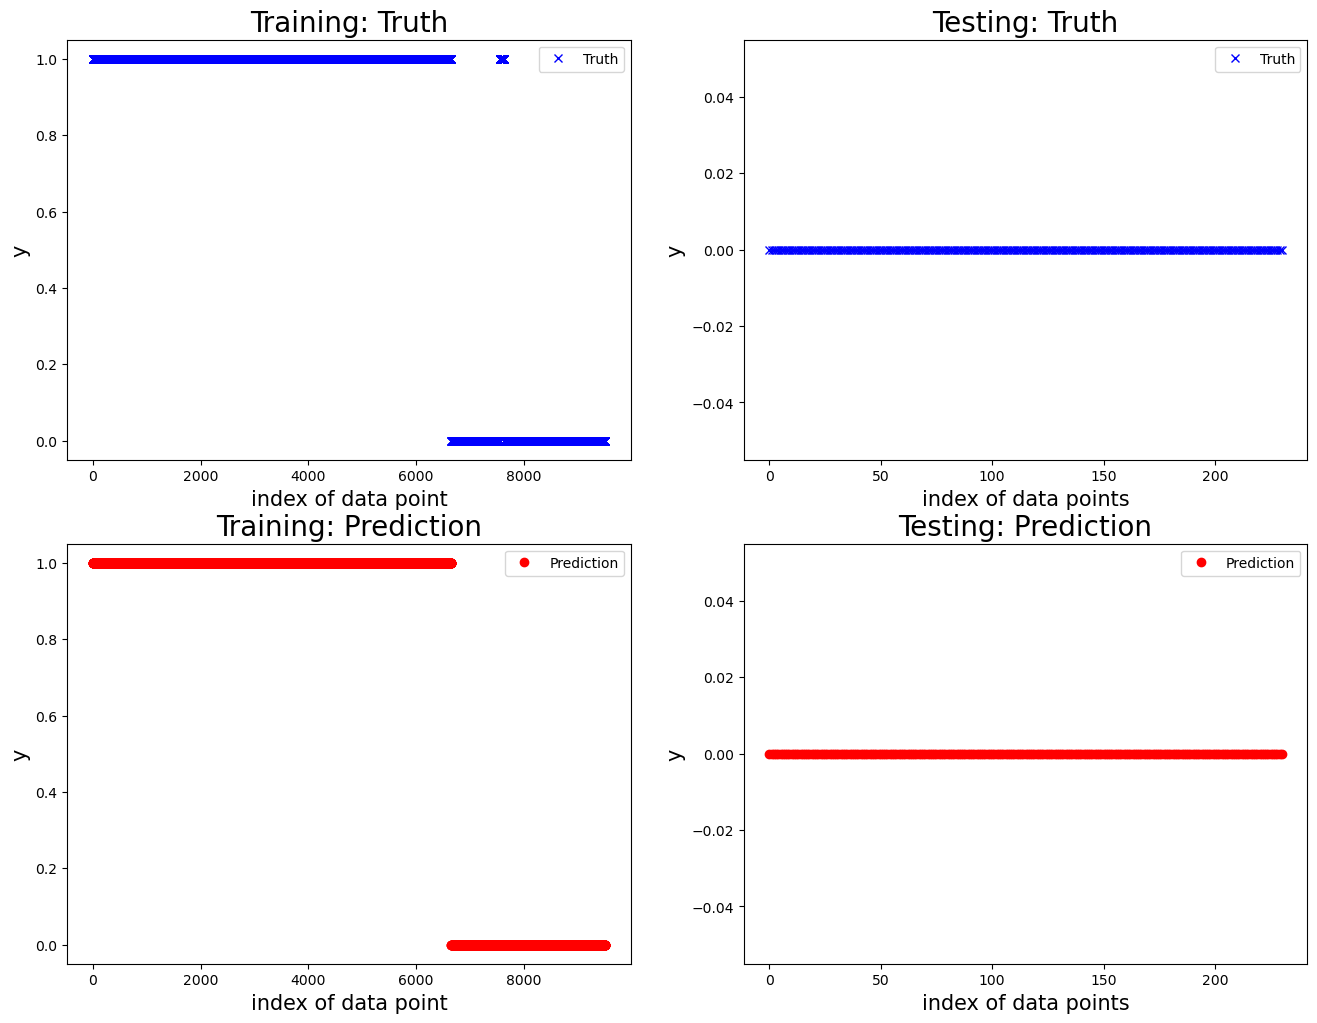


 New cv run:

Training performance, accuracy is: 0.9912891986062717
Training performance, precision is: 1.0
Training performance, recall: 0.988116458704694
Training performance, F1: 0.9940227136879857


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


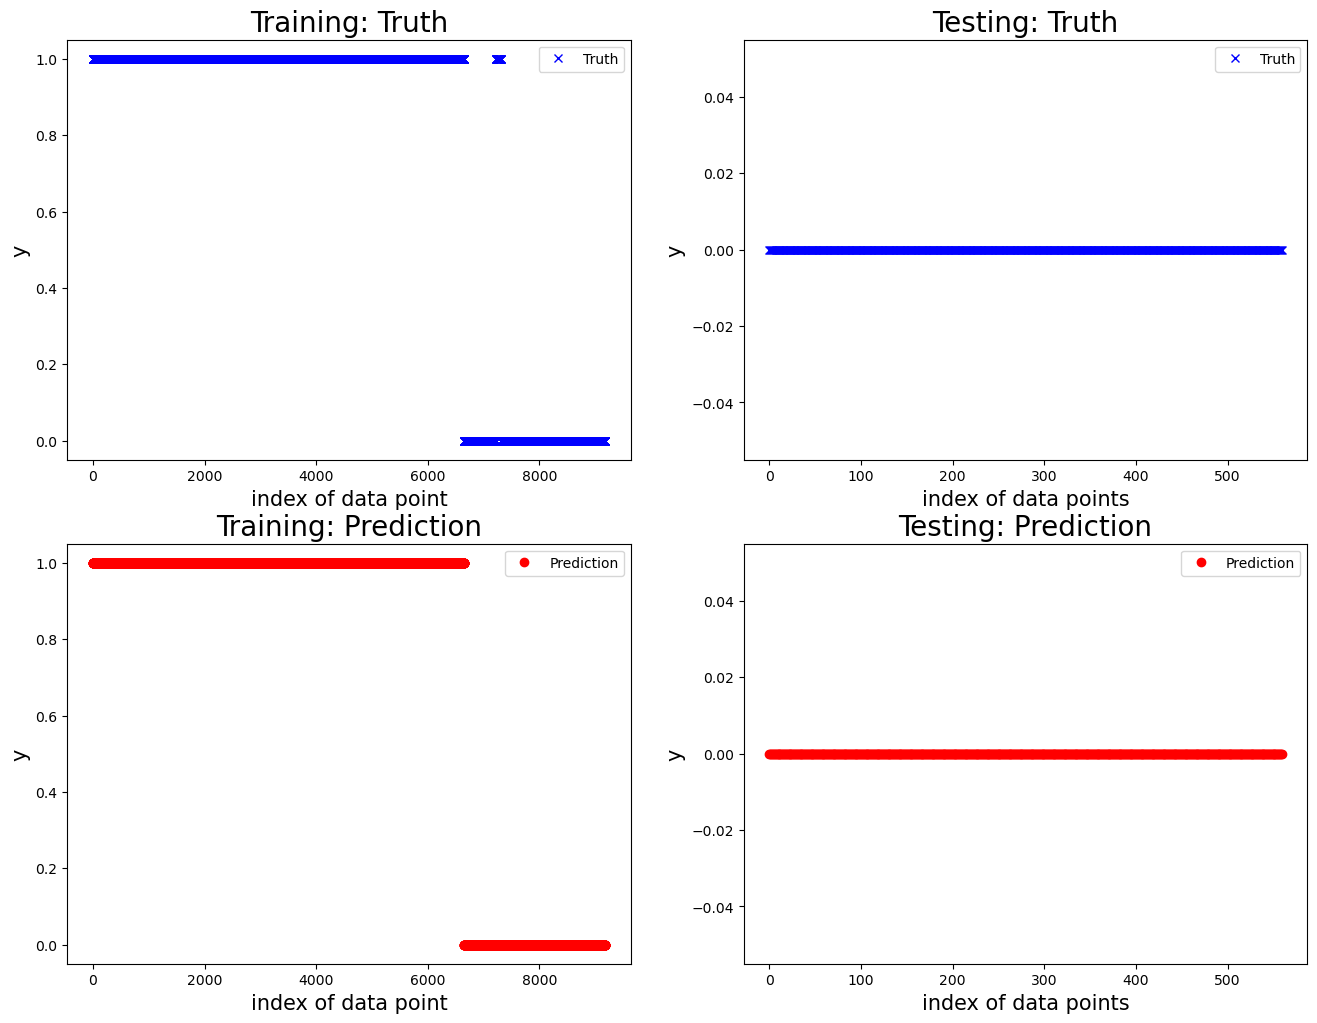


 New cv run:

Training performance, accuracy is: 1.0
Training performance, precision is: 1.0
Training performance, recall: 1.0
Training performance, F1: 1.0


Prediction performance, accuracy is: 0.9233716475095786
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


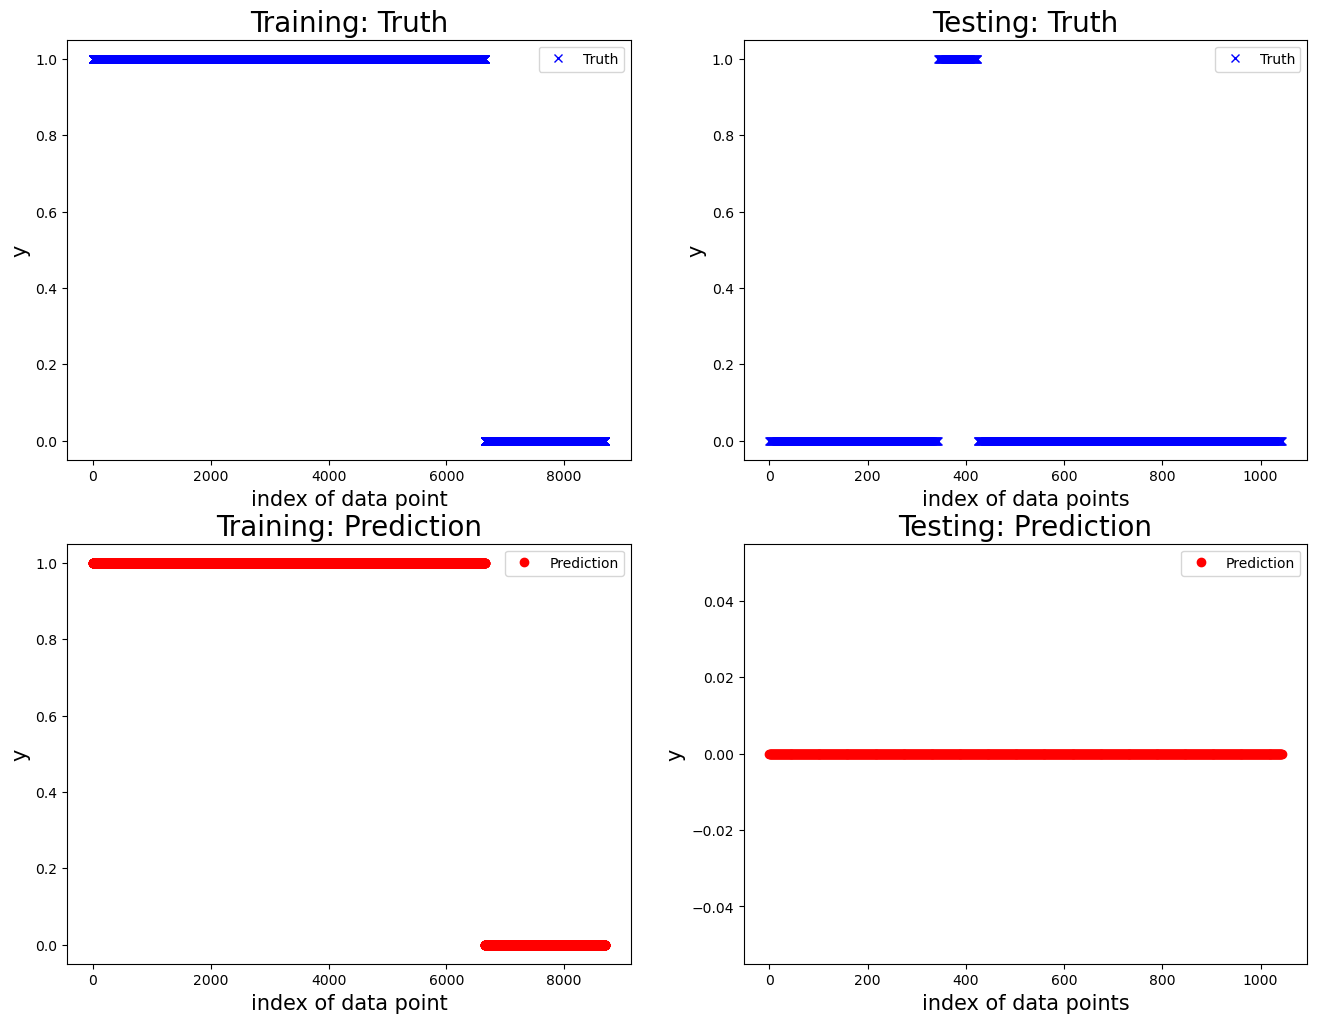


 New cv run:

Training performance, accuracy is: 0.9905738187816661
Training performance, precision is: 1.0
Training performance, recall: 0.988116458704694
Training performance, F1: 0.9940227136879857


Prediction performance, accuracy is: 0.8146380270485283
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


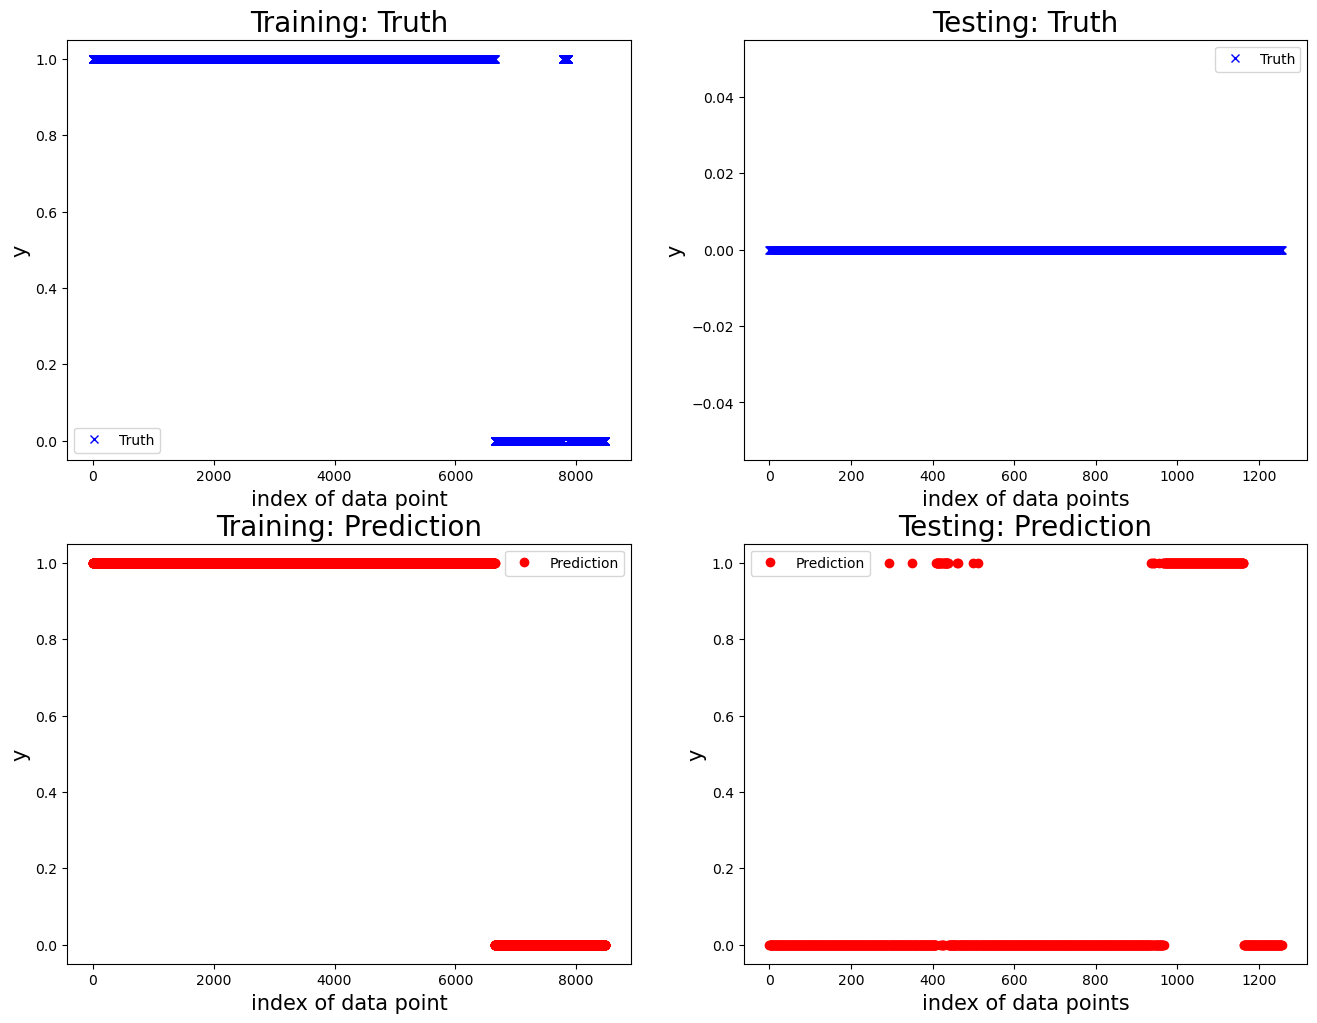

Accuracy     0.796369
Precision    0.600000
Recall       0.448767
F1 score     0.478414
dtype: float64


Model for predicting the label of motor 3:

 New cv run:

Training performance, accuracy is: 0.8188874514877102
Training performance, precision is: 0.1290824261275272
Training performance, recall: 1.0
Training performance, F1: 0.22865013774104684


Prediction performance, accuracy is: 0.9595610342754058
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


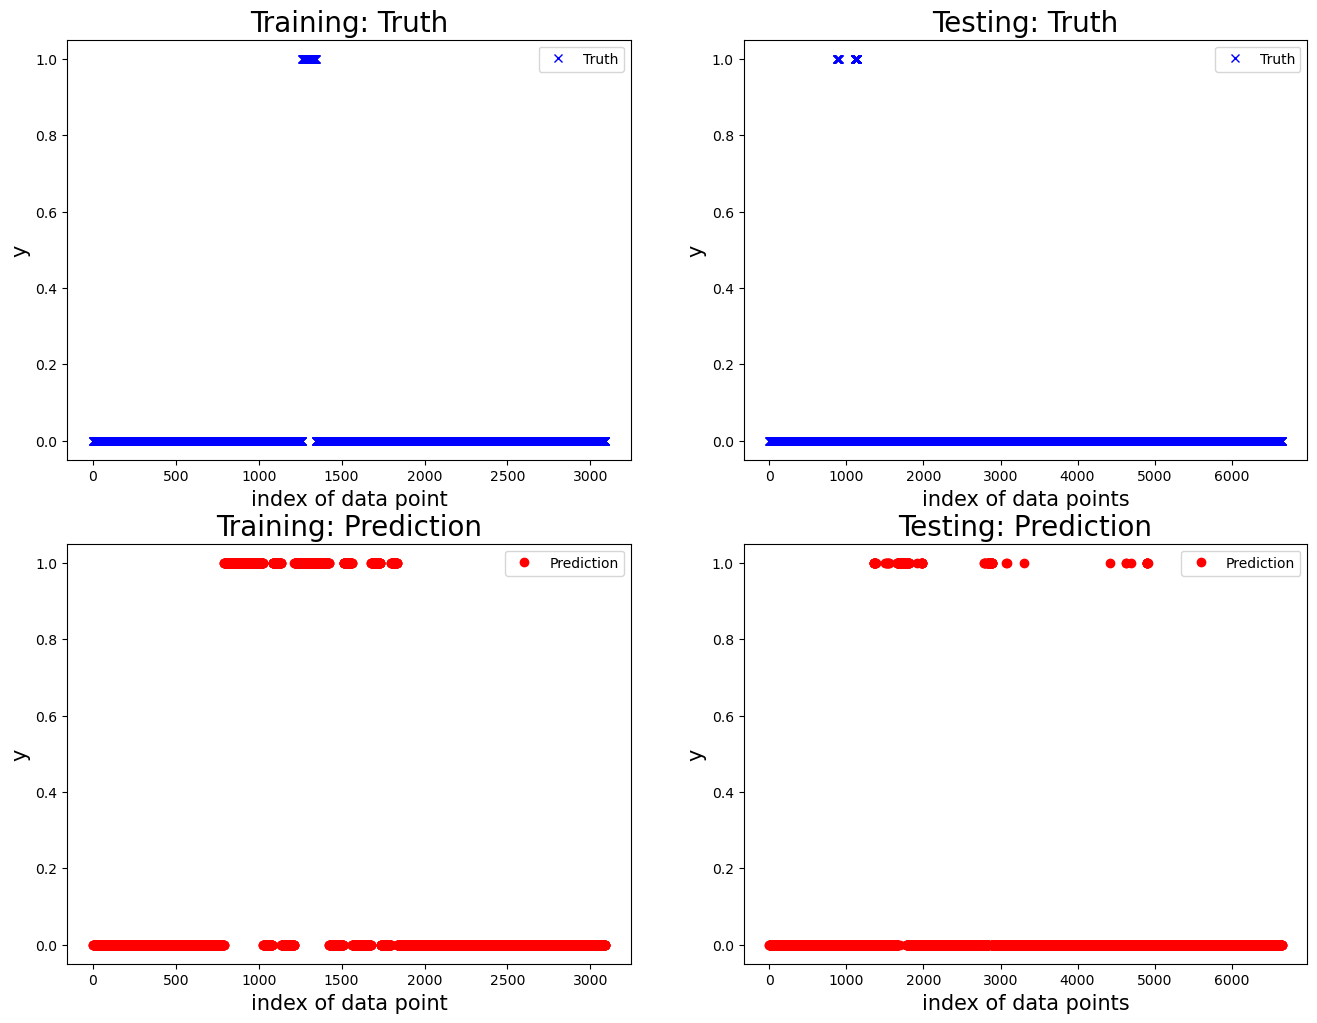


 New cv run:

Training performance, accuracy is: 0.8552507095553453
Training performance, precision is: 0.08444148936170212
Training performance, recall: 1.0
Training performance, F1: 0.15573267933782955


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


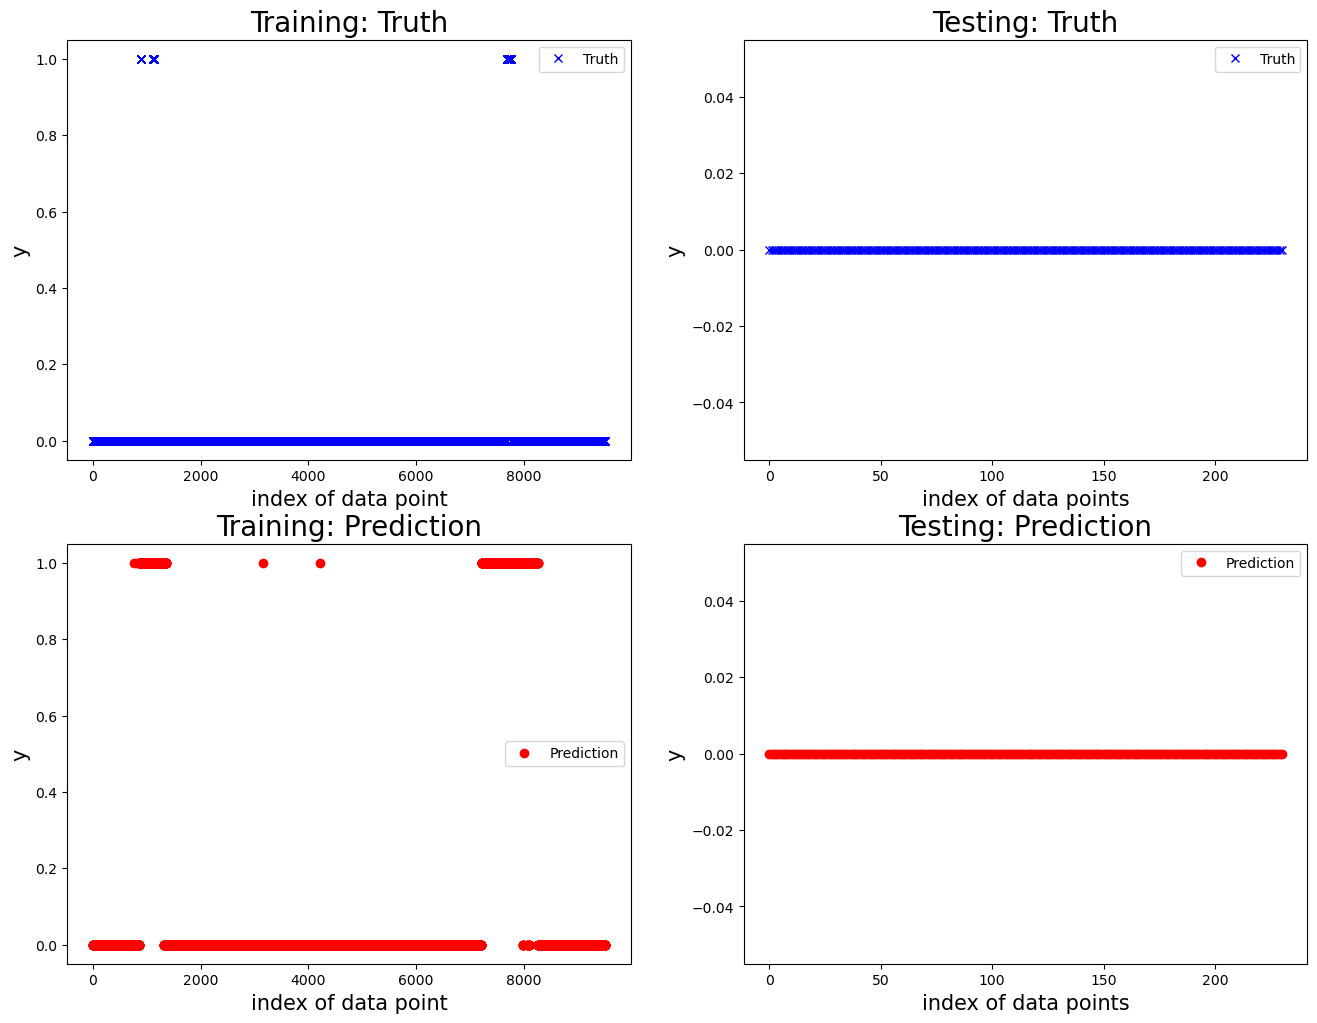


 New cv run:

Training performance, accuracy is: 0.8638937282229965
Training performance, precision is: 0.09222948438634714
Training performance, recall: 1.0
Training performance, F1: 0.16888297872340427


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


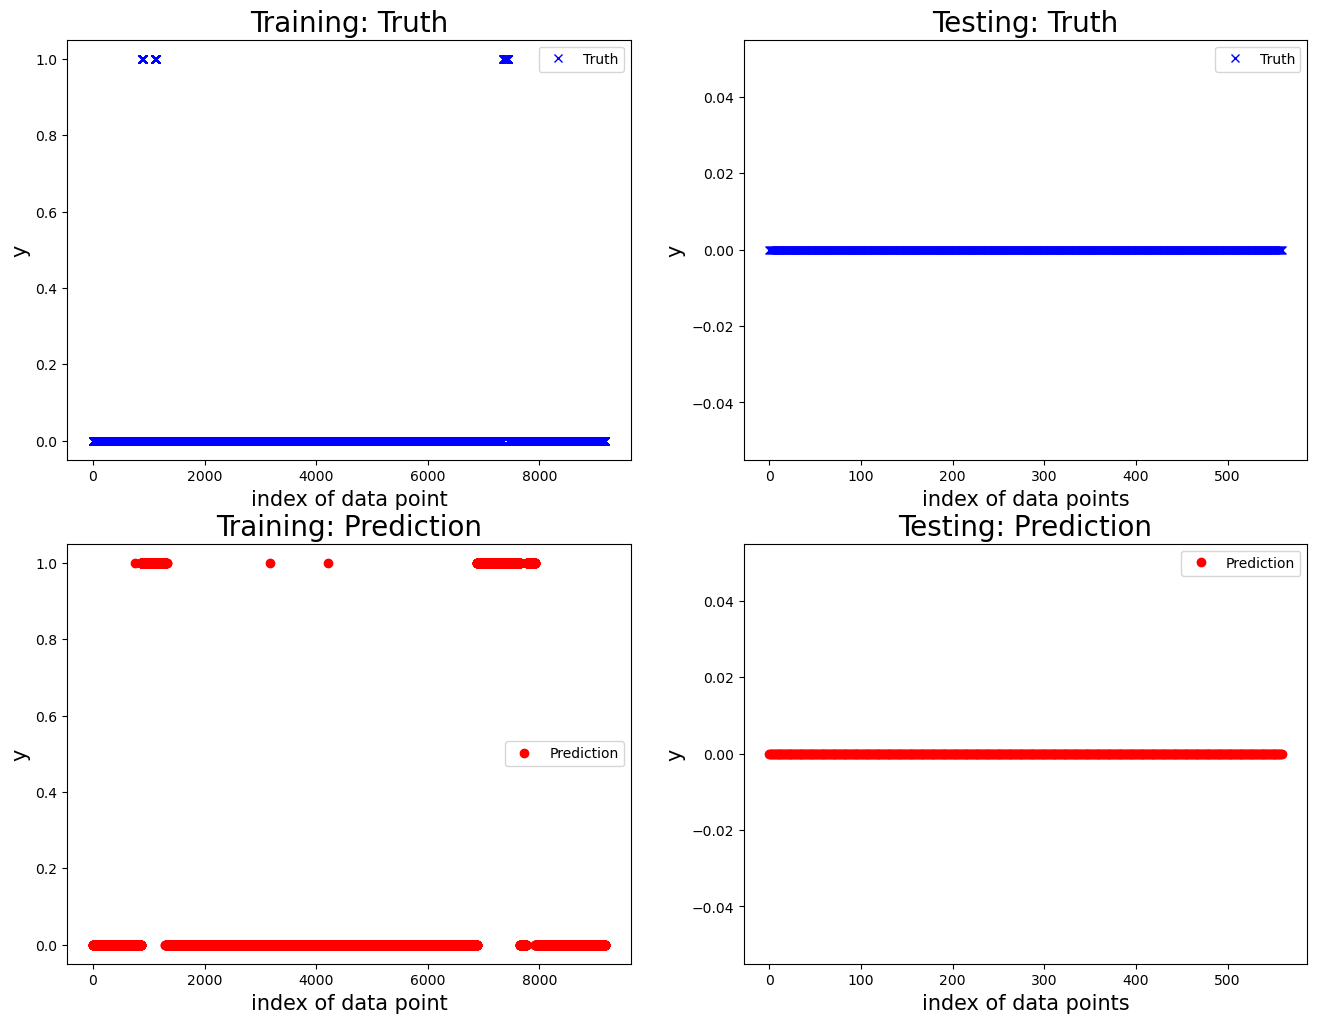


 New cv run:

Training performance, accuracy is: 0.9470114942528736
Training performance, precision is: 0.08712871287128712
Training performance, recall: 1.0
Training performance, F1: 0.16029143897996354


Prediction performance, accuracy is: 0.8659003831417624
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


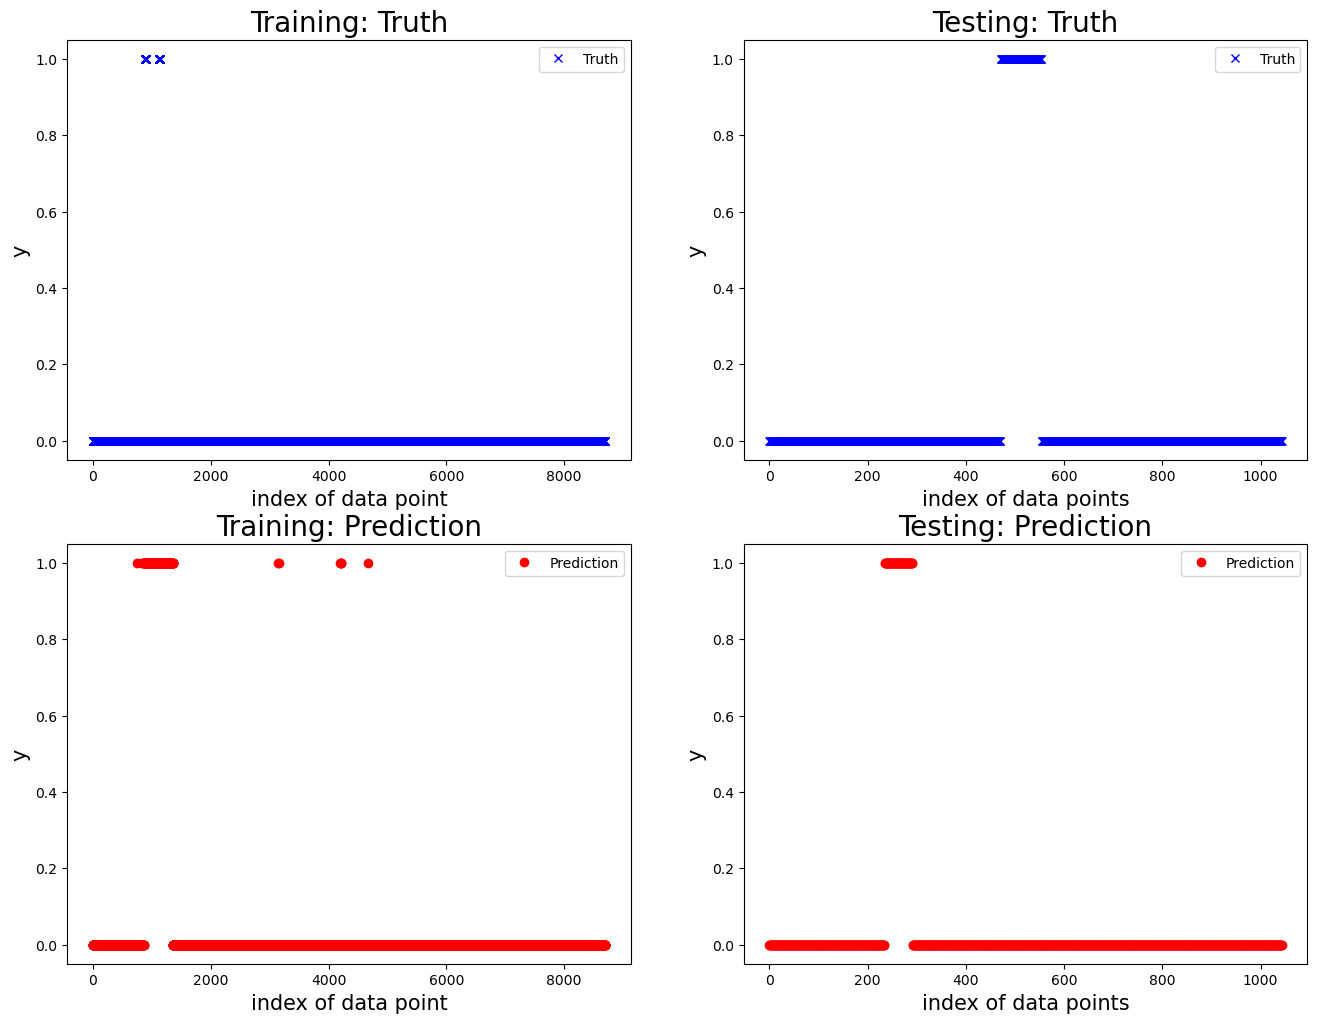


 New cv run:

Training performance, accuracy is: 0.8345705196182397
Training performance, precision is: 0.0829523187459177
Training performance, recall: 1.0
Training performance, F1: 0.15319662243667068


Prediction performance, accuracy is: 0.9769291964996022
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


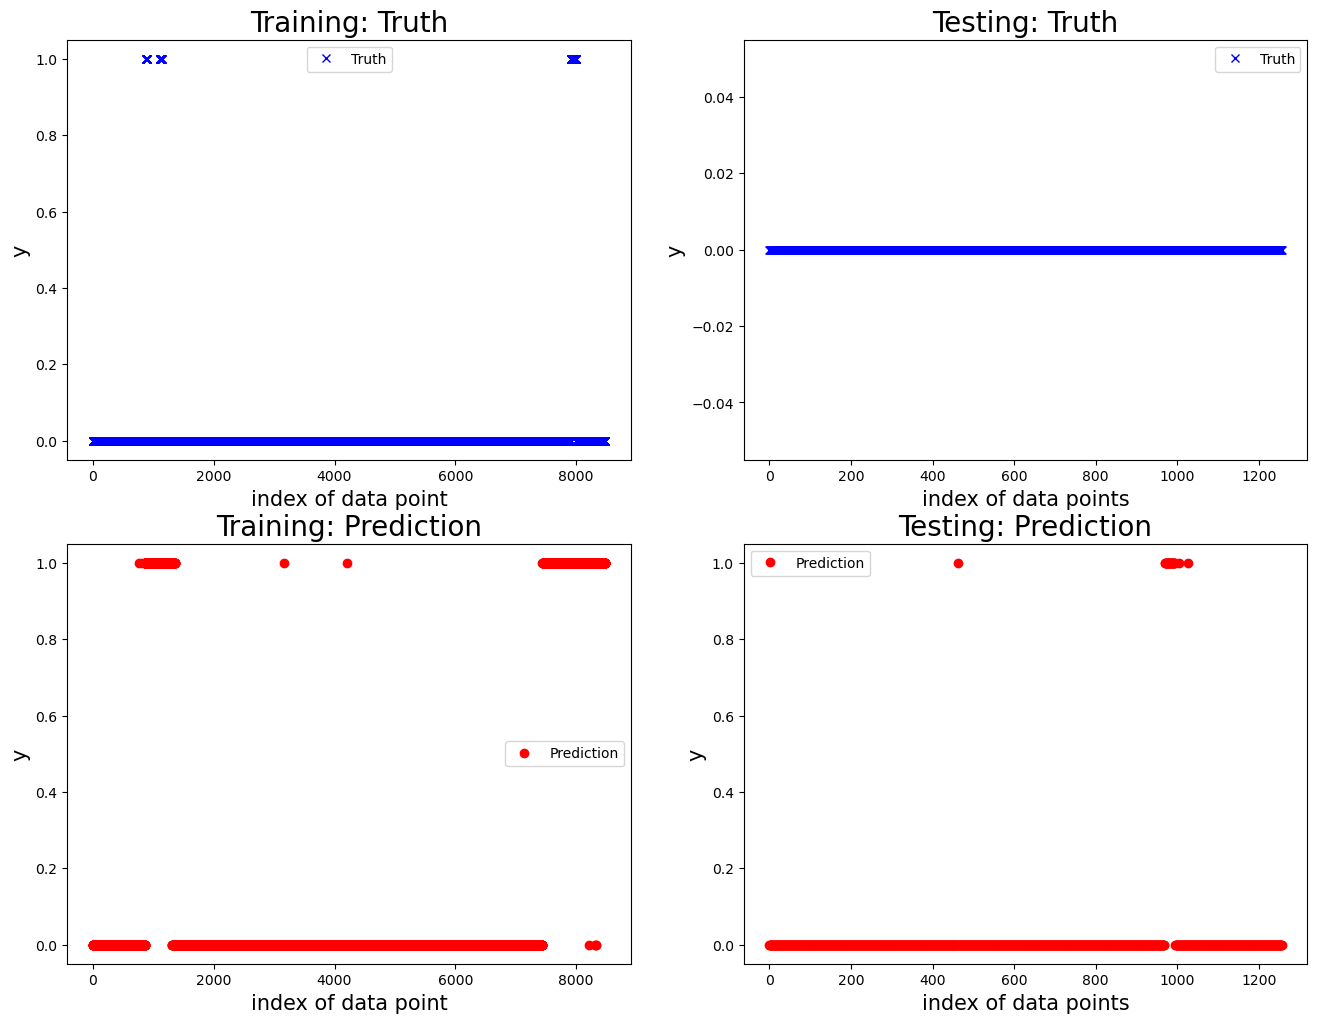

Accuracy     0.960478
Precision    0.400000
Recall       0.400000
F1 score     0.400000
dtype: float64


Model for predicting the label of motor 4:

 New cv run:

Training performance, accuracy is: 0.7745795601552393
Training performance, precision is: 0.11096938775510204
Training performance, recall: 1.0
Training performance, F1: 0.19977037887485646


Prediction performance, accuracy is: 0.1761876127480457
Prediction performance, precision is: 1.0
Prediction performance, recall is：0.1761876127480457
Prediction performance, F1 is：0.2995910020449898


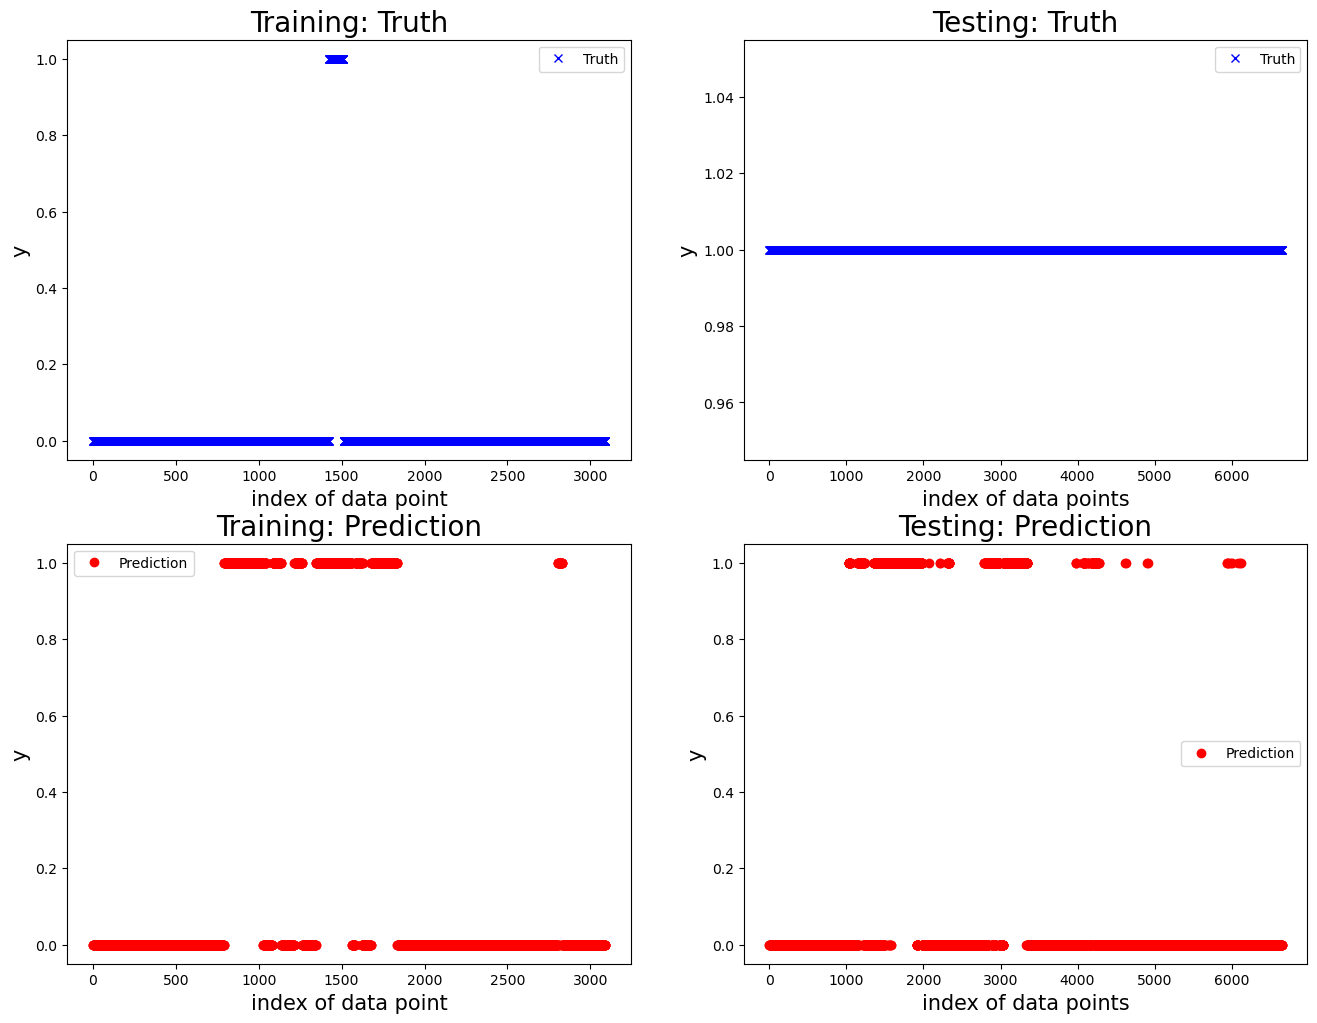


 New cv run:

Training performance, accuracy is: 0.9907495006832755
Training performance, precision is: 0.9998496918683301
Training performance, recall: 0.9870900727110847
Training performance, F1: 0.9934289127837514


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


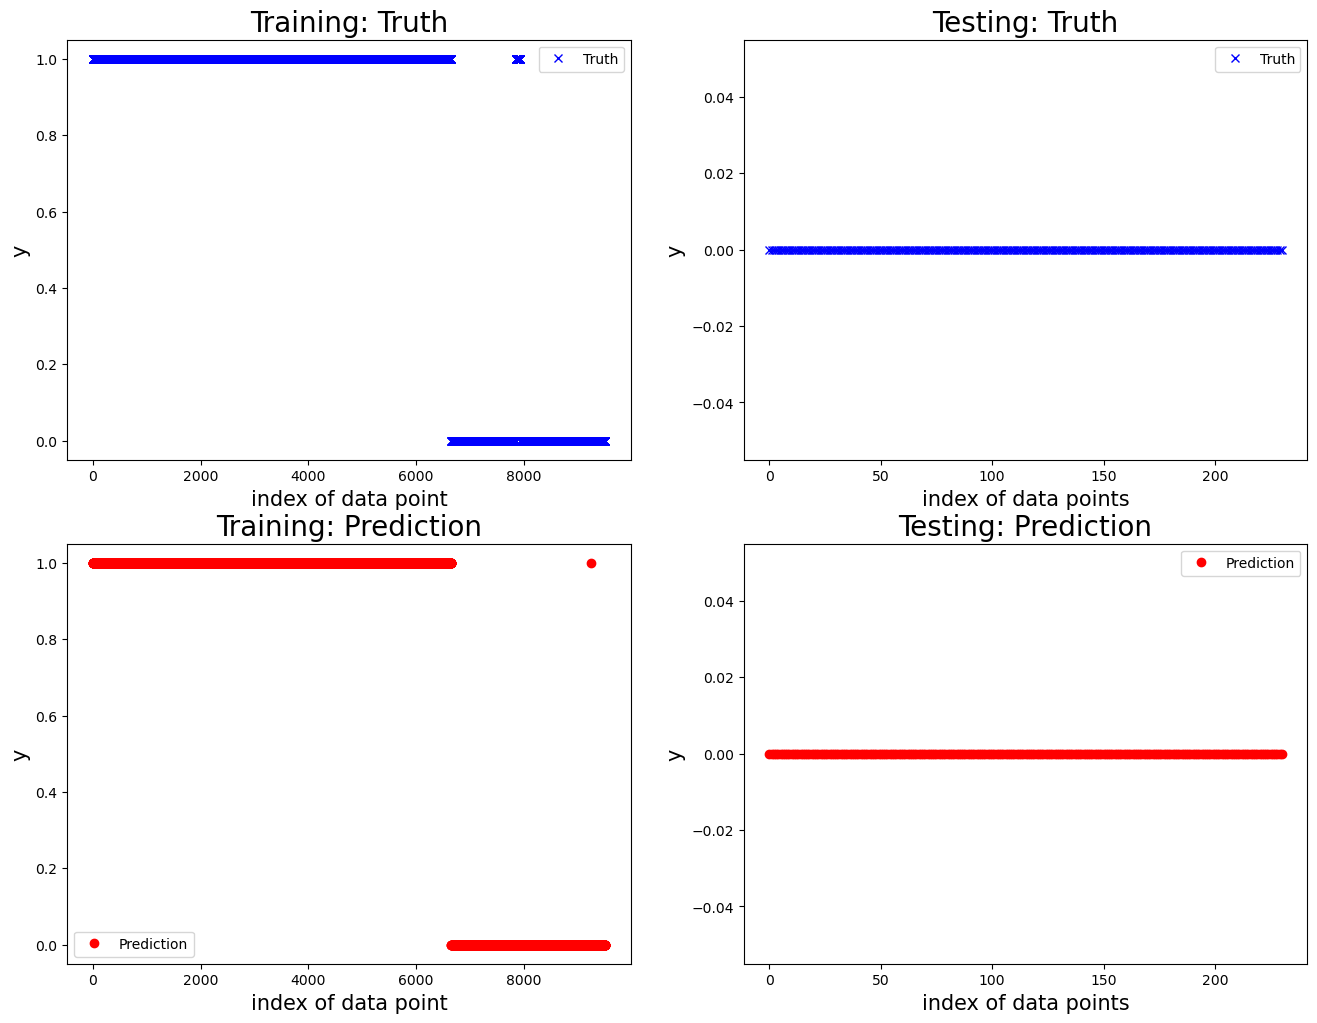


 New cv run:

Training performance, accuracy is: 0.9905270034843205
Training performance, precision is: 1.0
Training performance, recall: 0.9870900727110847
Training performance, F1: 0.993503099096408


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


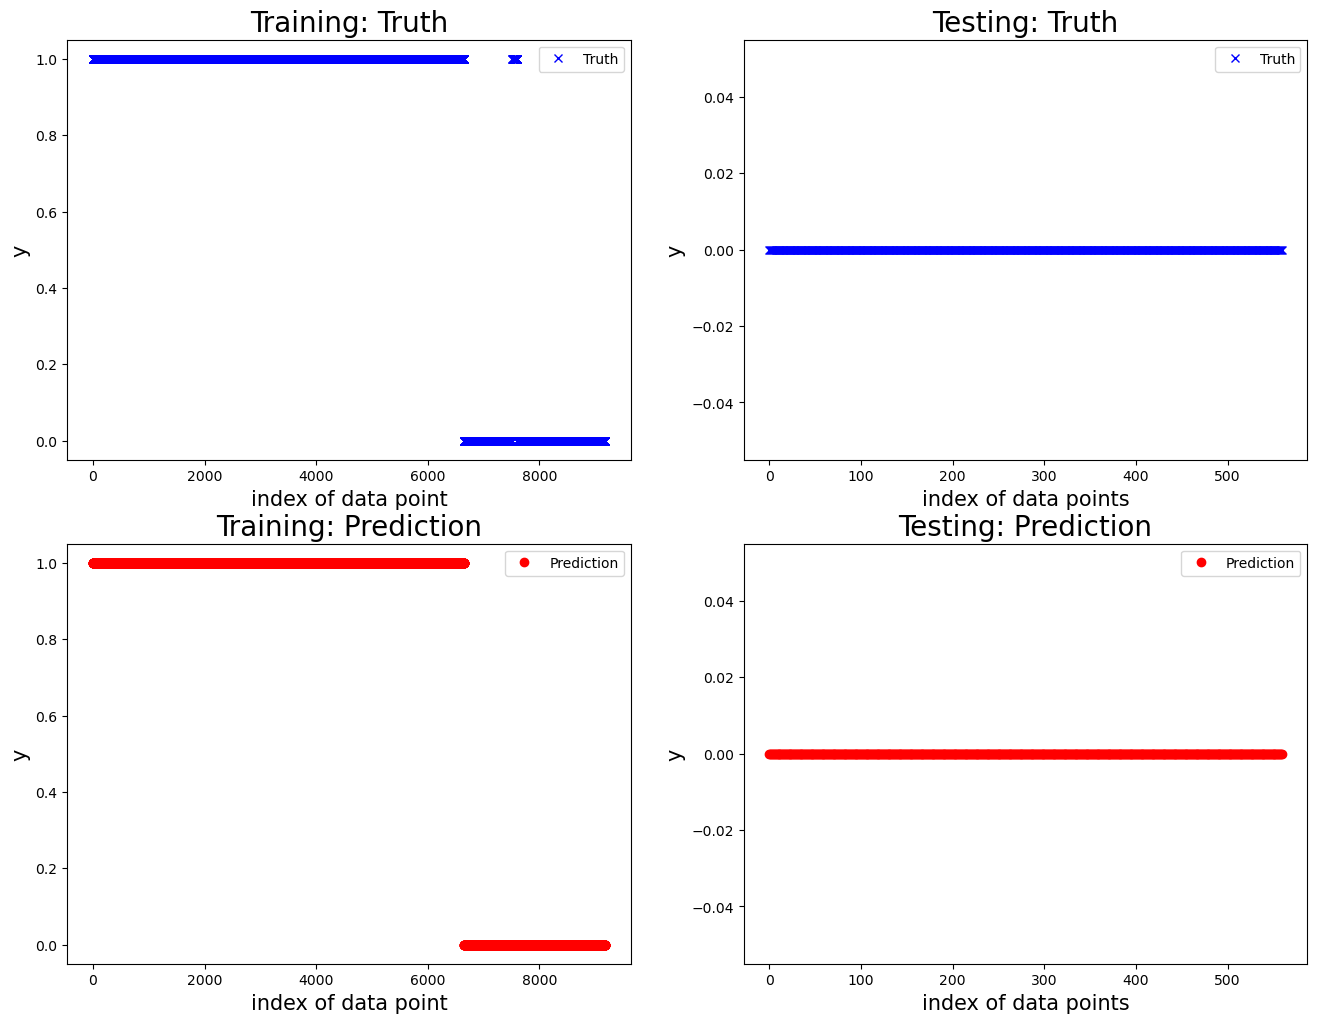


 New cv run:

Training performance, accuracy is: 1.0
Training performance, precision is: 1.0
Training performance, recall: 1.0
Training performance, F1: 1.0


Prediction performance, accuracy is: 0.9166666666666666
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


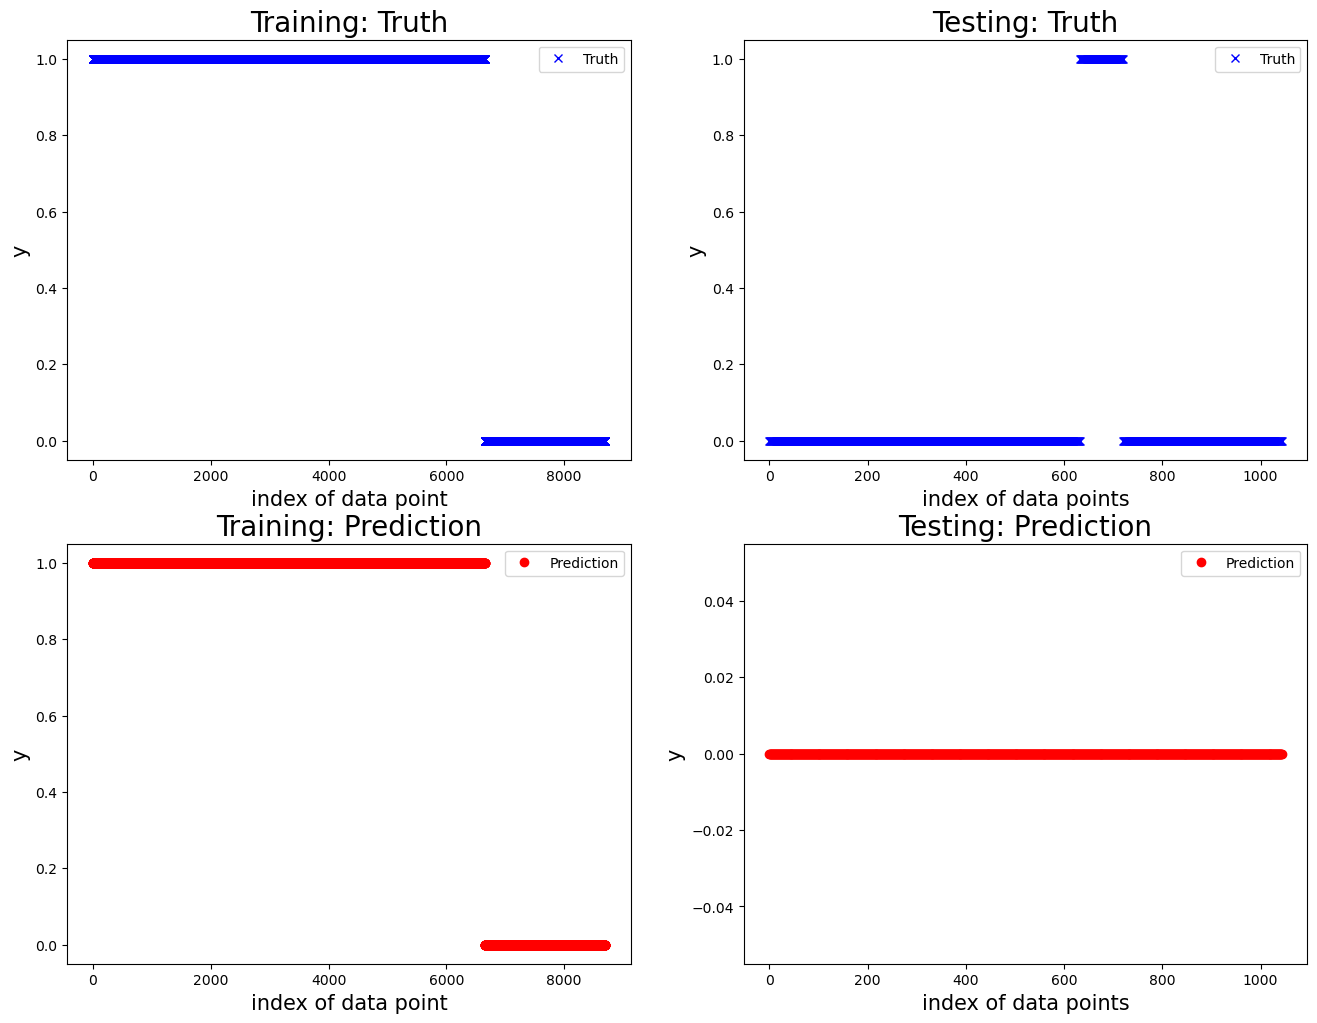


 New cv run:

Training performance, accuracy is: 0.9897490279250618
Training performance, precision is: 1.0
Training performance, recall: 0.9870900727110847
Training performance, F1: 0.993503099096408


Prediction performance, accuracy is: 0.8098647573587908
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


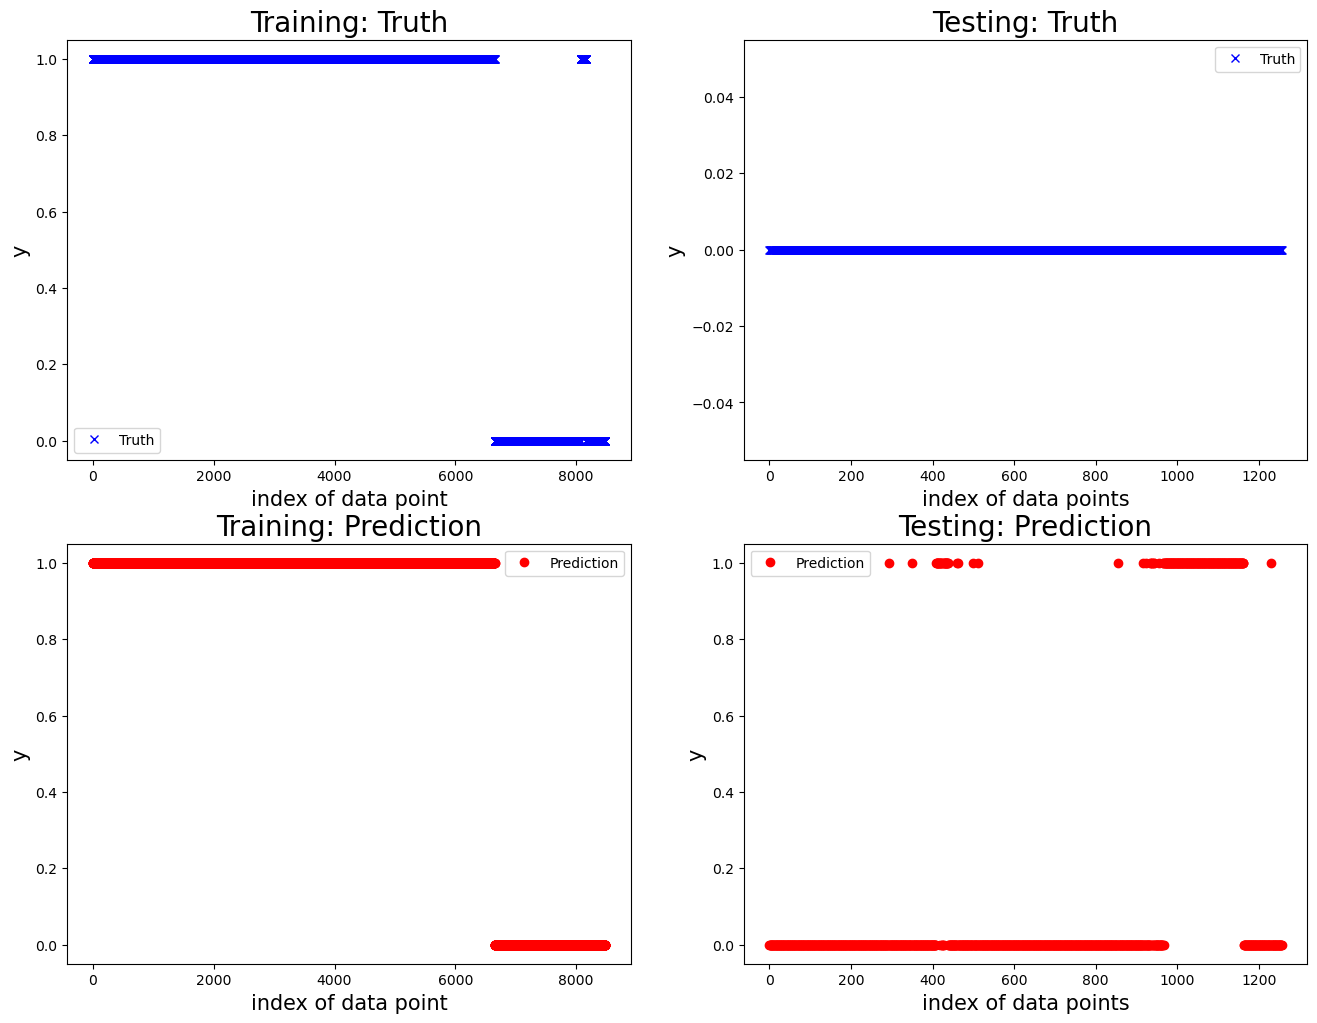

Accuracy     0.780544
Precision    0.600000
Recall       0.435238
F1 score     0.459918
dtype: float64


Model for predicting the label of motor 5:

 New cv run:

Training performance, accuracy is: 0.8007761966364813
Training performance, precision is: 0.15616438356164383
Training performance, recall: 1.0
Training performance, F1: 0.27014218009478674


Prediction performance, accuracy is: 0.9885748647023451
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


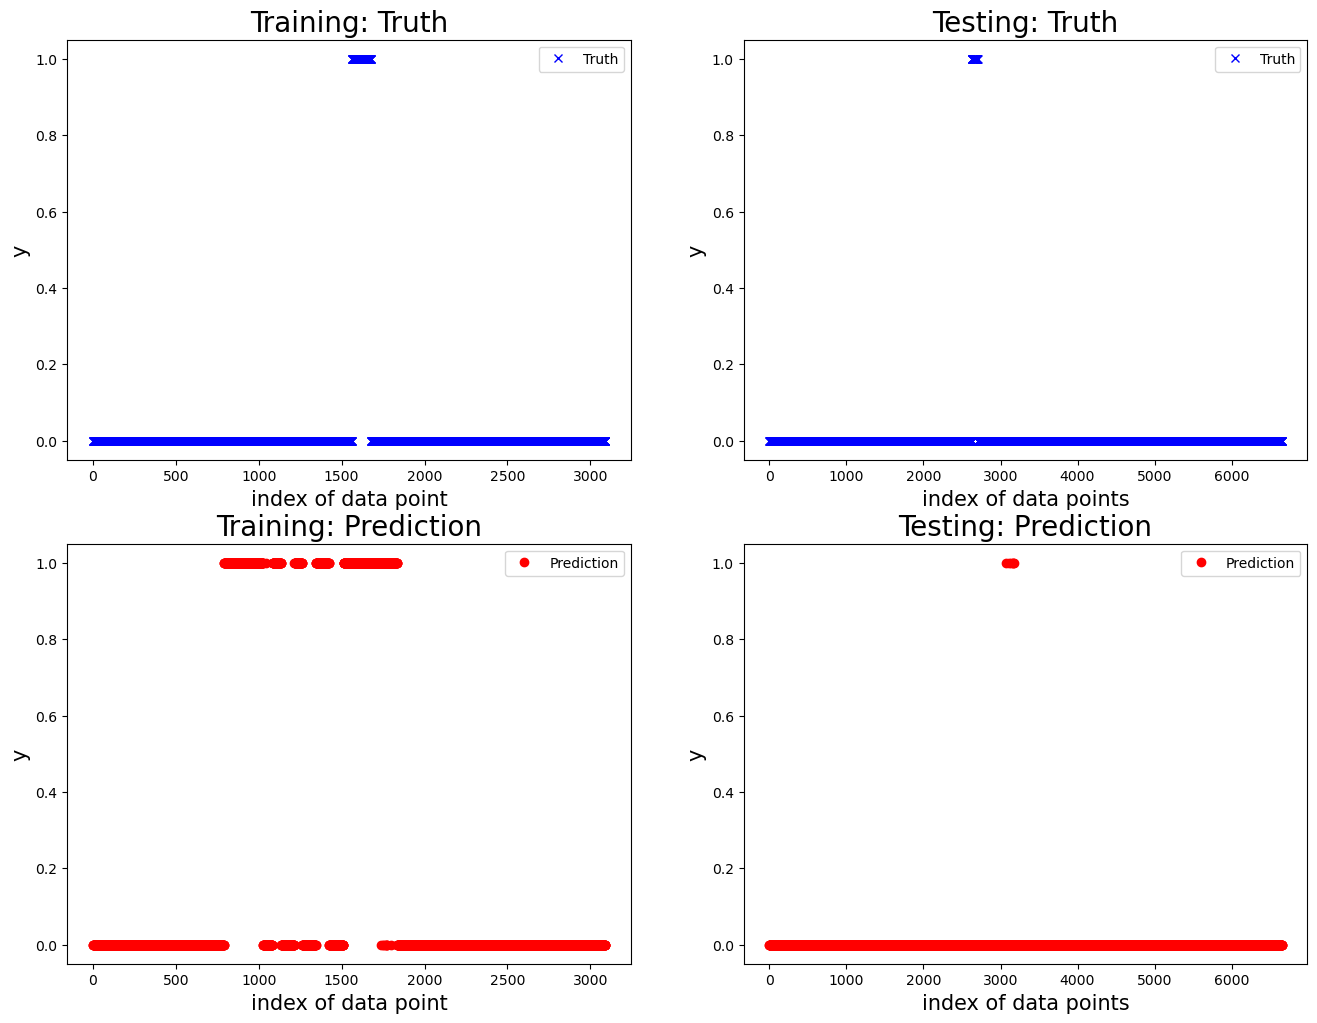


 New cv run:

Training performance, accuracy is: 0.8806895826763377
Training performance, precision is: 0.13949962092494314
Training performance, recall: 1.0
Training performance, F1: 0.24484364604125086


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


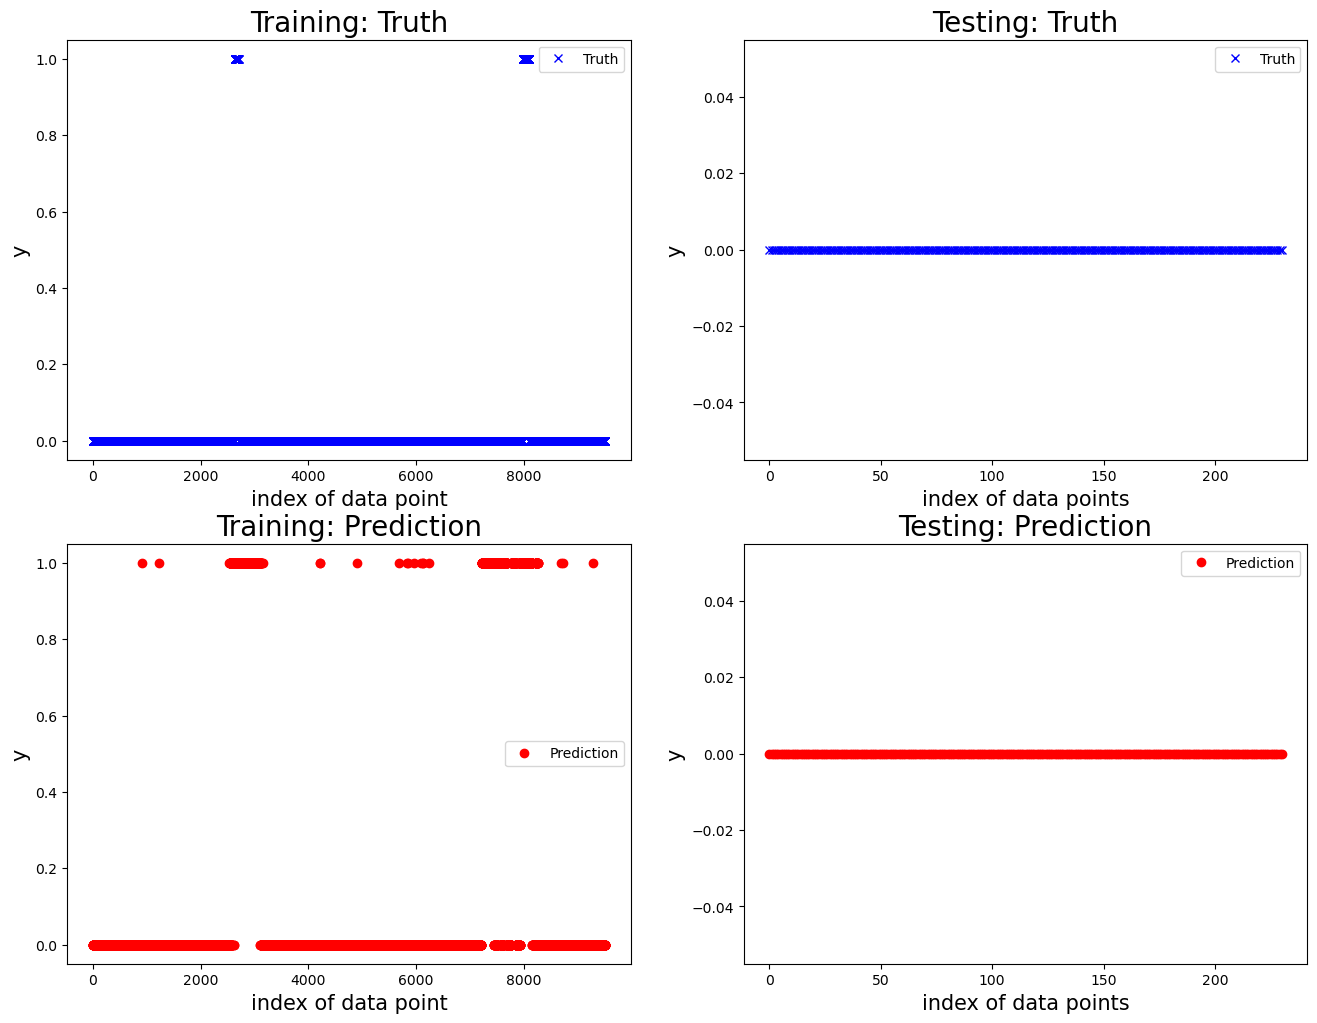


 New cv run:

Training performance, accuracy is: 0.8784843205574913
Training performance, precision is: 0.14153846153846153
Training performance, recall: 1.0
Training performance, F1: 0.2479784366576819


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


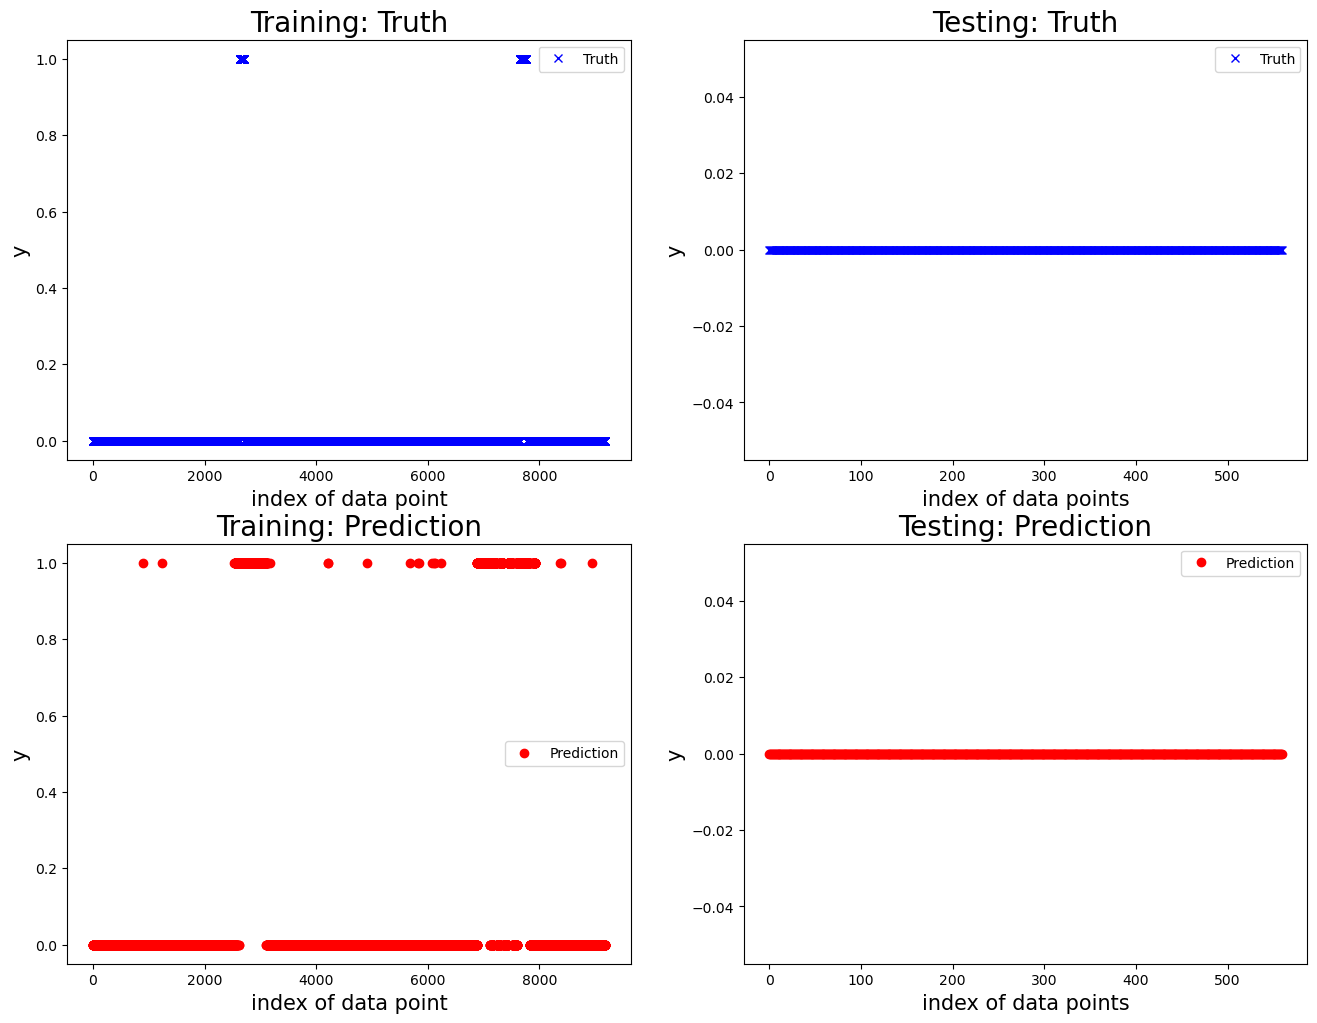


 New cv run:

Training performance, accuracy is: 0.9152873563218391
Training performance, precision is: 0.08674101610904585
Training performance, recall: 1.0
Training performance, F1: 0.15963511972633979


Prediction performance, accuracy is: 0.8908045977011494
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


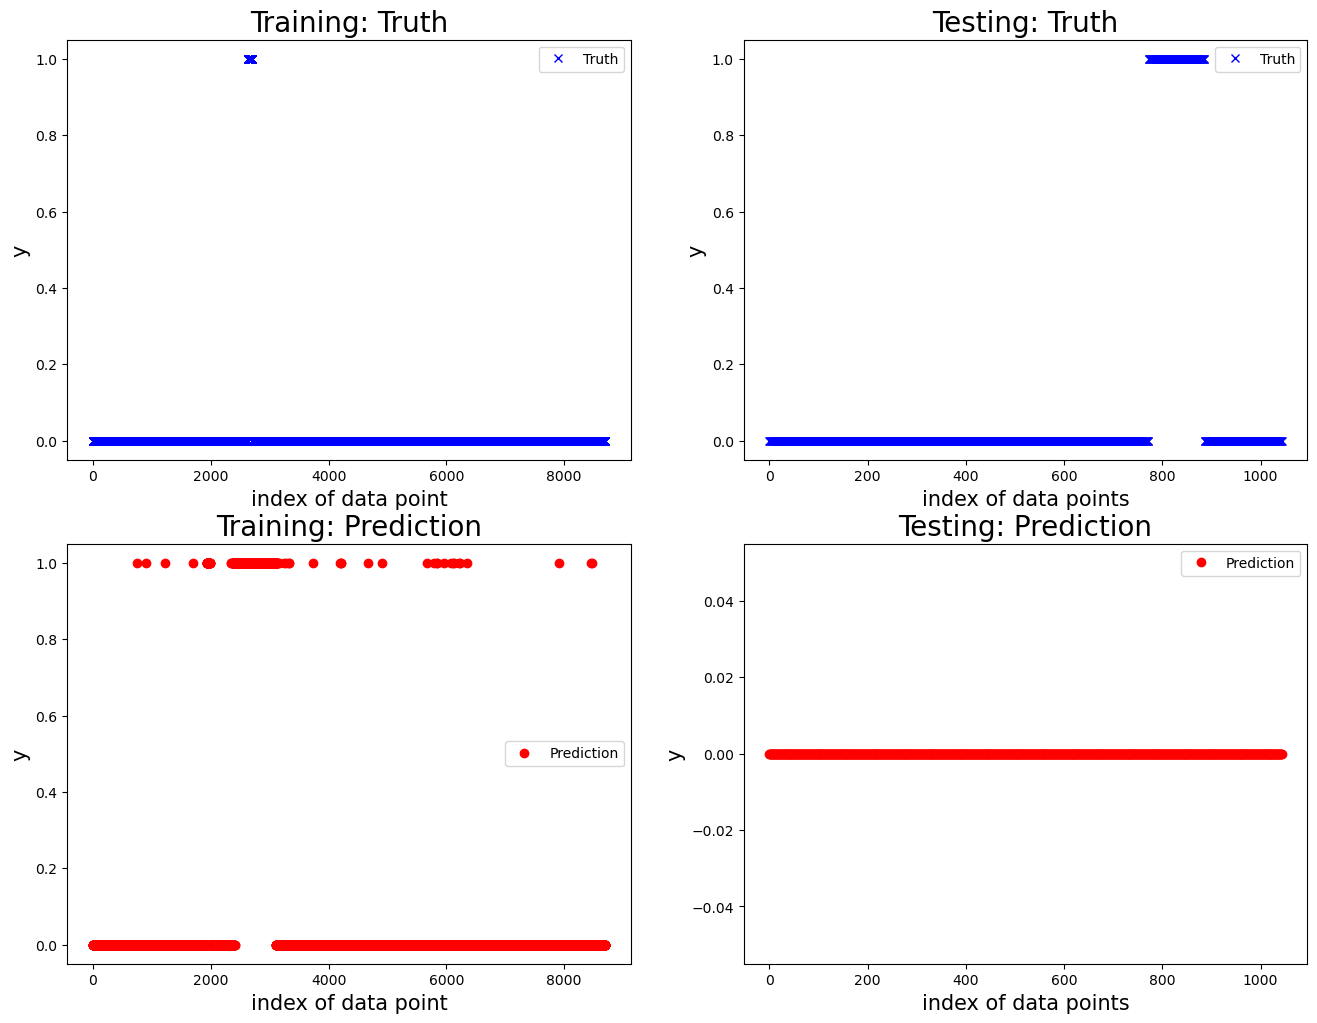


 New cv run:

Training performance, accuracy is: 0.8345705196182397
Training performance, precision is: 0.11586901763224182
Training performance, recall: 1.0
Training performance, F1: 0.2076749435665914


Prediction performance, accuracy is: 0.15274463007159905
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


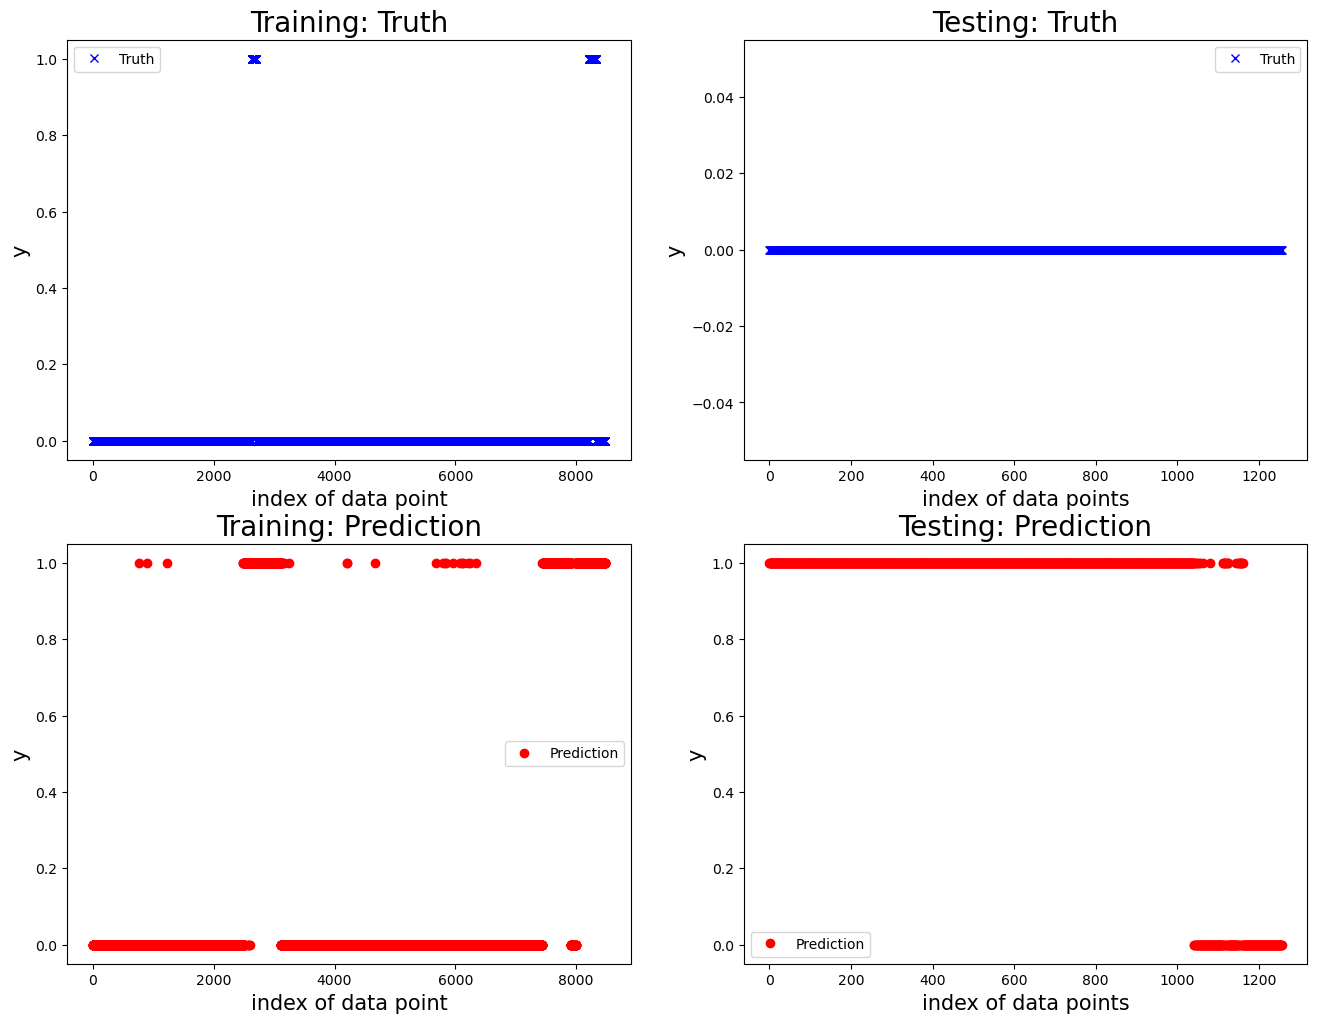

Accuracy     0.806425
Precision    0.400000
Recall       0.400000
F1 score     0.400000
dtype: float64


Model for predicting the label of motor 6:

 New cv run:

Training performance, accuracy is: 0.7920439844760673
Training performance, precision is: 0.2667509481668774
Training performance, recall: 0.7700729927007299
Training performance, F1: 0.39624413145539905


Prediction performance, accuracy is: 0.9069452796151534
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


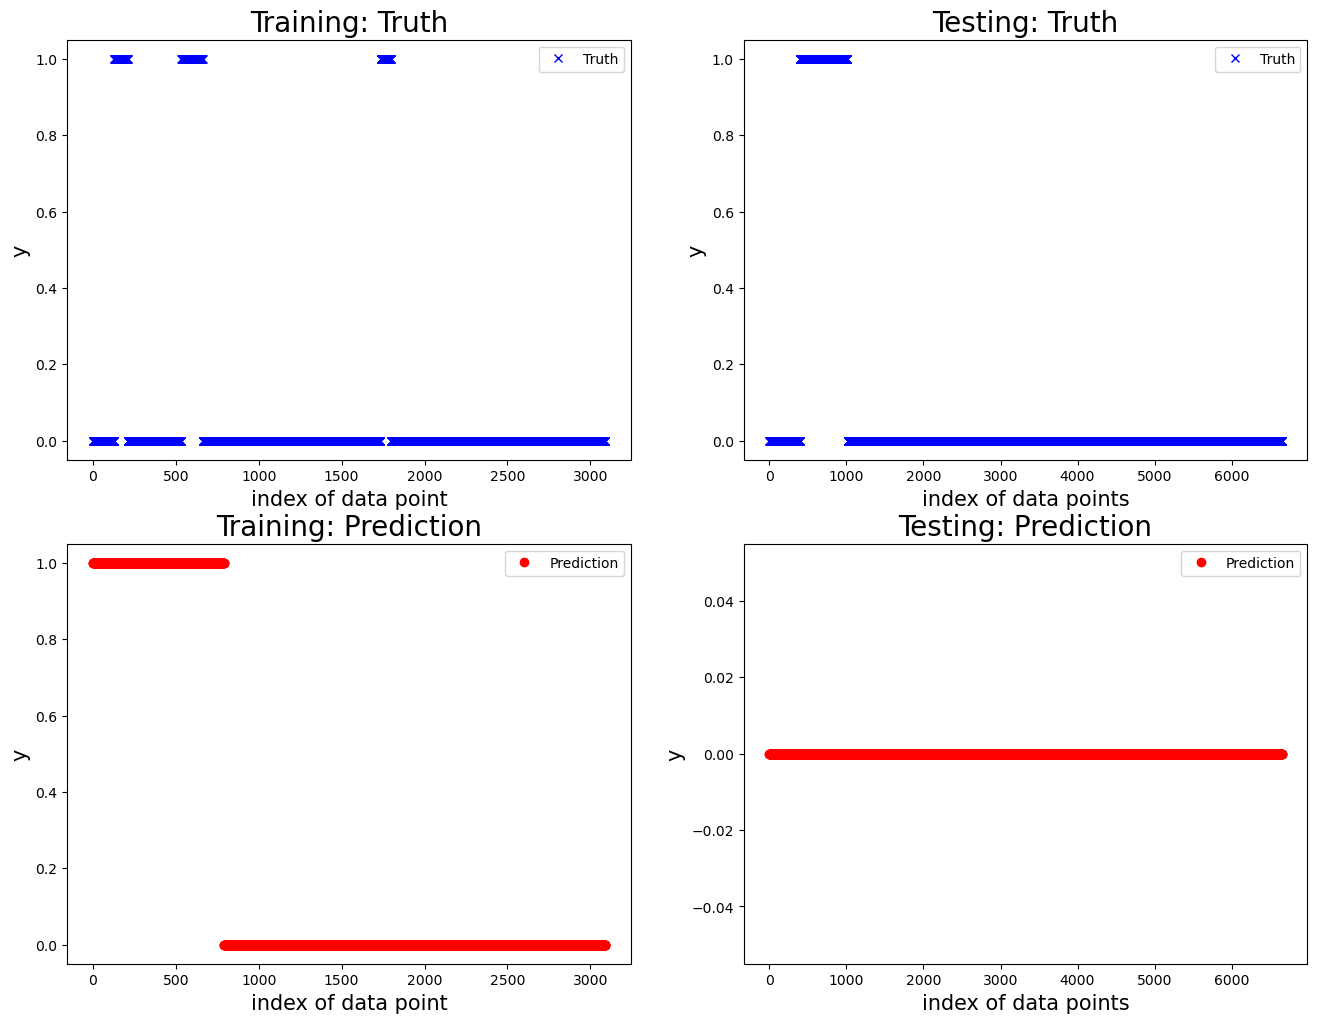


 New cv run:

Training performance, accuracy is: 0.8784820771575739
Training performance, precision is: 0.4061990212071778
Training performance, recall: 0.9210850801479655
Training performance, F1: 0.5637735849056604


Prediction performance, accuracy is: 0.354978354978355
Prediction performance, precision is: 0.354978354978355
Prediction performance, recall is：1.0
Prediction performance, F1 is：0.5239616613418531


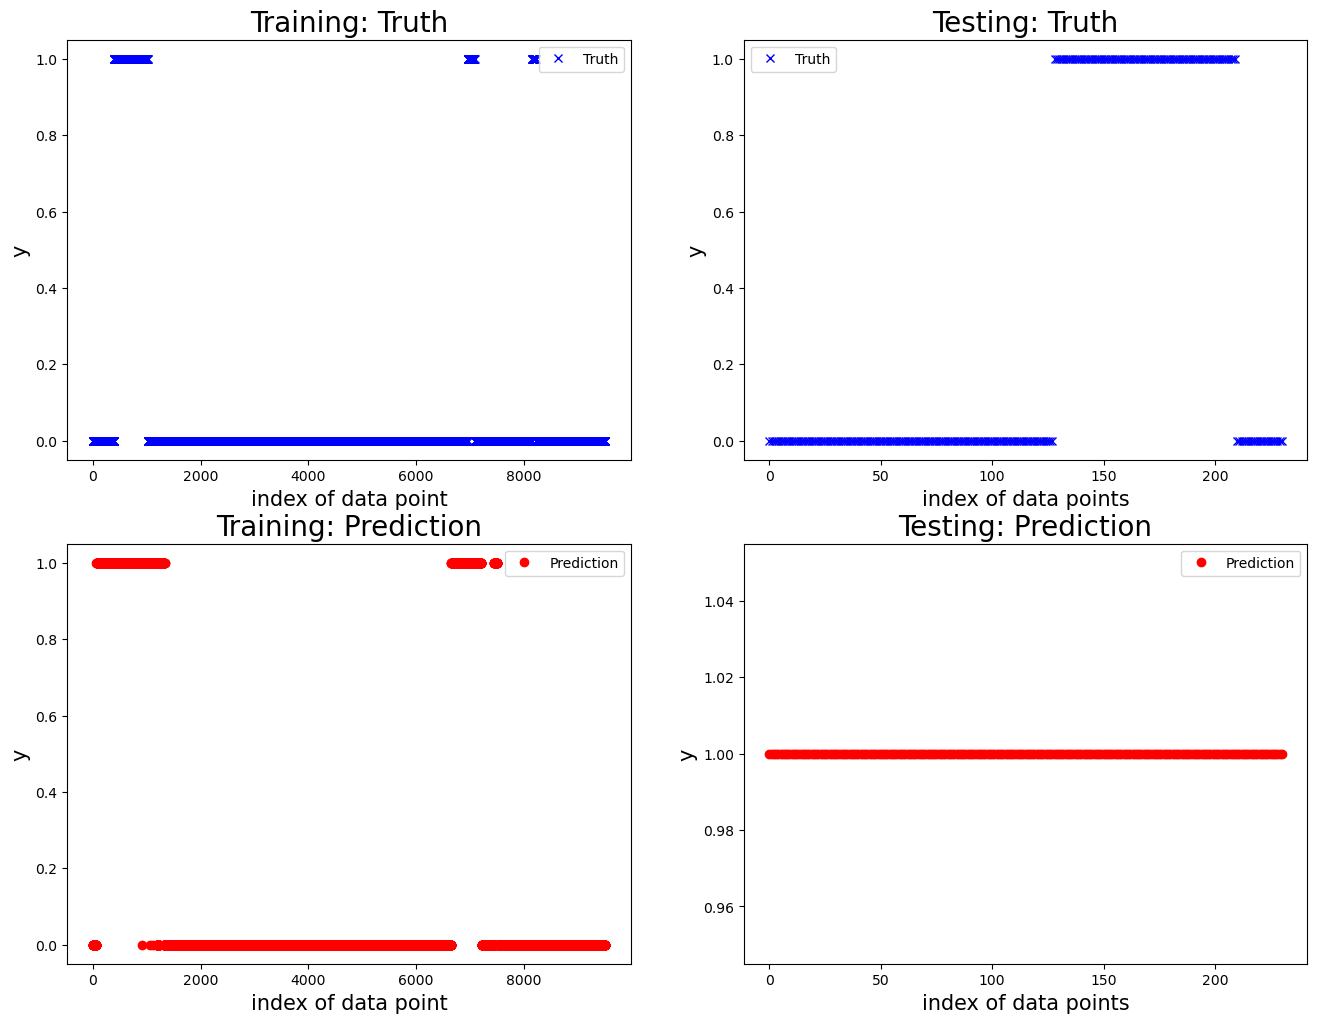


 New cv run:

Training performance, accuracy is: 0.9050522648083623
Training performance, precision is: 0.46419098143236076
Training performance, recall: 0.9162303664921466
Training performance, F1: 0.6161971830985916


Prediction performance, accuracy is: 0.23035714285714284
Prediction performance, precision is: 0.23035714285714284
Prediction performance, recall is：1.0
Prediction performance, F1 is：0.3744557329462989


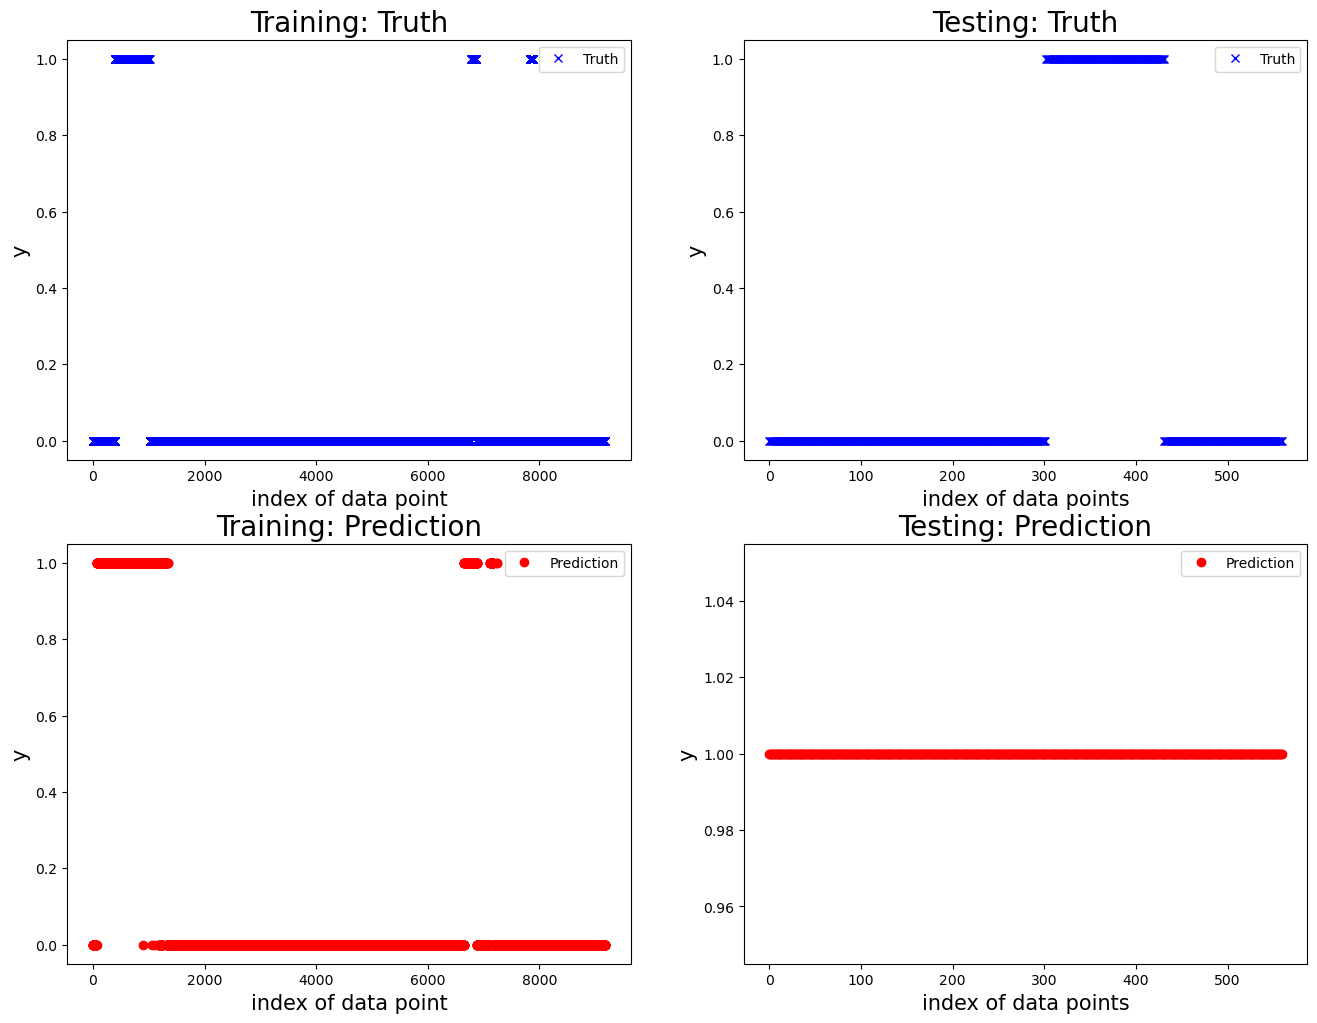


 New cv run:

Training performance, accuracy is: 0.978735632183908
Training performance, precision is: 0.8369905956112853
Training performance, recall: 0.9650602409638555
Training performance, F1: 0.8964745383324008


Prediction performance, accuracy is: 0.7222222222222222
Prediction performance, precision is: 0.0931899641577061
Prediction performance, recall is：0.4126984126984127
Prediction performance, F1 is：0.152046783625731


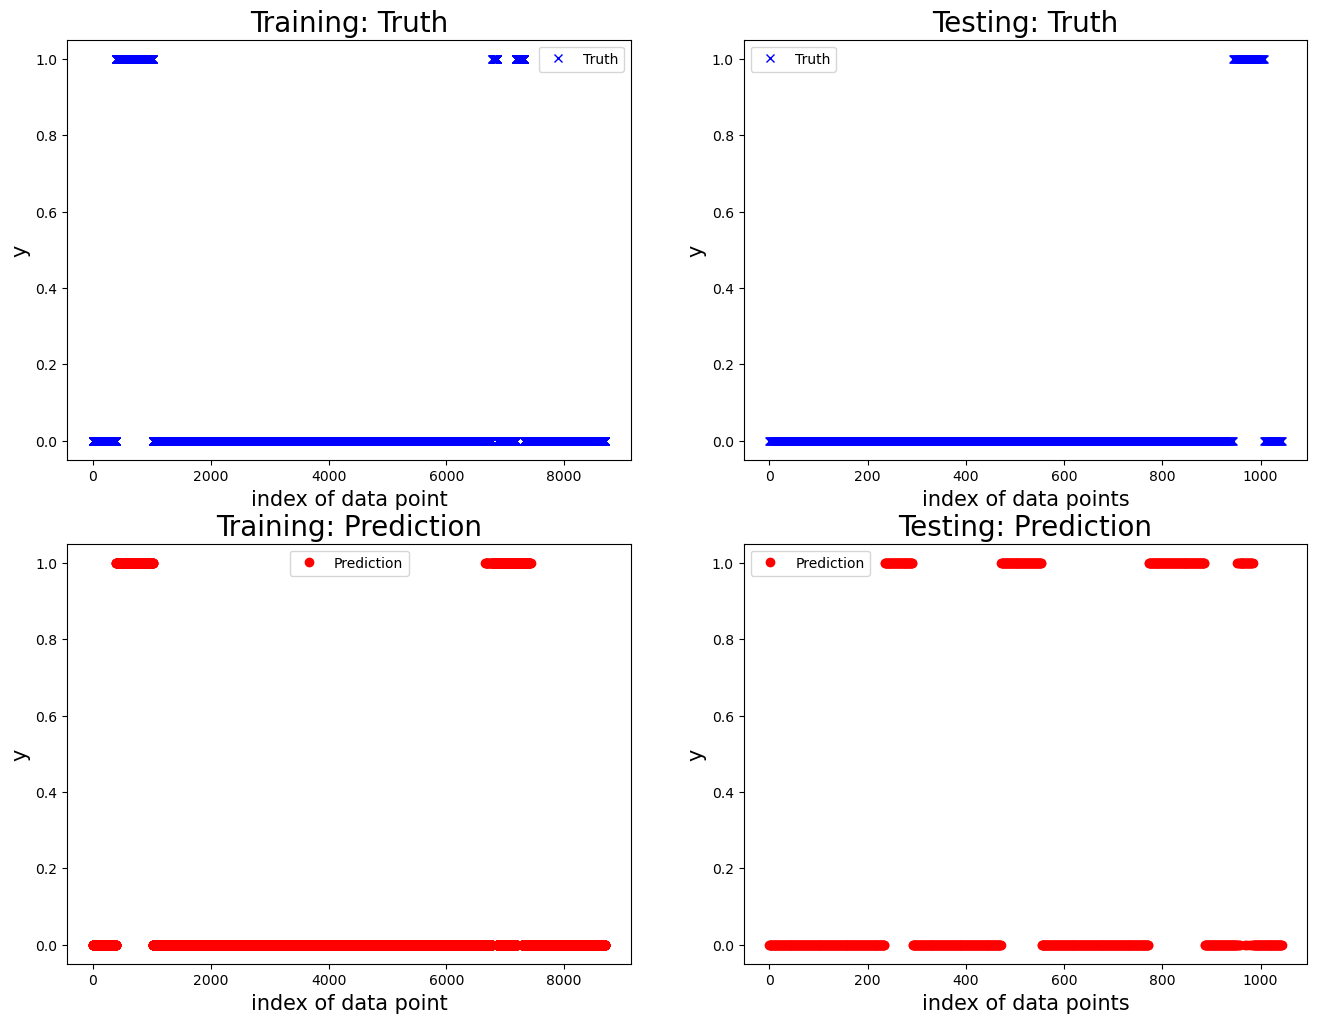


 New cv run:

Training performance, accuracy is: 0.8551902910333451
Training performance, precision is: 0.41566265060240964
Training performance, recall: 0.9272116461366181
Training performance, F1: 0.574003466204506


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


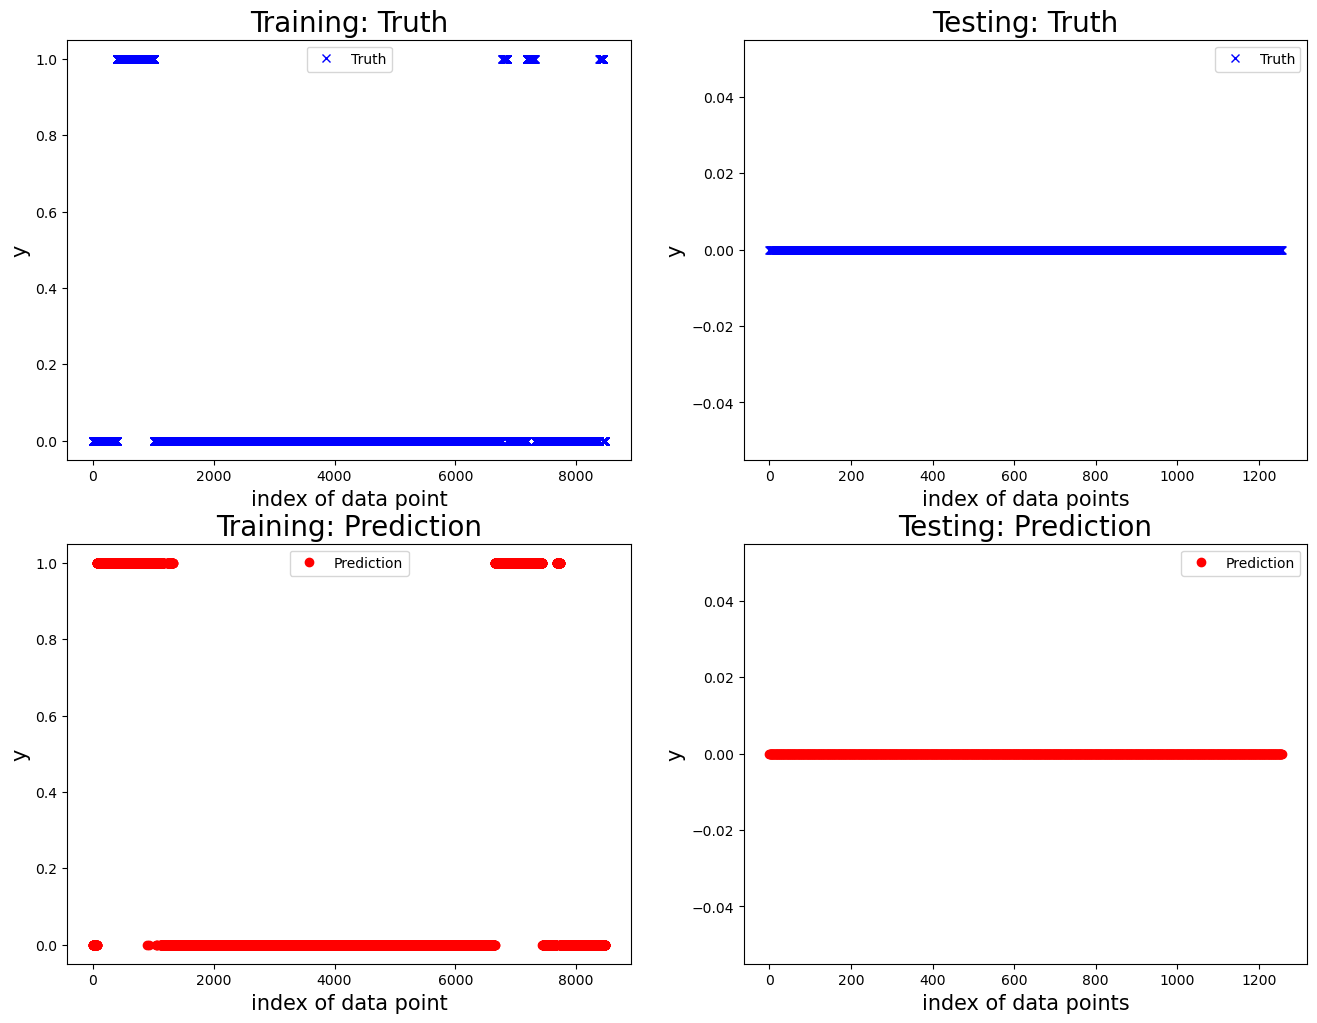

Accuracy     0.642901
Precision    0.335705
Recall       0.682540
F1 score     0.410093
dtype: float64




In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('mdl', LogisticRegression(class_weight='balanced'))    # Step 2: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define hyperparameters to search
param_grid = {
    'mdl__penalty': ['l1', 'l2'],  # Regularization penalty
    'mdl__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=5)

all_results = run_all_motors(df_data, grid_search, window_size=0, single_run_result=True, mdl_type='clf')

### window size = 5

Model for predicting the label of motor 1:

 New cv run:

Training performance, accuracy is: 0.9983723958333334
Training performance, precision is: 0.9482758620689655
Training performance, recall: 0.9649122807017544
Training performance, F1: 0.9565217391304347


Prediction performance, accuracy is: 0.9992477809538137
Prediction performance, precision is: 0.9976798143851509
Prediction performance, recall is：0.9984520123839009
Prediction performance, F1 is：0.9980657640232109


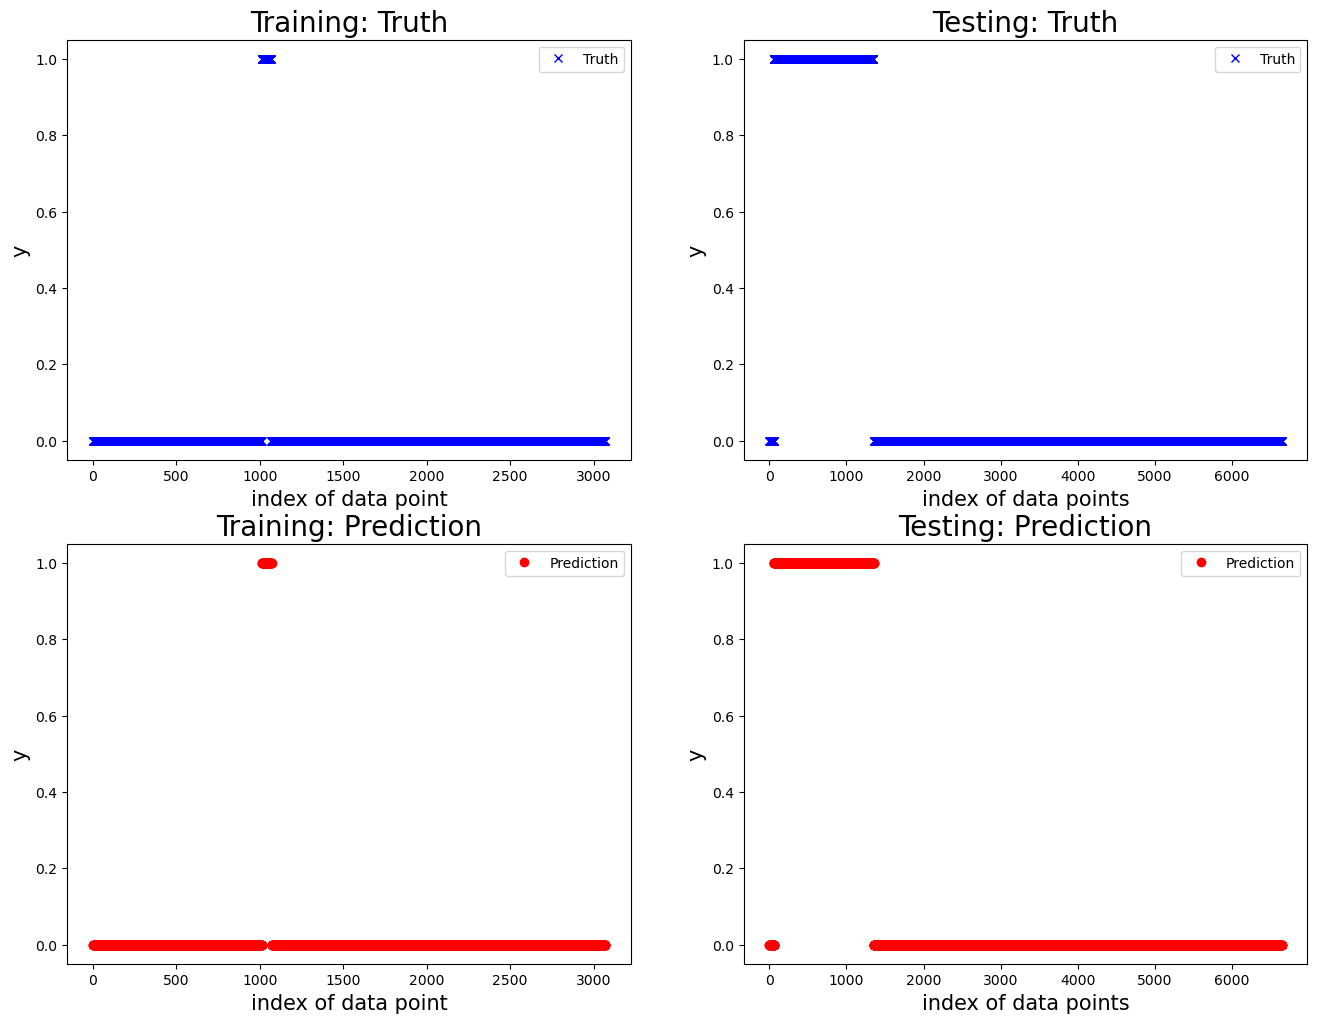


 New cv run:

Training performance, accuracy is: 0.9988412514484357
Training performance, precision is: 0.9962908011869436
Training performance, recall: 0.9955522609340252
Training performance, F1: 0.9959213941416389


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


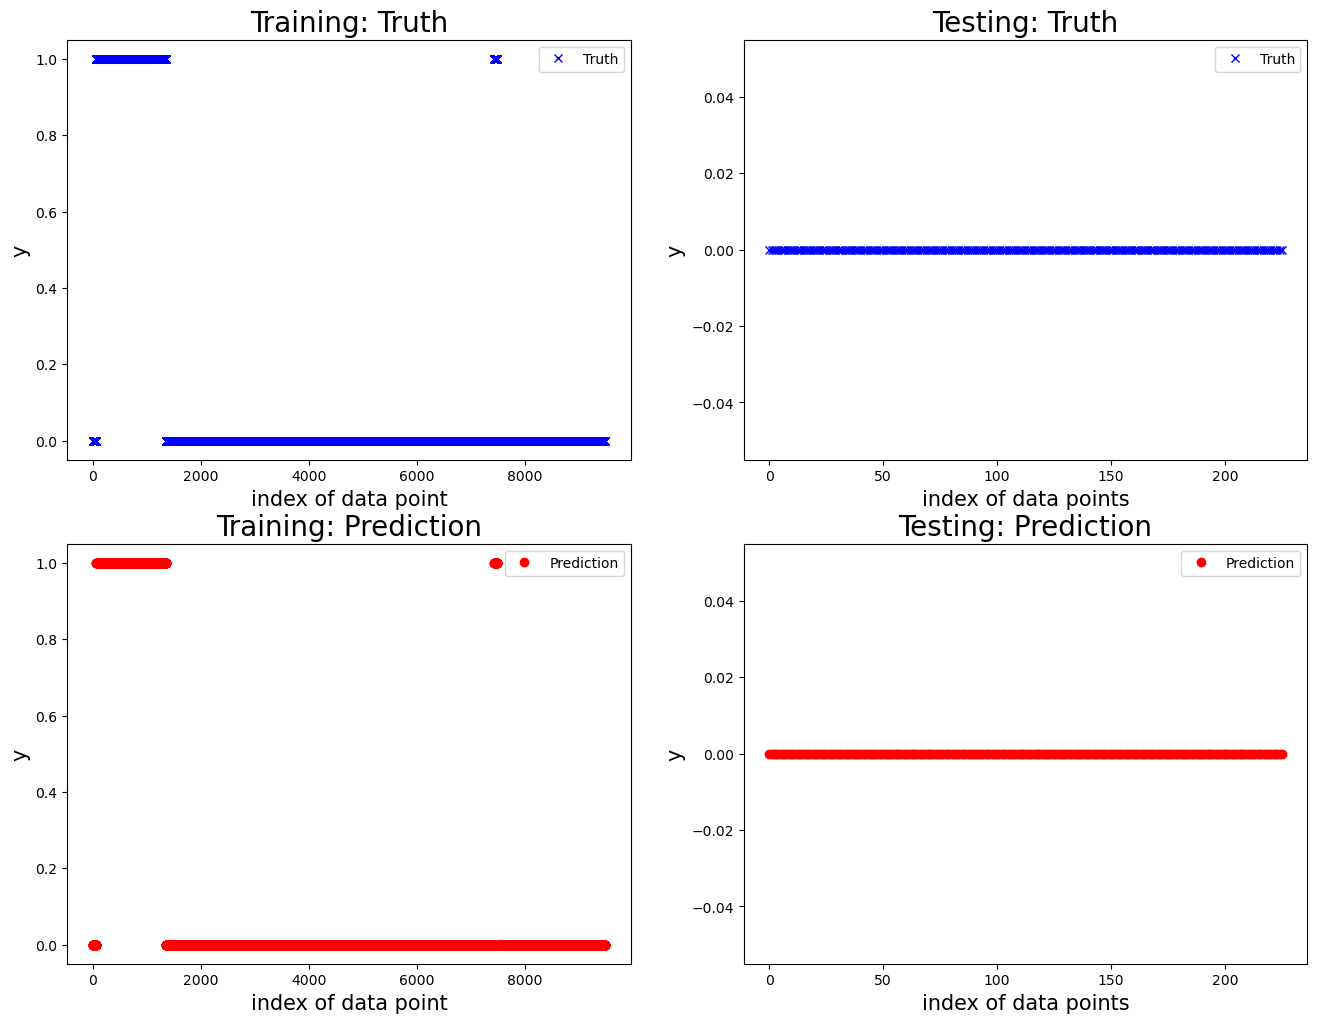


 New cv run:

Training performance, accuracy is: 0.9987996508075077
Training performance, precision is: 0.9962908011869436
Training performance, recall: 0.9955522609340252
Training performance, F1: 0.9959213941416389


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


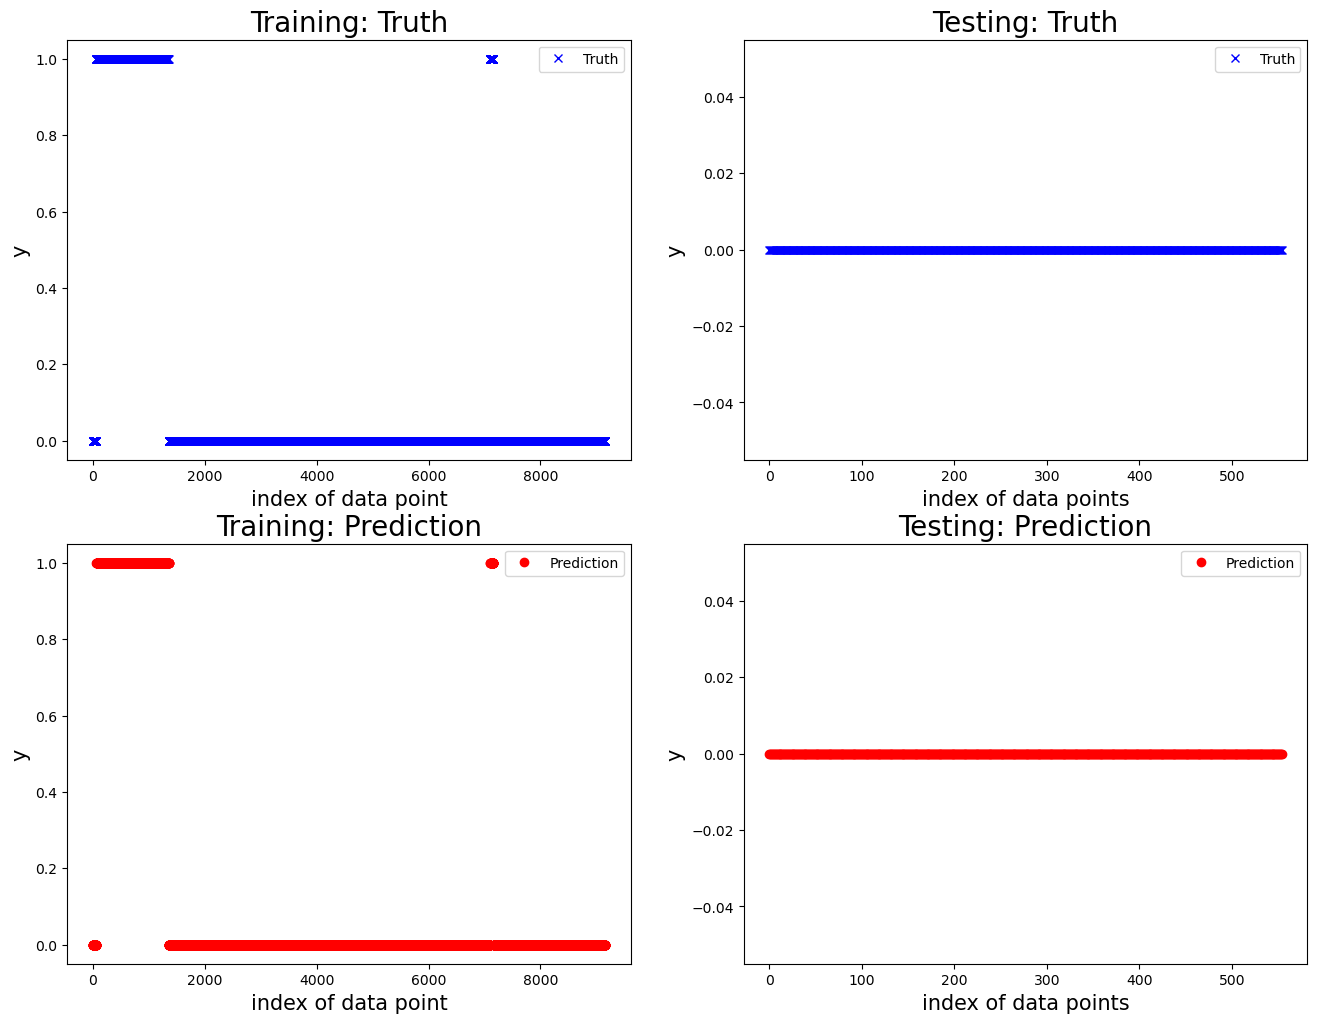


 New cv run:

Training performance, accuracy is: 0.9993087557603687
Training performance, precision is: 0.9976780185758514
Training performance, recall: 0.9976780185758514
Training performance, F1: 0.9976780185758514


Prediction performance, accuracy is: 0.9942252165543792
Prediction performance, precision is: 0.9636363636363636
Prediction performance, recall is：0.9298245614035088
Prediction performance, F1 is：0.9464285714285715


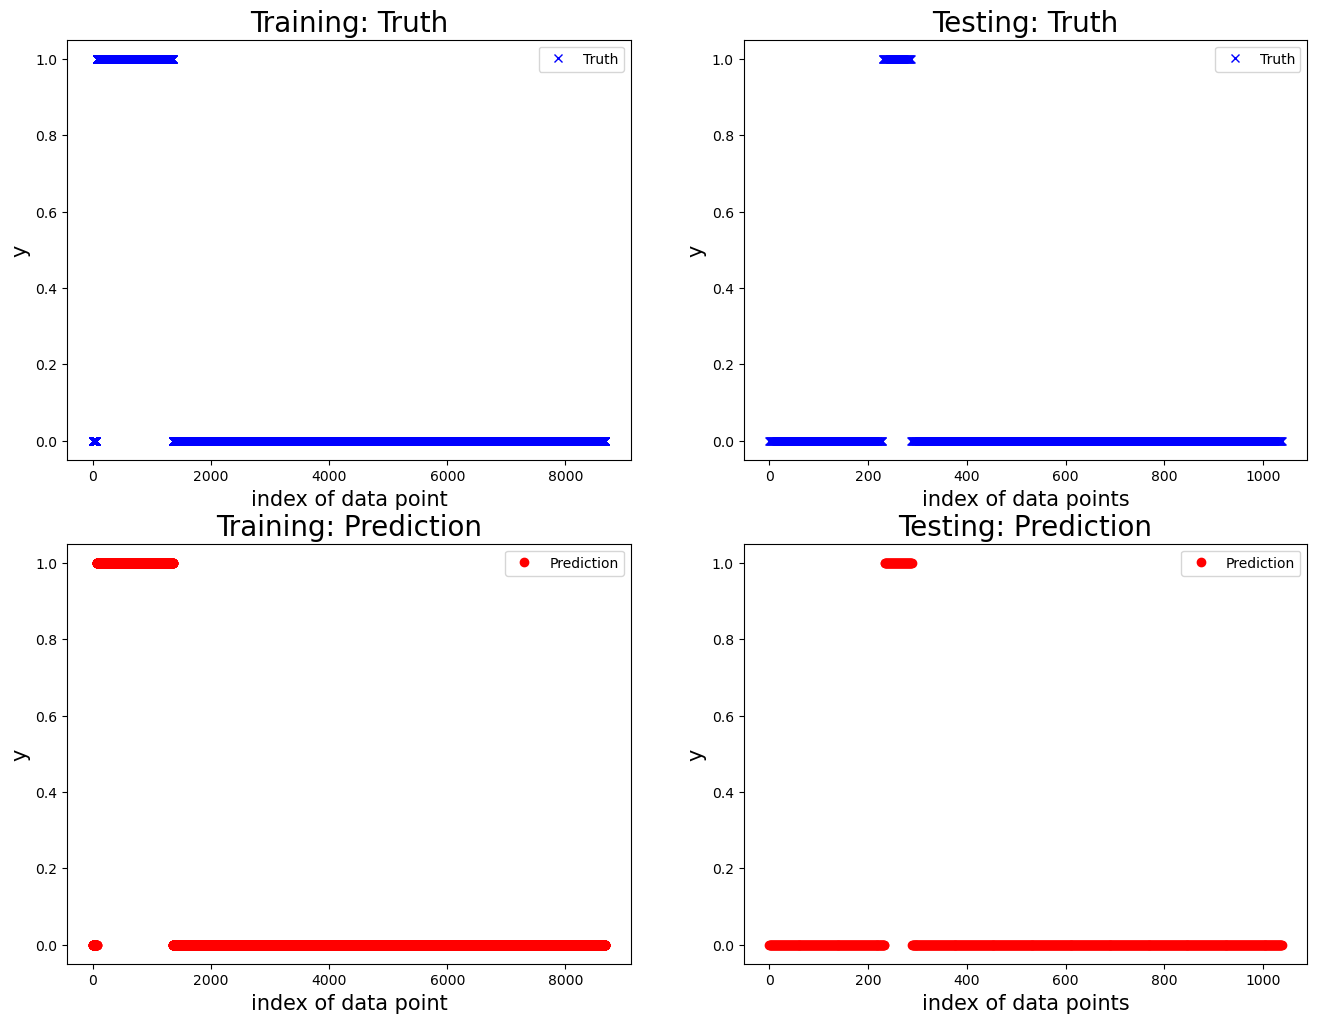


 New cv run:

Training performance, accuracy is: 0.999527577654423
Training performance, precision is: 0.9985174203113417
Training performance, recall: 0.9985174203113417
Training performance, F1: 0.9985174203113417


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


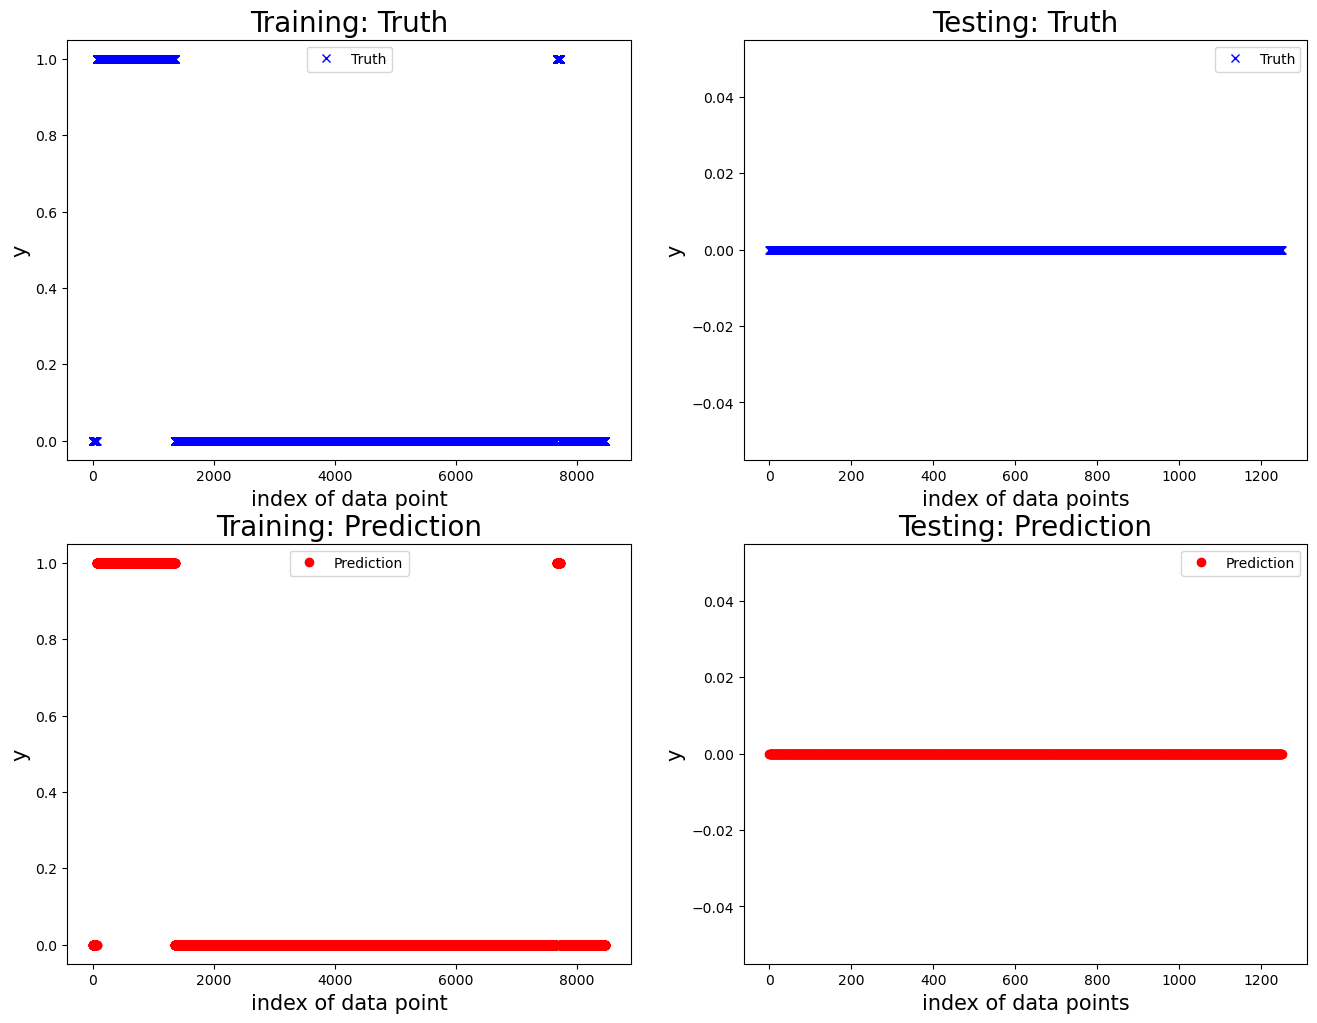

Accuracy     0.998695
Precision    0.992263
Recall       0.985655
F1 score     0.988899
dtype: float64


Model for predicting the label of motor 2:

 New cv run:

Training performance, accuracy is: 0.9983723958333334
Training performance, precision is: 0.9629629629629629
Training performance, recall: 0.975
Training performance, F1: 0.9689440993788819


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


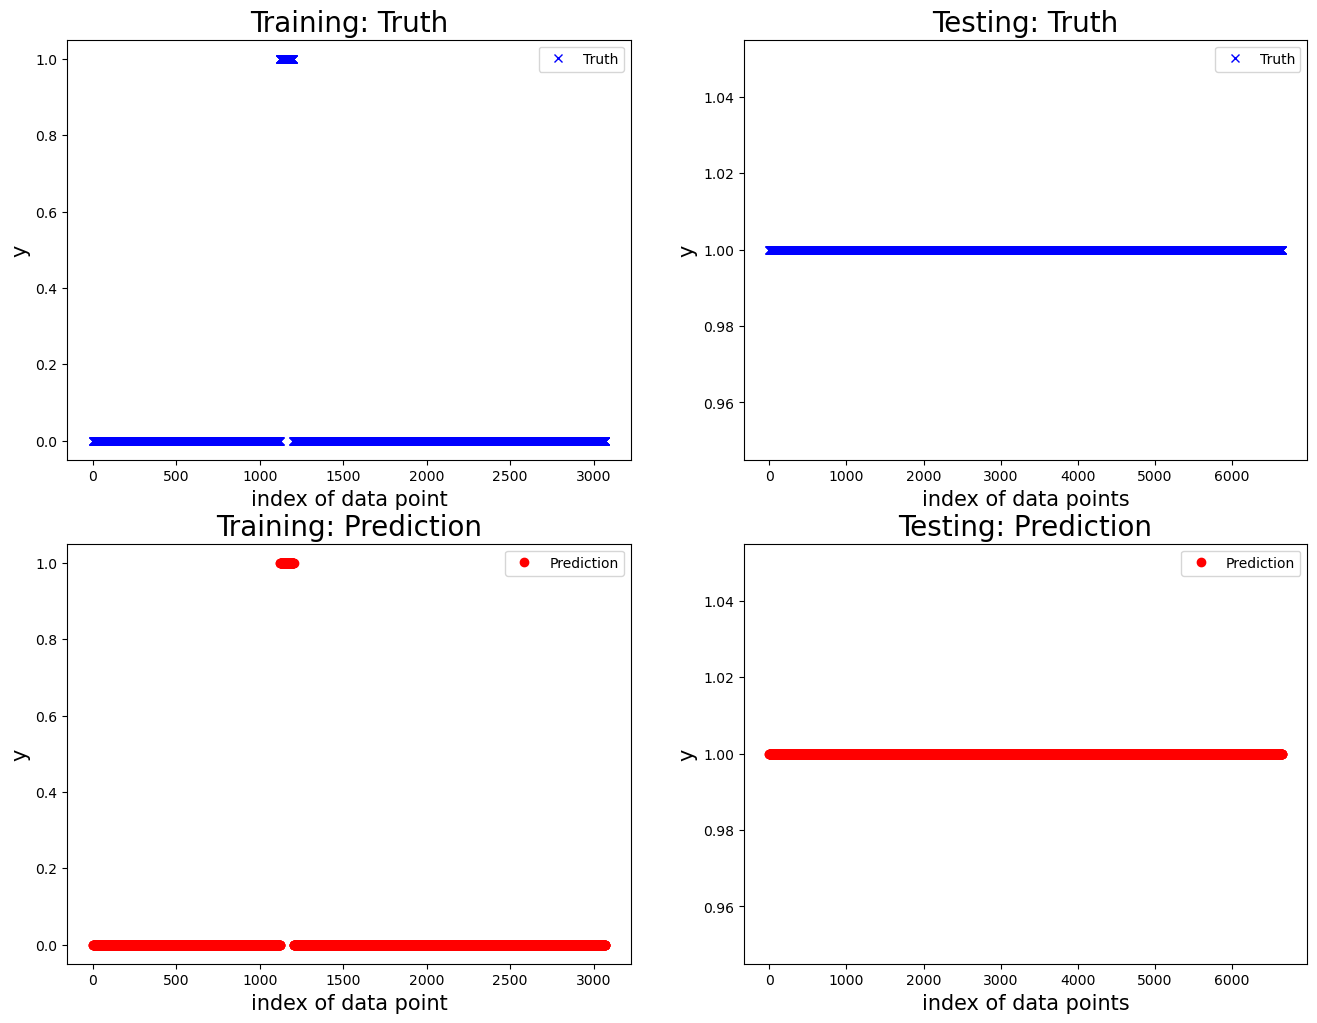


 New cv run:

Training performance, accuracy is: 0.9994732961129253
Training performance, precision is: 0.9998512790005949
Training performance, recall: 0.9994053812992418
Training performance, F1: 0.9996282804252472


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


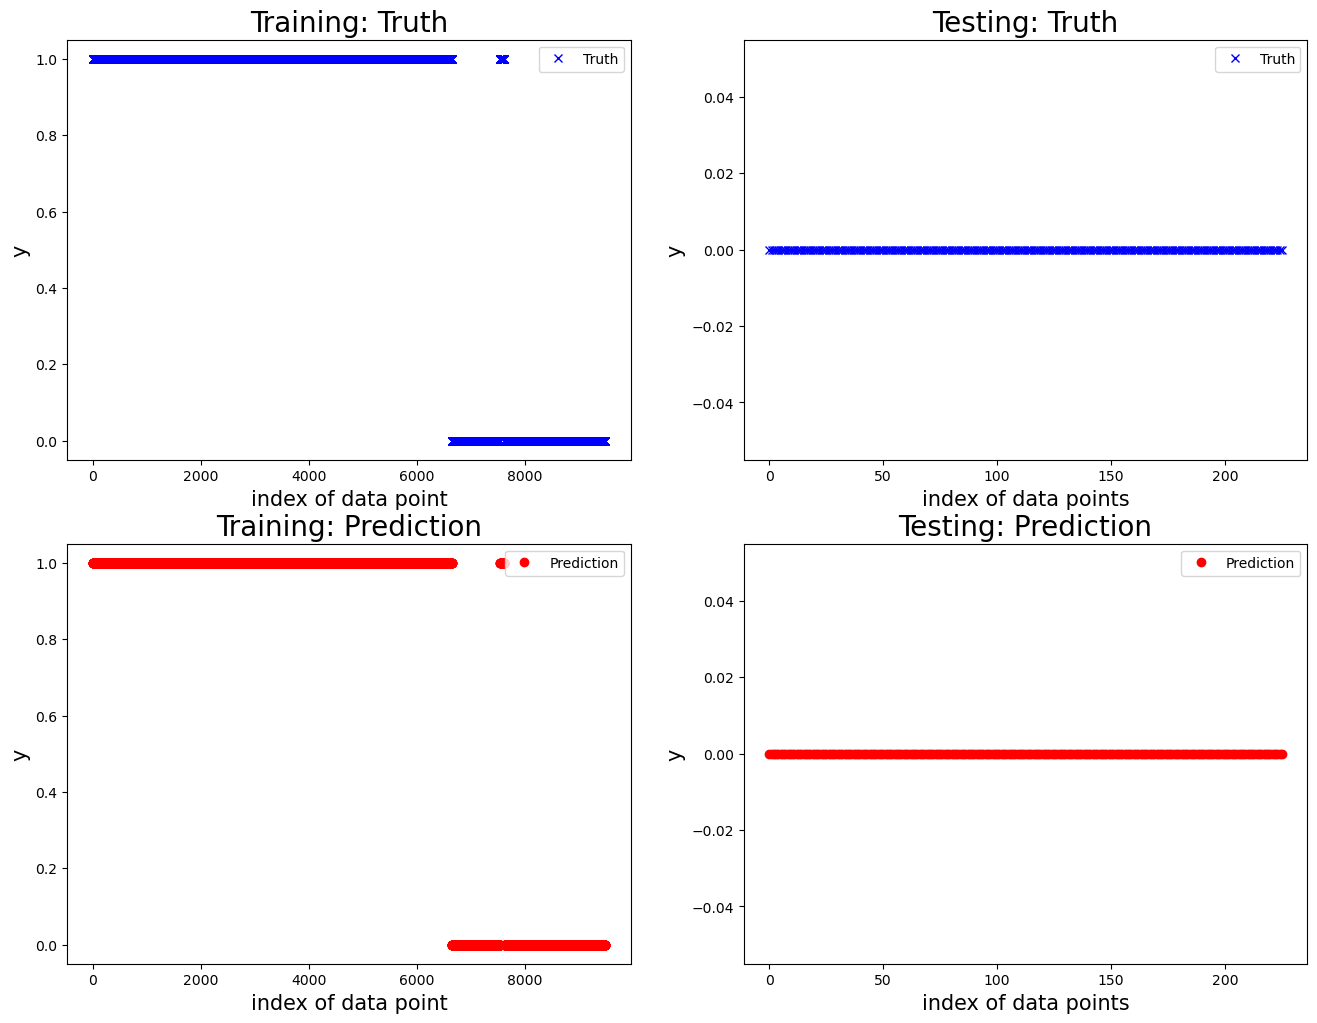


 New cv run:

Training performance, accuracy is: 0.9993452640768223
Training performance, precision is: 0.9998512568793694
Training performance, recall: 0.9992567266240523
Training performance, F1: 0.9995539033457248


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


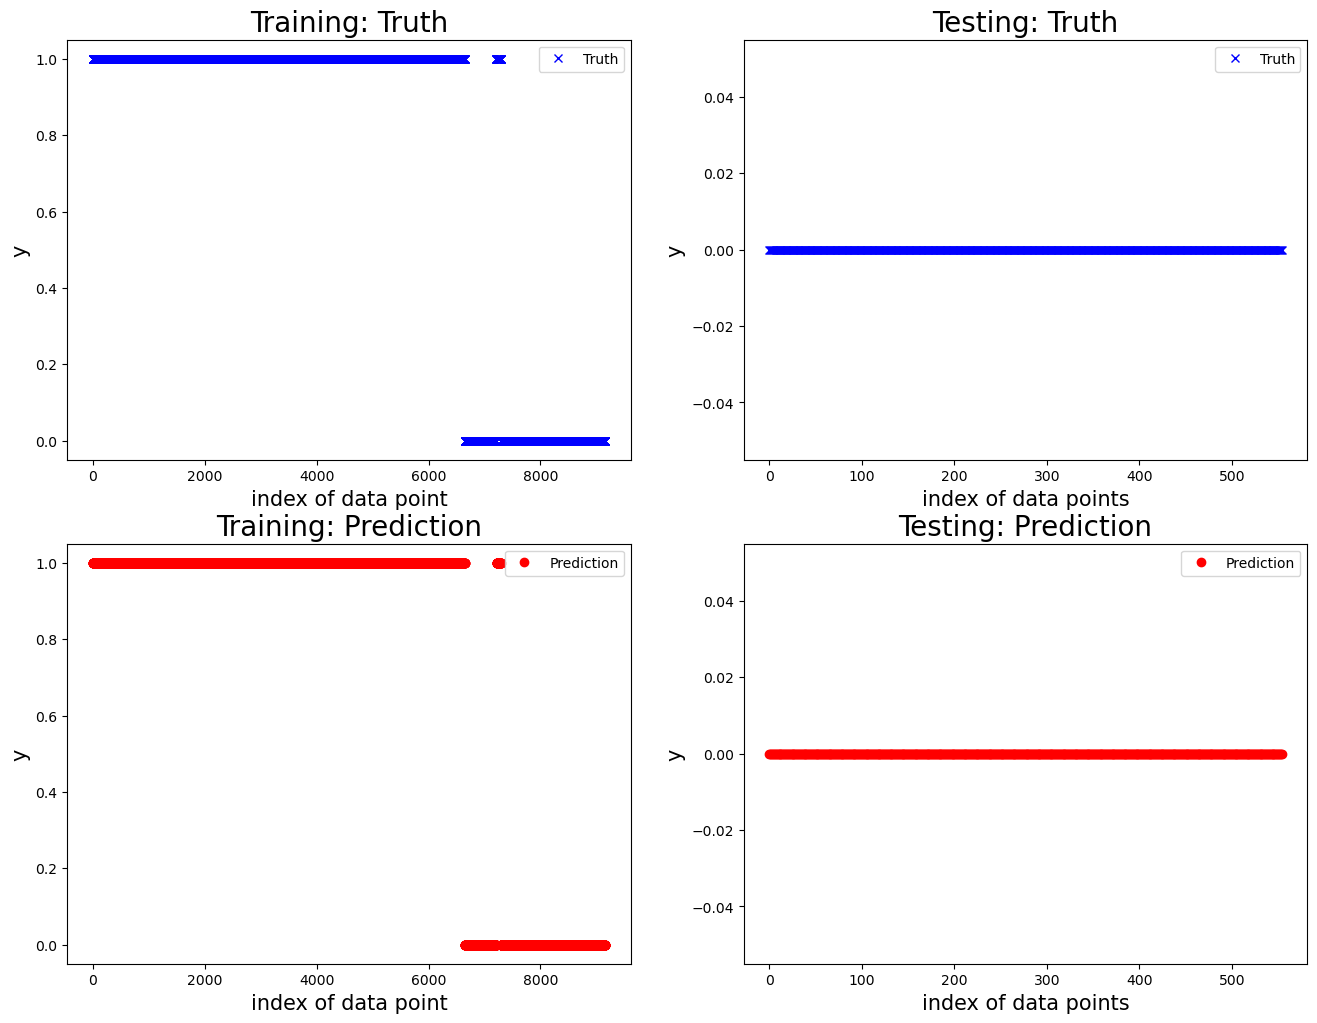


 New cv run:

Training performance, accuracy is: 1.0
Training performance, precision is: 1.0
Training performance, recall: 1.0
Training performance, F1: 1.0


Prediction performance, accuracy is: 0.9942252165543792
Prediction performance, precision is: 0.9868421052631579
Prediction performance, recall is：0.9375
Prediction performance, F1 is：0.9615384615384615


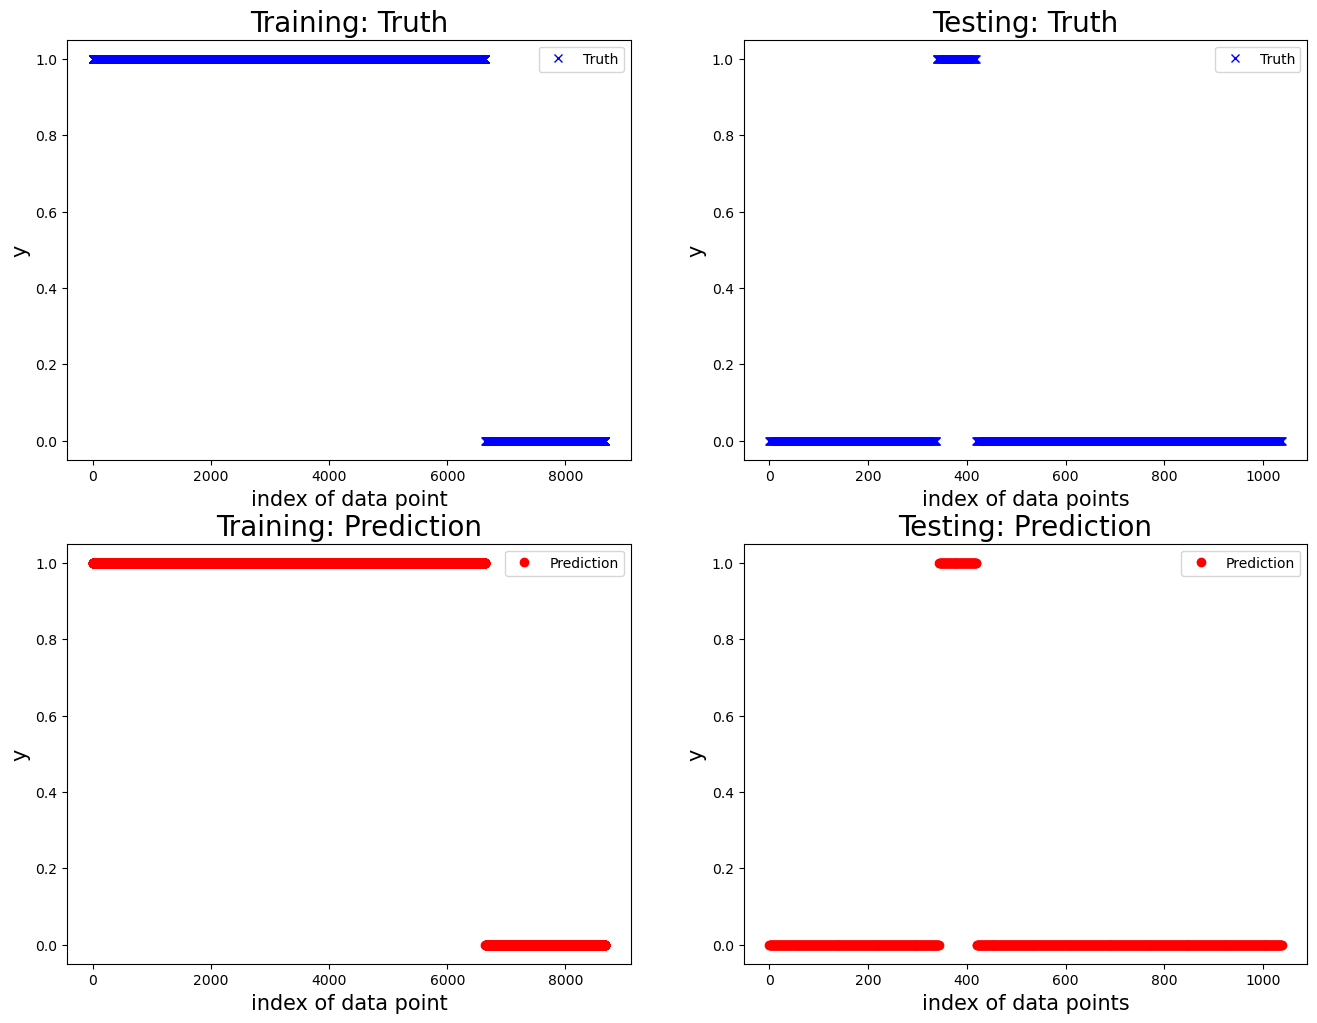


 New cv run:

Training performance, accuracy is: 0.9992913664816346
Training performance, precision is: 0.9998512568793694
Training performance, recall: 0.9992567266240523
Training performance, F1: 0.9995539033457248


Prediction performance, accuracy is: 0.9800319488817891
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


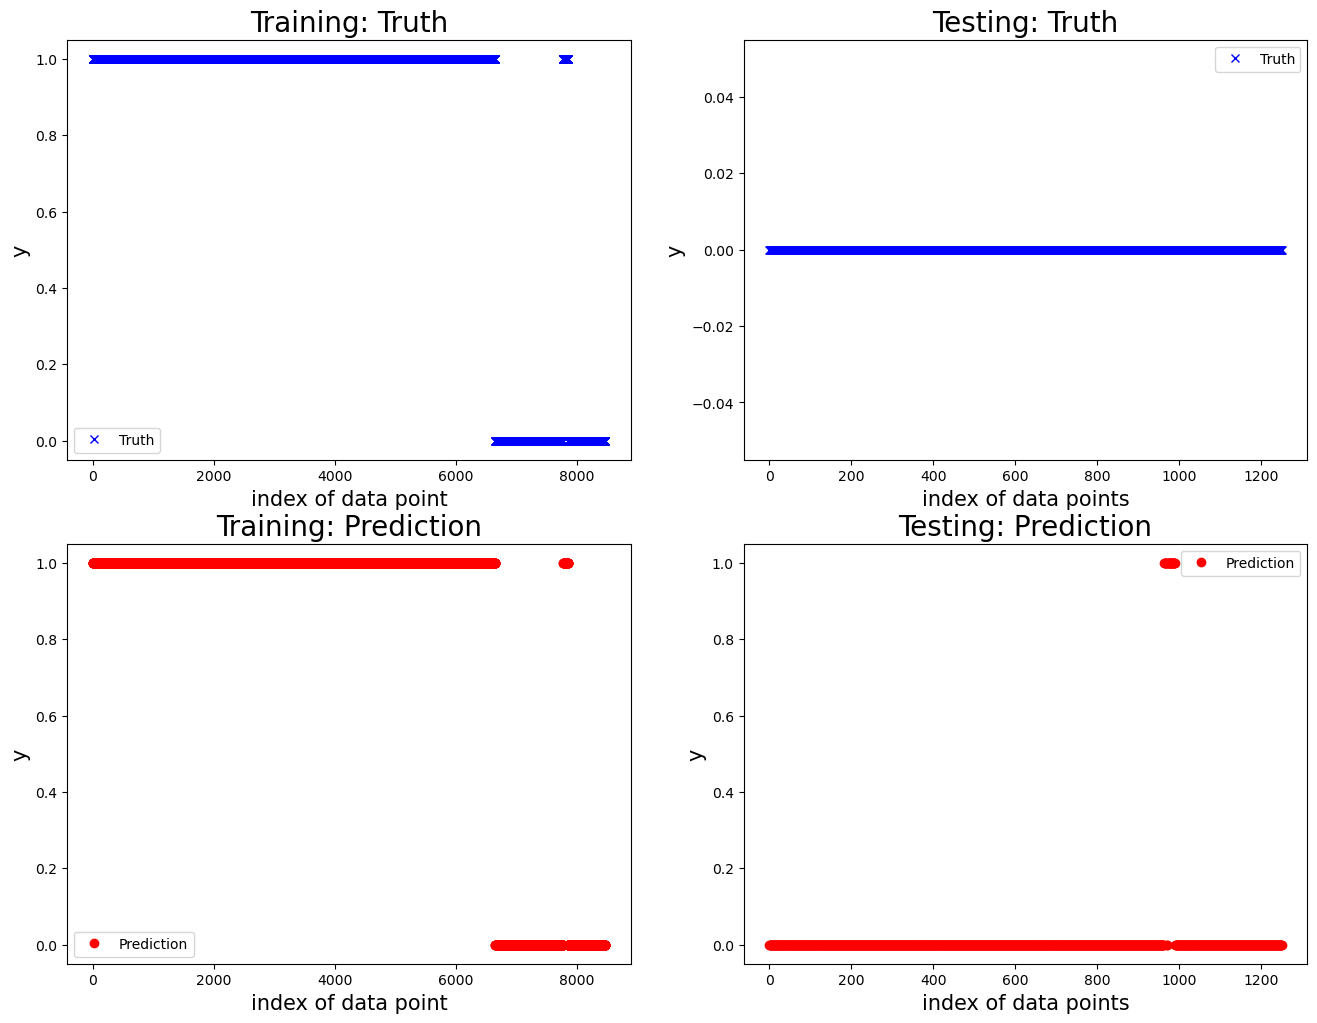

Accuracy     0.994851
Precision    0.797368
Recall       0.787500
F1 score     0.792308
dtype: float64


Model for predicting the label of motor 3:

 New cv run:

Training performance, accuracy is: 0.9983723958333334
Training performance, precision is: 0.9642857142857143
Training performance, recall: 0.9759036144578314
Training performance, F1: 0.970059880239521


Prediction performance, accuracy is: 0.9984955619076274
Prediction performance, precision is: 0.8695652173913043
Prediction performance, recall is：0.9090909090909091
Prediction performance, F1 is：0.888888888888889


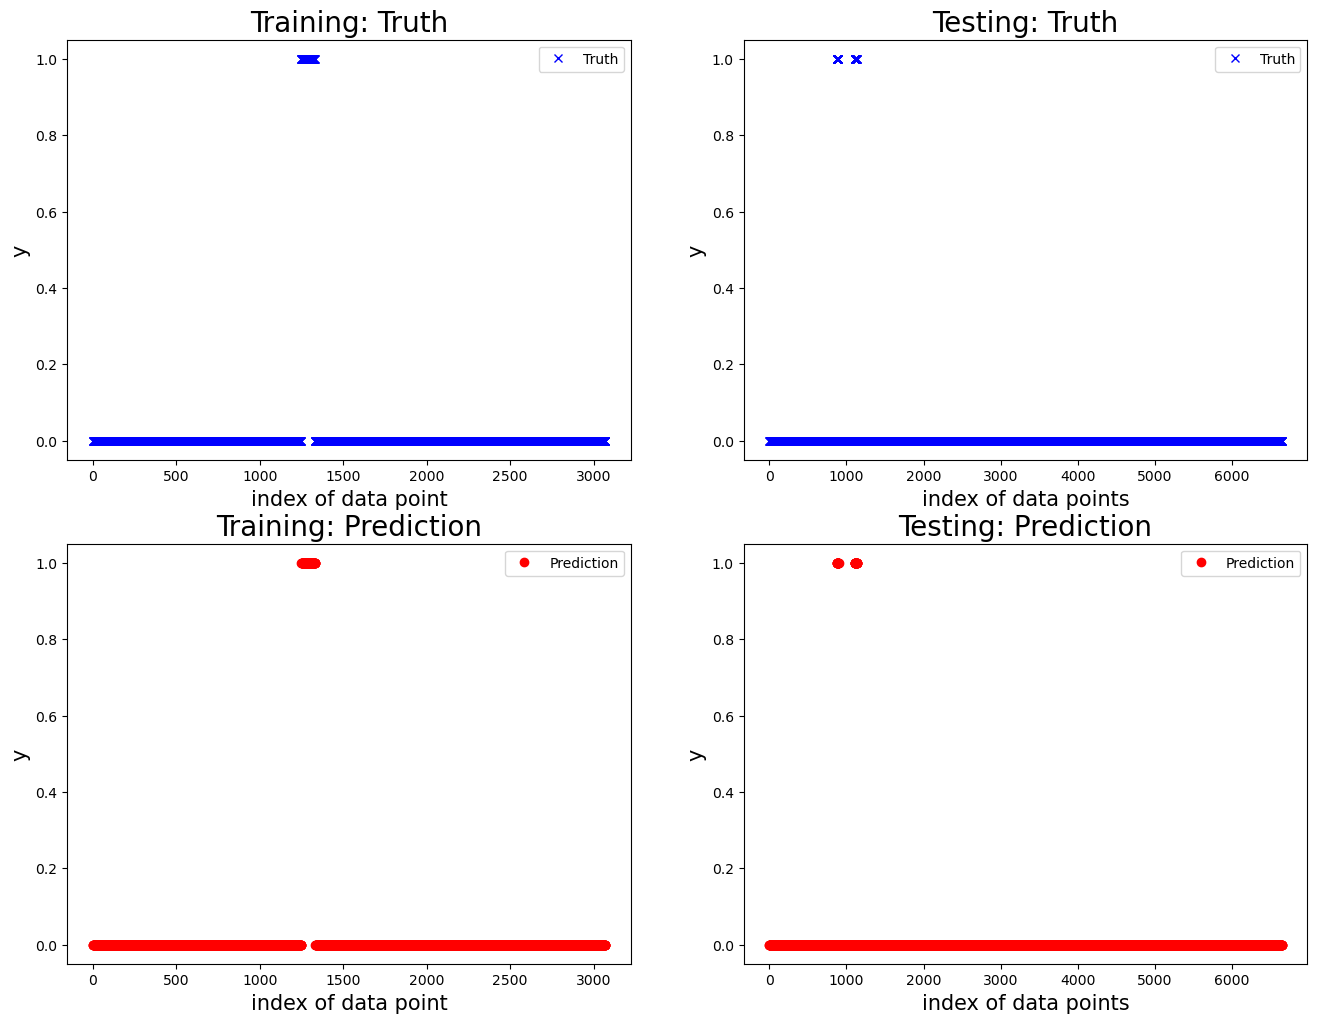


 New cv run:

Training performance, accuracy is: 0.9989465922258506
Training performance, precision is: 0.9465648854961832
Training performance, recall: 0.9763779527559056
Training performance, F1: 0.9612403100775194


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


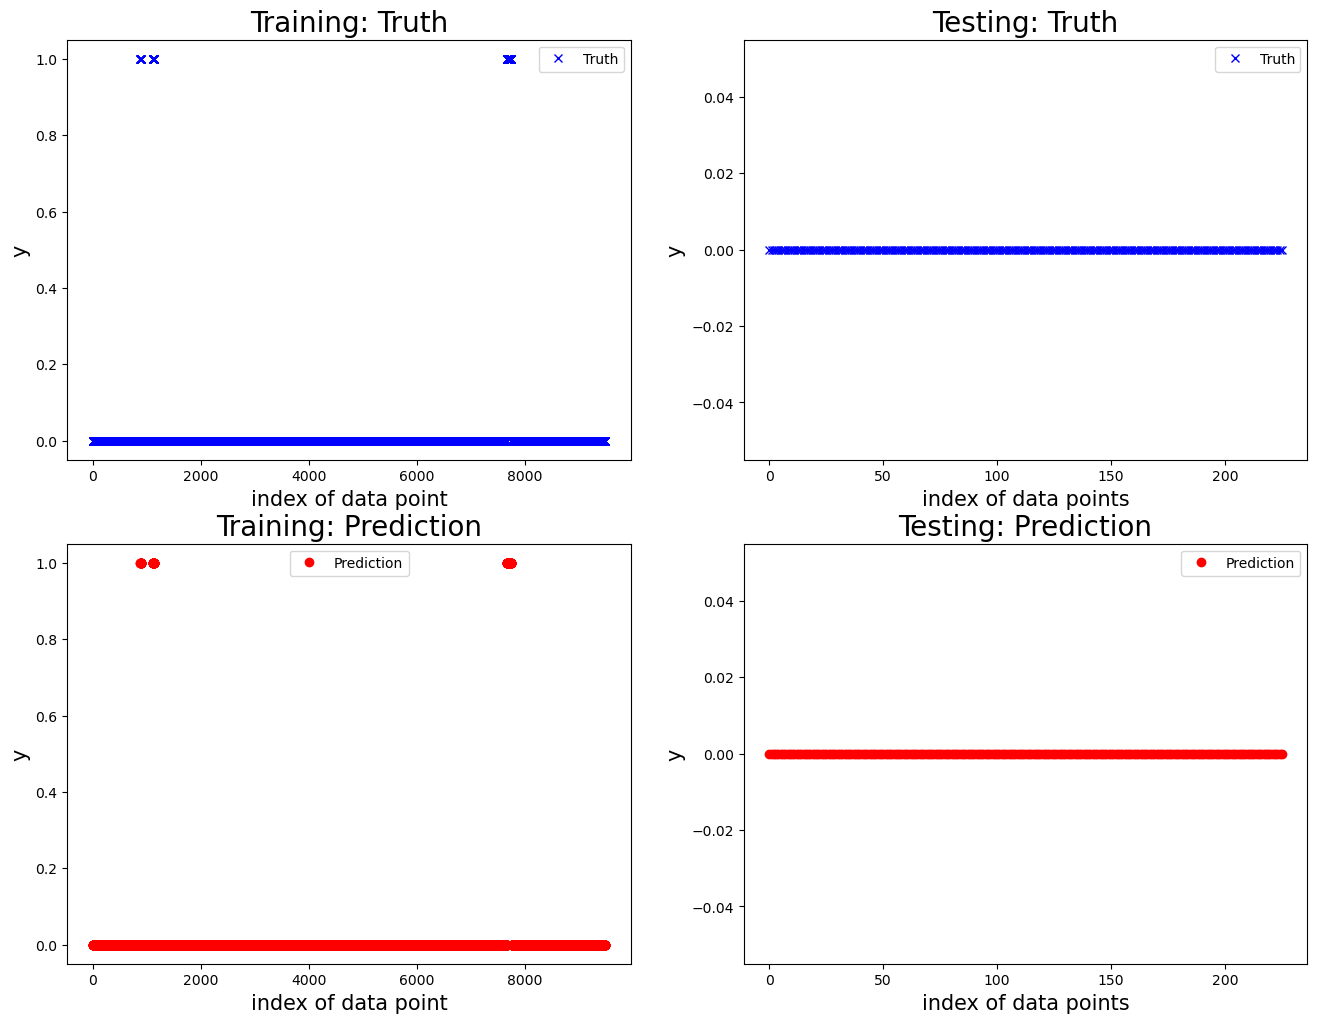


 New cv run:

Training performance, accuracy is: 0.9989087734613706
Training performance, precision is: 0.9465648854961832
Training performance, recall: 0.9763779527559056
Training performance, F1: 0.9612403100775194


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


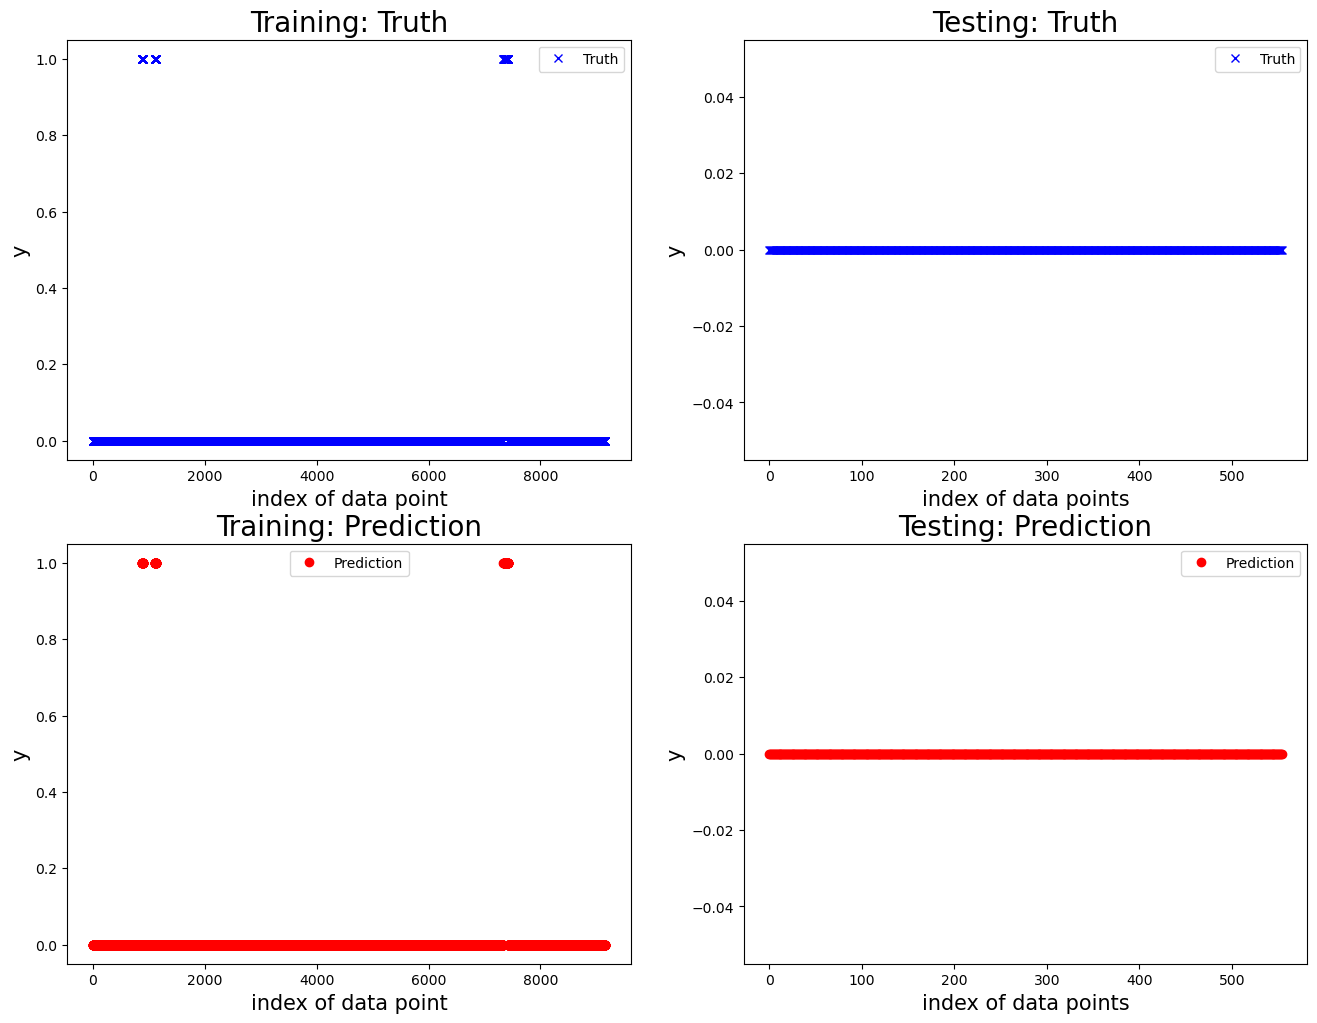


 New cv run:

Training performance, accuracy is: 0.9990783410138249
Training performance, precision is: 0.875
Training performance, recall: 0.9545454545454546
Training performance, F1: 0.9130434782608695


Prediction performance, accuracy is: 0.9971126082771896
Prediction performance, precision is: 0.9761904761904762
Prediction performance, recall is：0.9879518072289156
Prediction performance, F1 is：0.9820359281437125


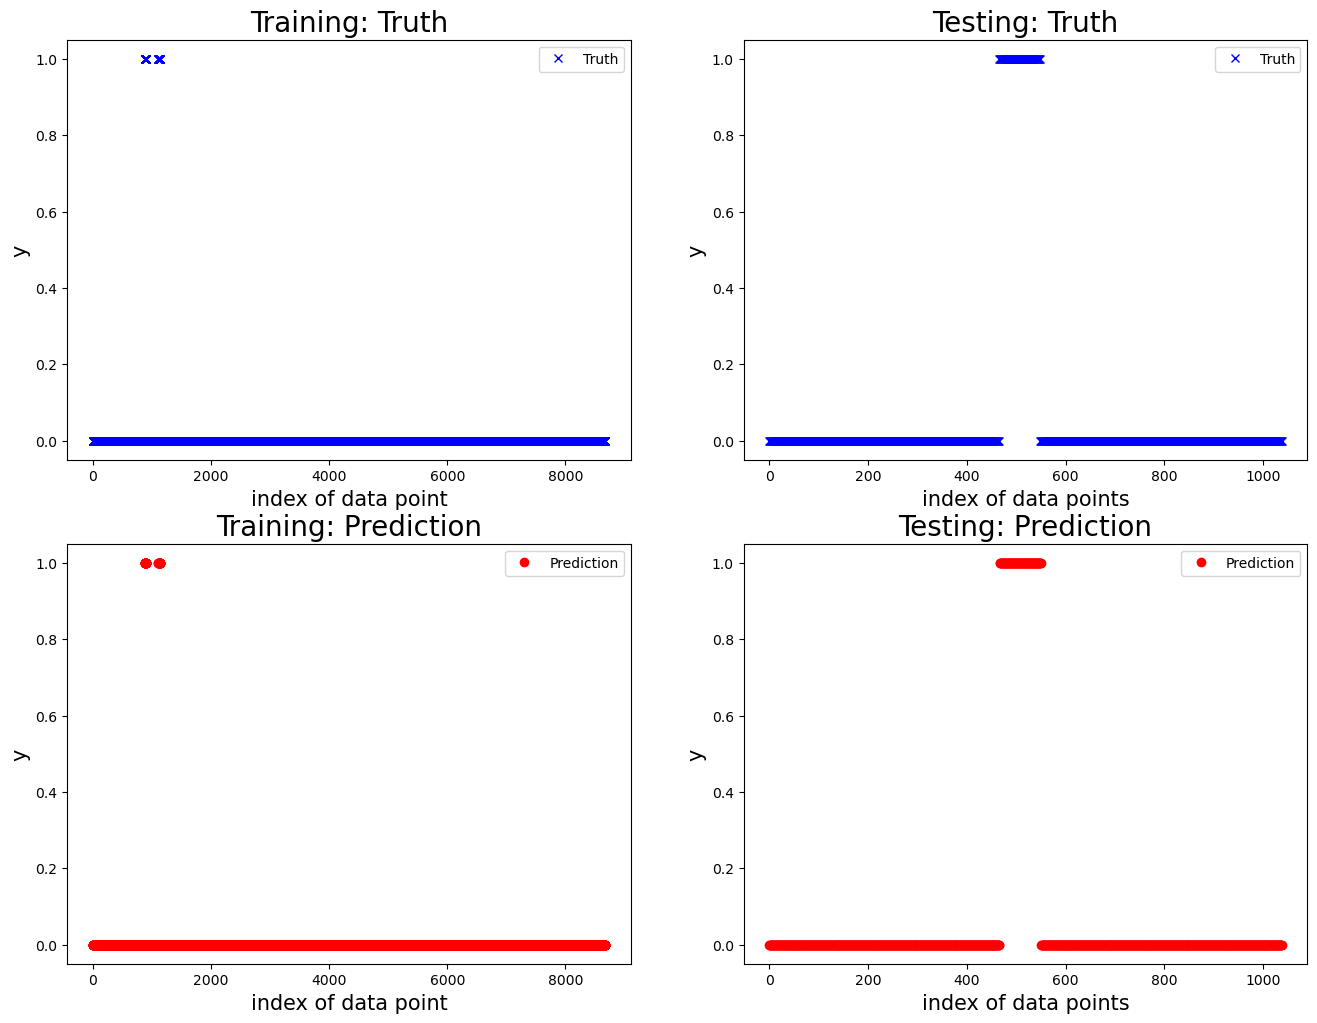


 New cv run:

Training performance, accuracy is: 0.9989370497224519
Training performance, precision is: 0.9538461538461539
Training performance, recall: 0.9763779527559056
Training performance, F1: 0.9649805447470817


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


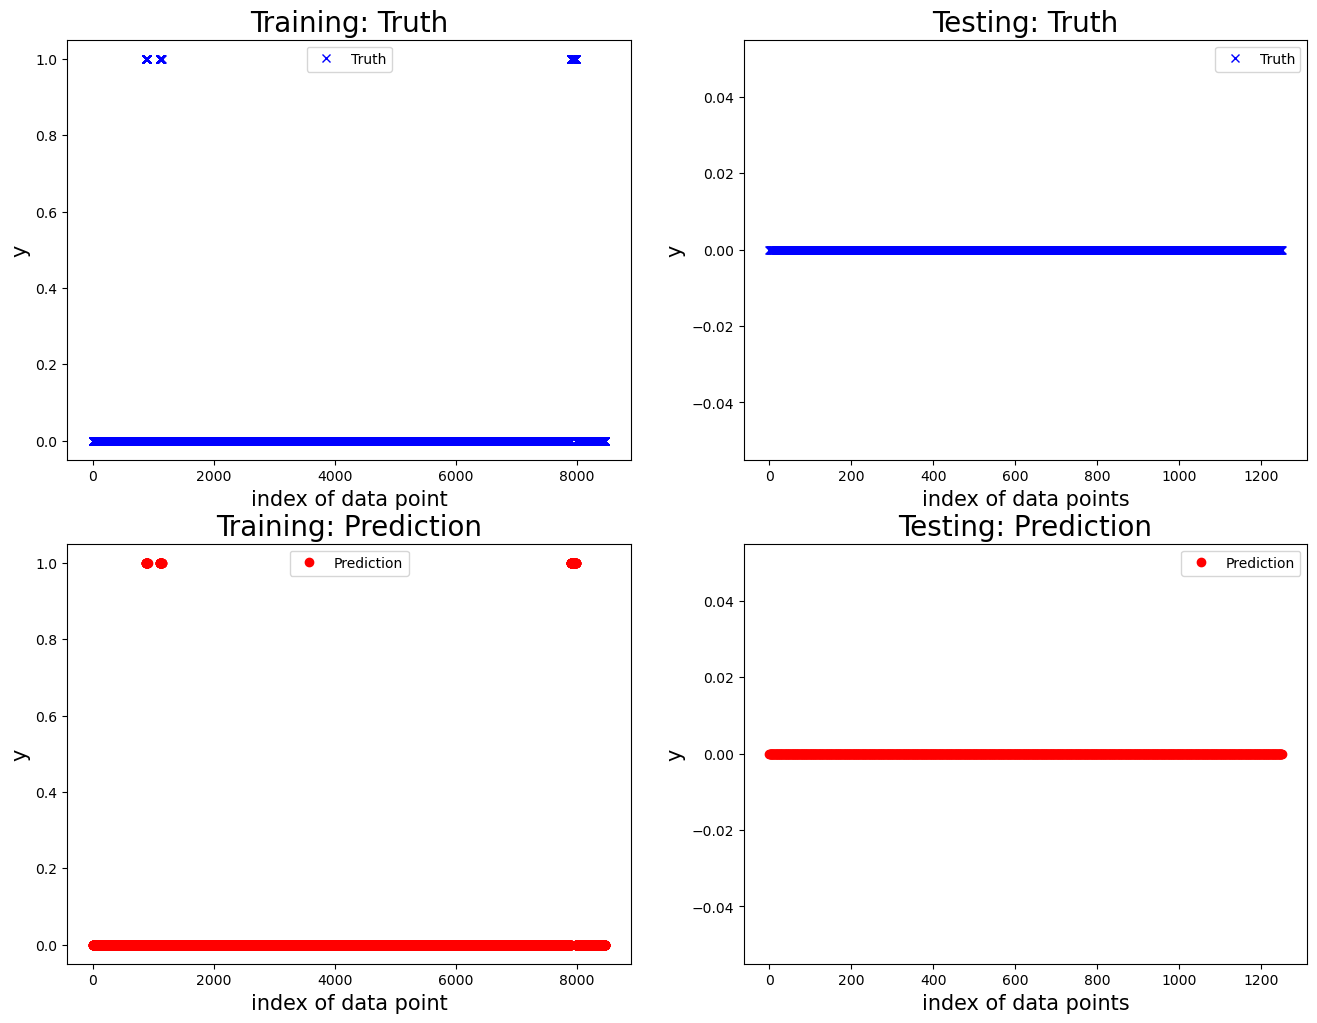

Accuracy     0.999122
Precision    0.969151
Recall       0.979409
F1 score     0.974185
dtype: float64


Model for predicting the label of motor 4:

 New cv run:

Training performance, accuracy is: 0.9983723958333334
Training performance, precision is: 0.9659090909090909
Training performance, recall: 0.9770114942528736
Training performance, F1: 0.9714285714285714


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


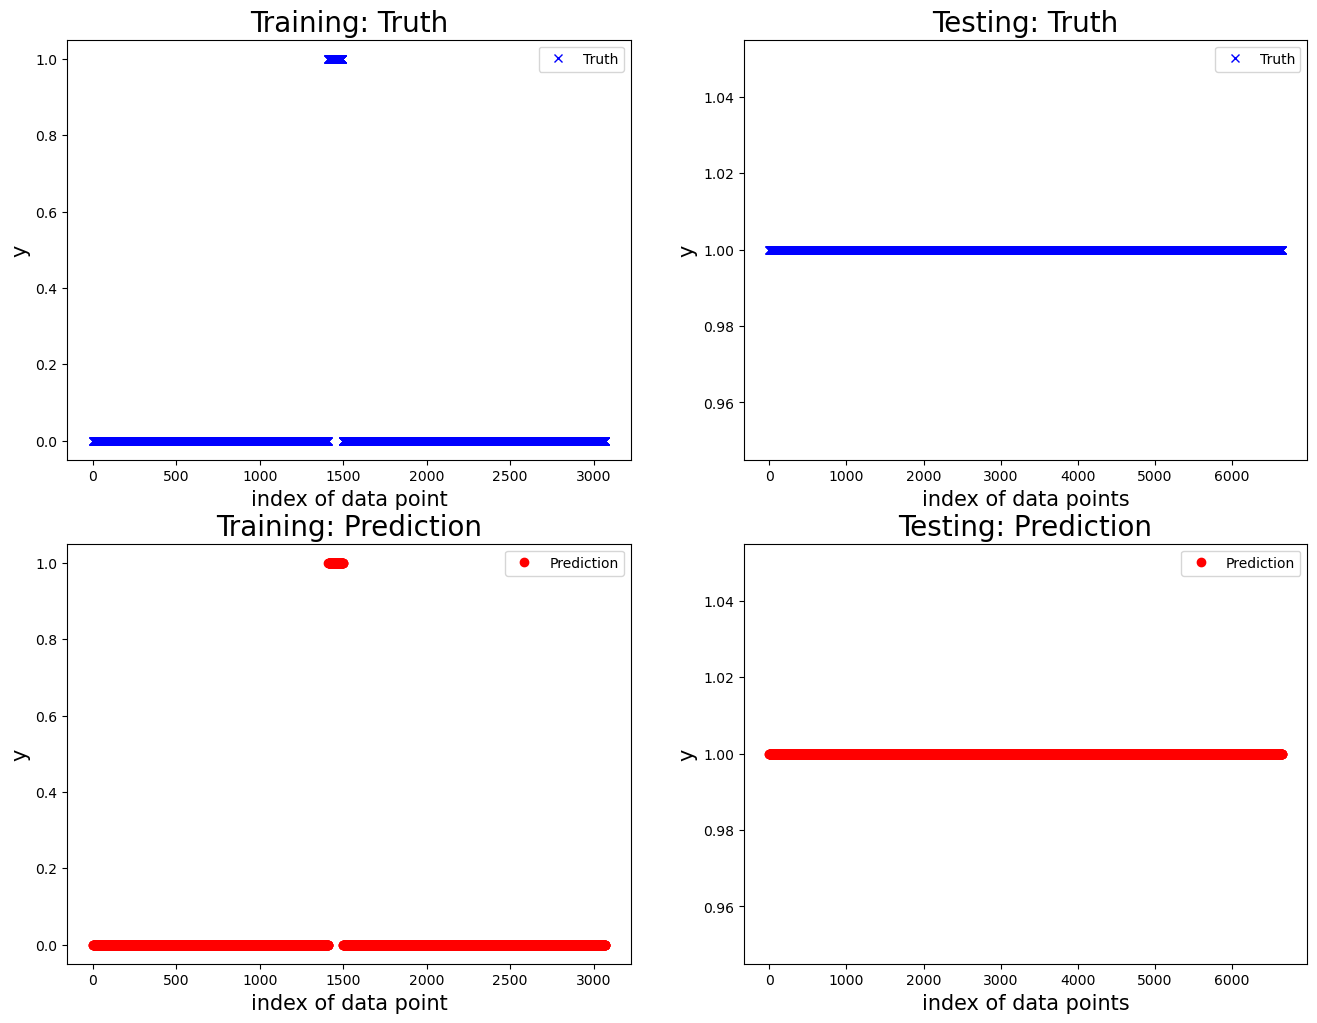


 New cv run:

Training performance, accuracy is: 0.9994732961129253
Training performance, precision is: 0.9998514336651315
Training performance, recall: 0.9994059994059994
Training performance, F1: 0.999628666914222


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


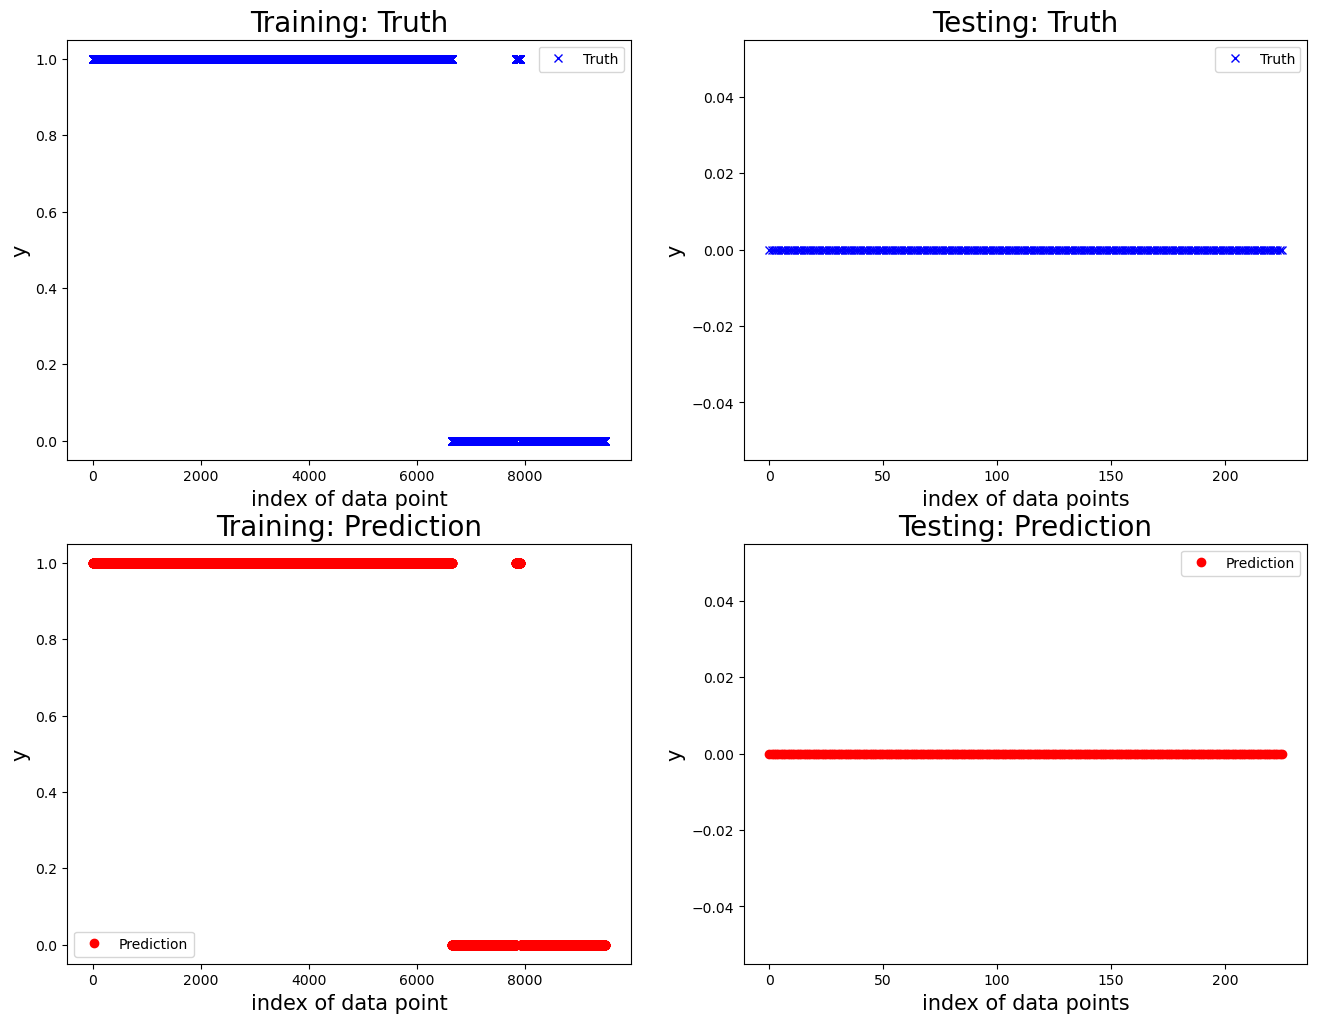


 New cv run:

Training performance, accuracy is: 0.9993452640768223
Training performance, precision is: 0.999851411589896
Training performance, recall: 0.9992574992574993
Training performance, F1: 0.999554367201426


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


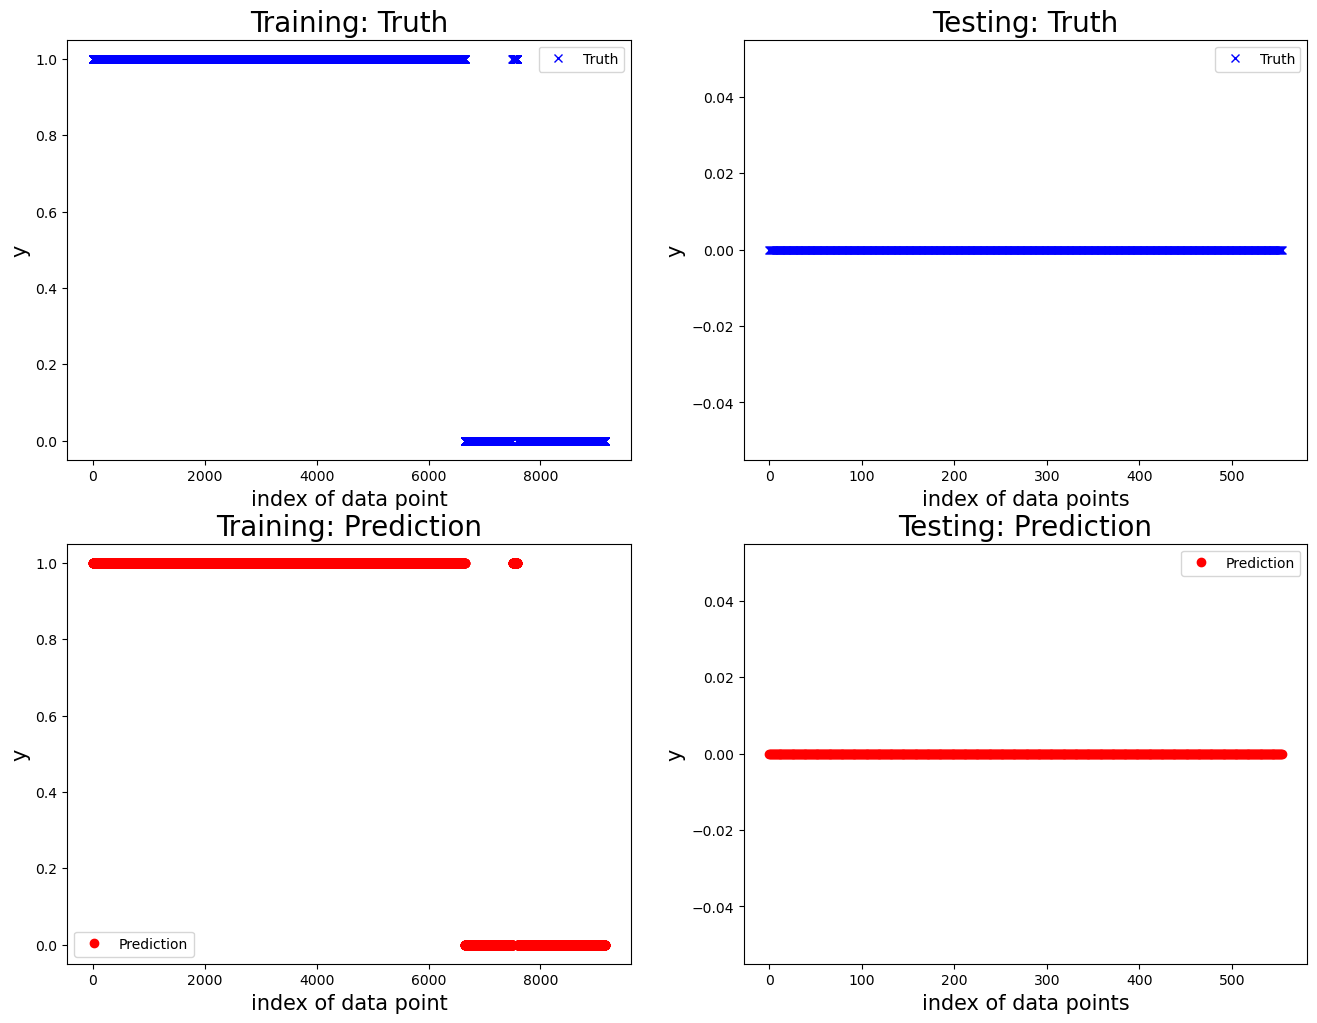


 New cv run:

Training performance, accuracy is: 1.0
Training performance, precision is: 1.0
Training performance, recall: 1.0
Training performance, F1: 1.0


Prediction performance, accuracy is: 0.9942252165543792
Prediction performance, precision is: 0.9879518072289156
Prediction performance, recall is：0.9425287356321839
Prediction performance, F1 is：0.9647058823529412


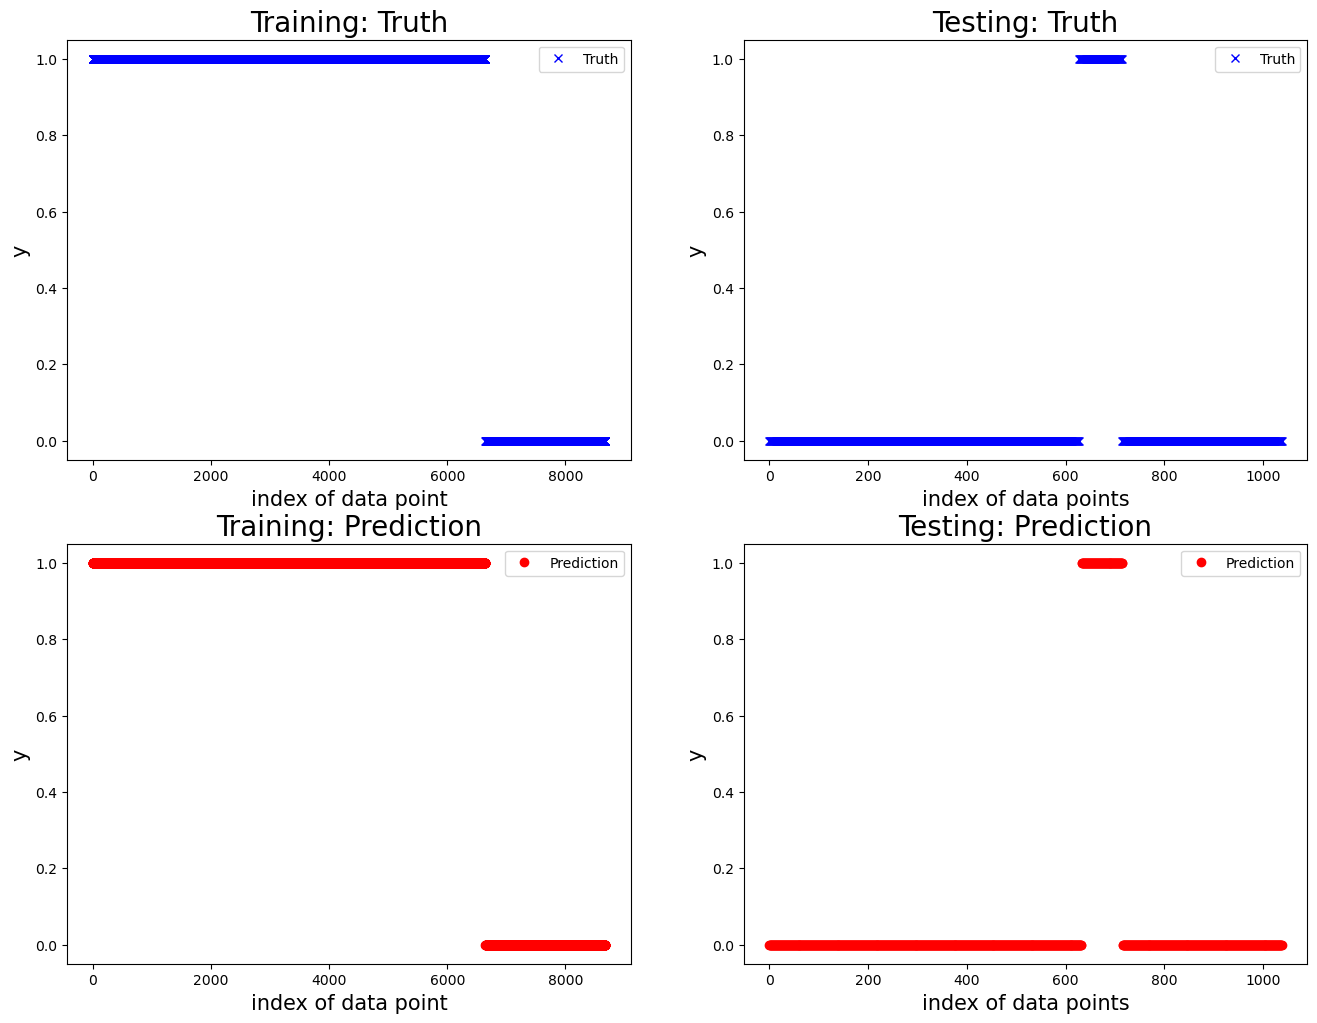


 New cv run:

Training performance, accuracy is: 0.9998818944136058
Training performance, precision is: 1.0
Training performance, recall: 0.9998514998514999
Training performance, F1: 0.9999257444122671


Prediction performance, accuracy is: 0.0023961661341853034
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


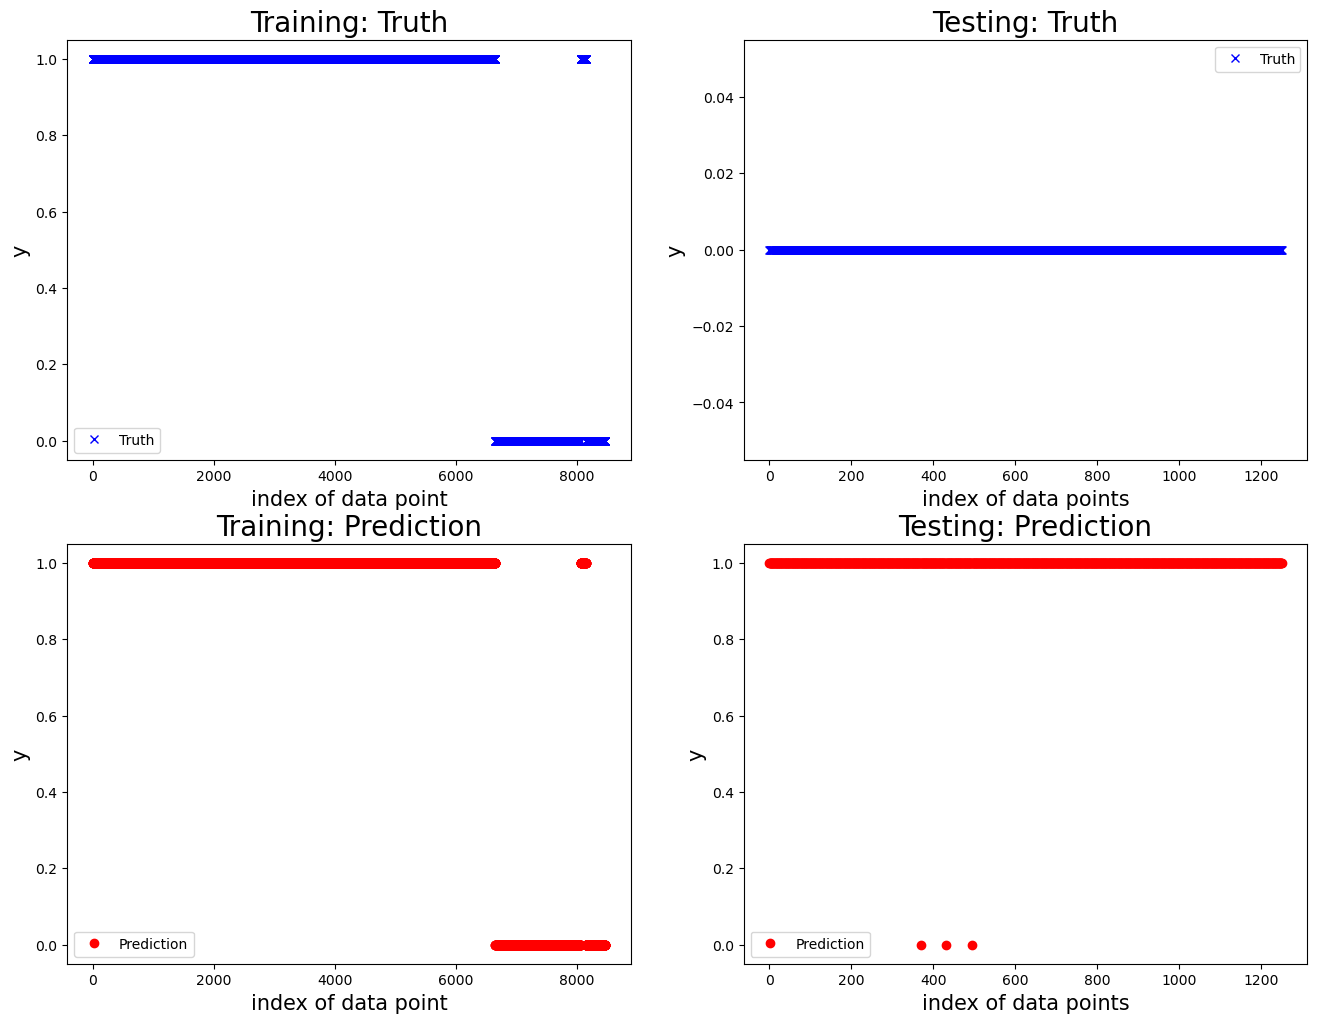

Accuracy     0.799324
Precision    0.797590
Recall       0.788506
F1 score     0.792941
dtype: float64


Model for predicting the label of motor 5:

 New cv run:

Training performance, accuracy is: 0.9993489583333334
Training performance, precision is: 0.9912280701754386
Training performance, recall: 0.9912280701754386
Training performance, F1: 0.9912280701754386


Prediction performance, accuracy is: 0.9894689333533925
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


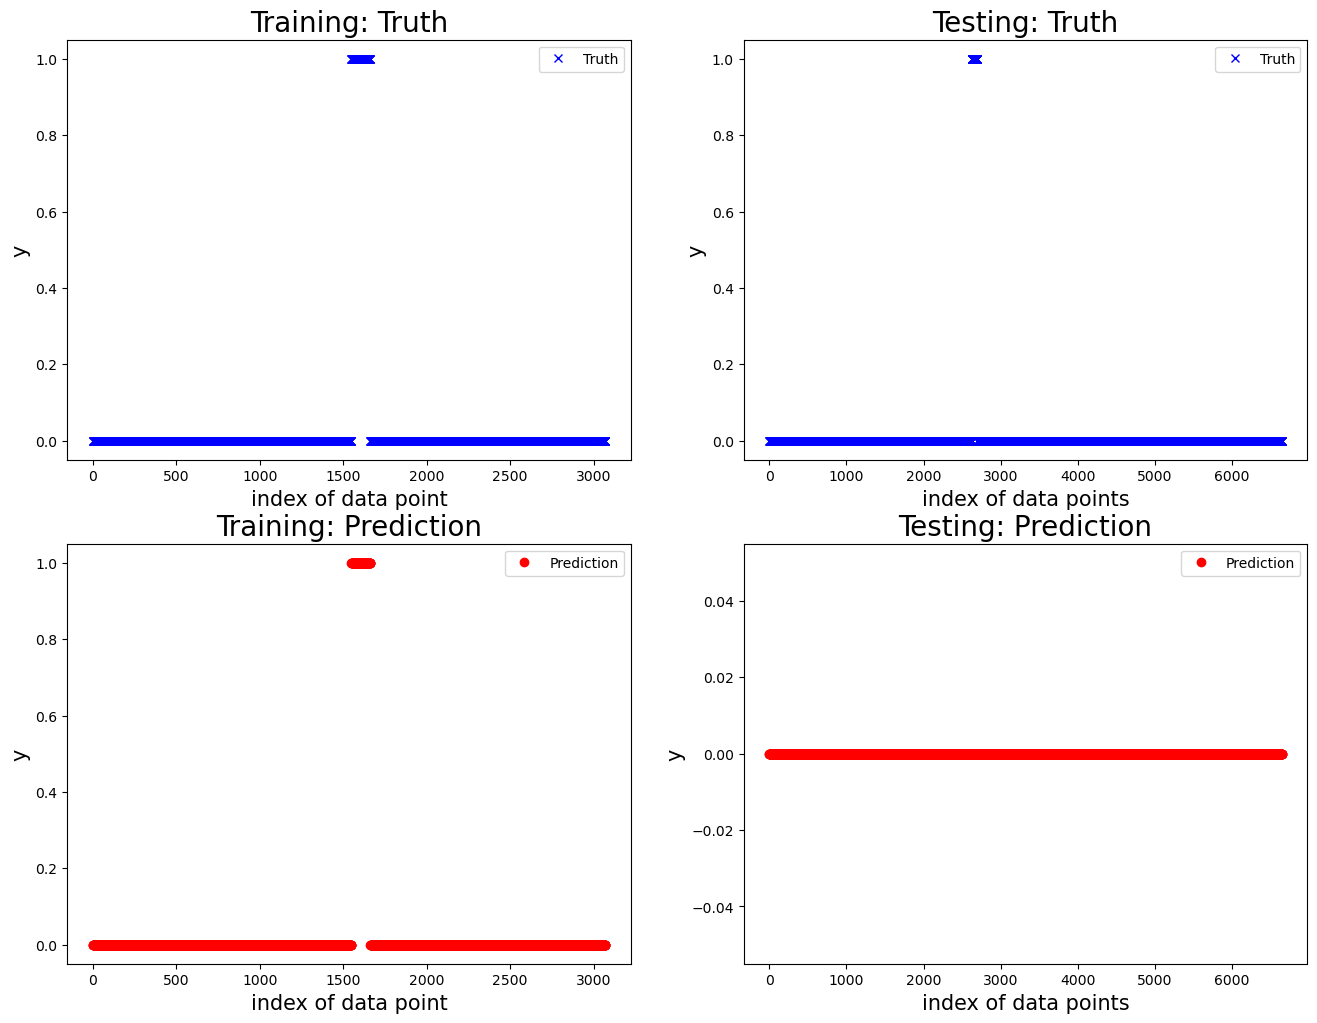


 New cv run:

Training performance, accuracy is: 0.9991572737806805
Training performance, precision is: 0.9731182795698925
Training performance, recall: 0.9836956521739131
Training performance, F1: 0.9783783783783785


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


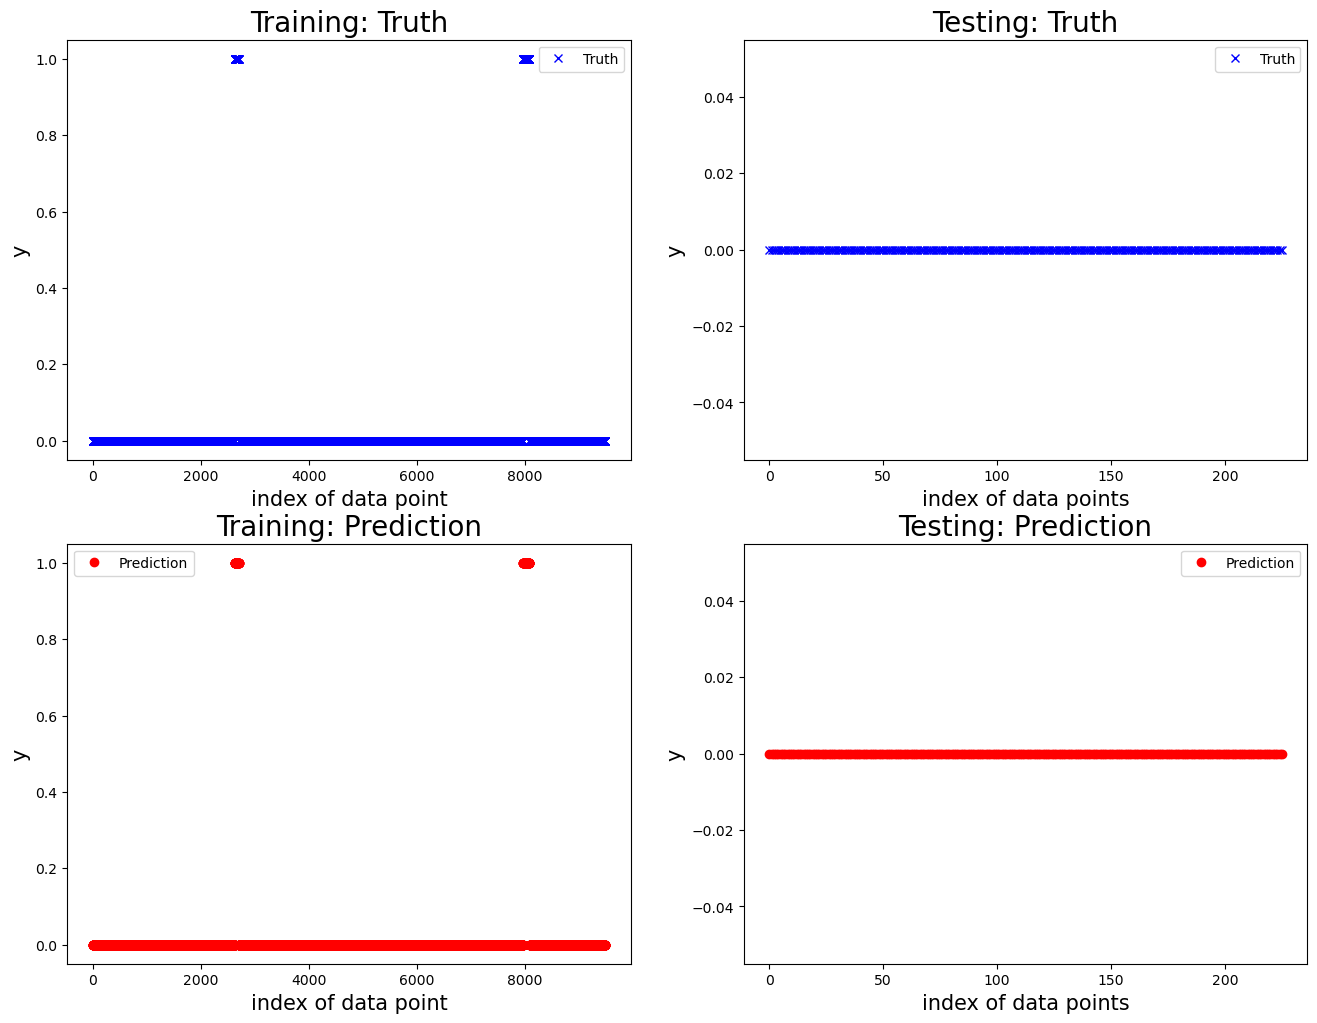


 New cv run:

Training performance, accuracy is: 0.9991270187690965
Training performance, precision is: 0.9731182795698925
Training performance, recall: 0.9836956521739131
Training performance, F1: 0.9783783783783785


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


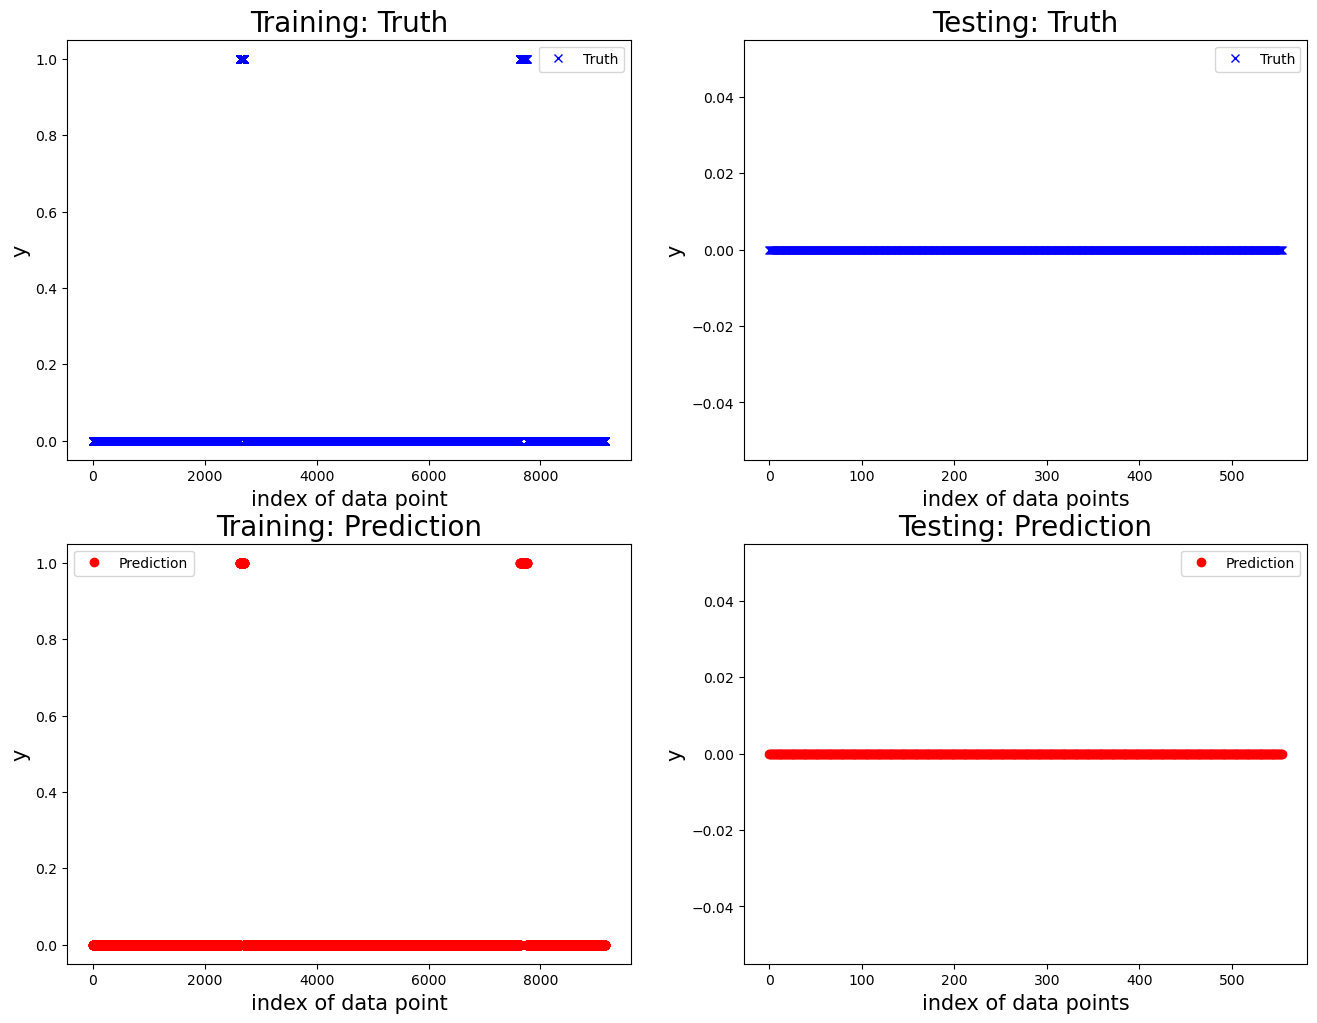


 New cv run:

Training performance, accuracy is: 0.9995391705069124
Training performance, precision is: 0.9583333333333334
Training performance, recall: 0.9857142857142858
Training performance, F1: 0.971830985915493


Prediction performance, accuracy is: 0.9961501443695862
Prediction performance, precision is: 0.9824561403508771
Prediction performance, recall is：0.9824561403508771
Prediction performance, F1 is：0.9824561403508771


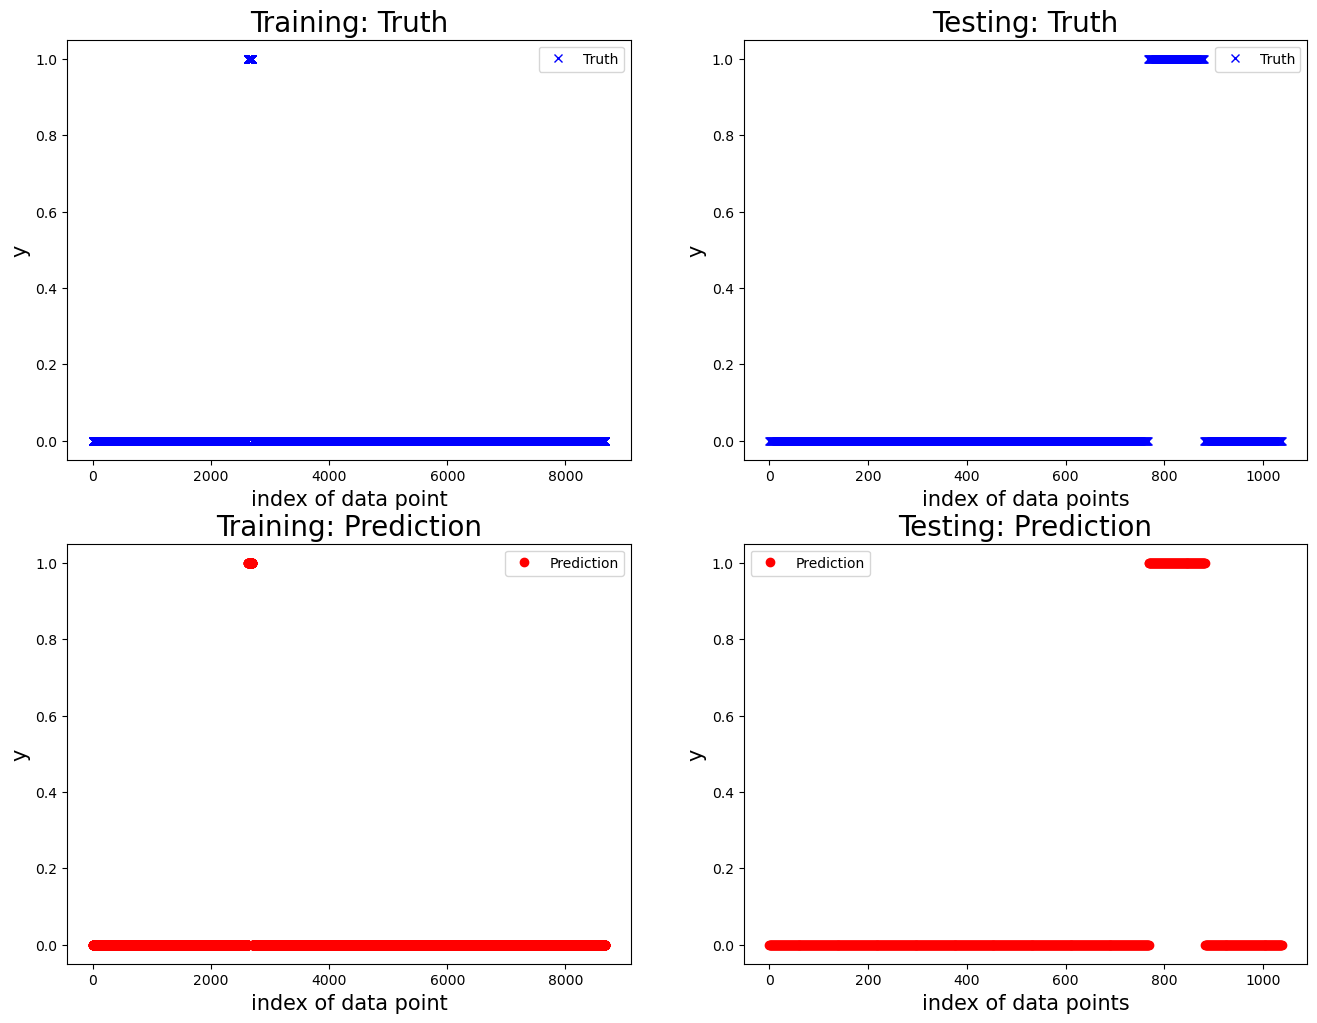


 New cv run:

Training performance, accuracy is: 0.9989370497224519
Training performance, precision is: 0.972972972972973
Training performance, recall: 0.9782608695652174
Training performance, F1: 0.975609756097561


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


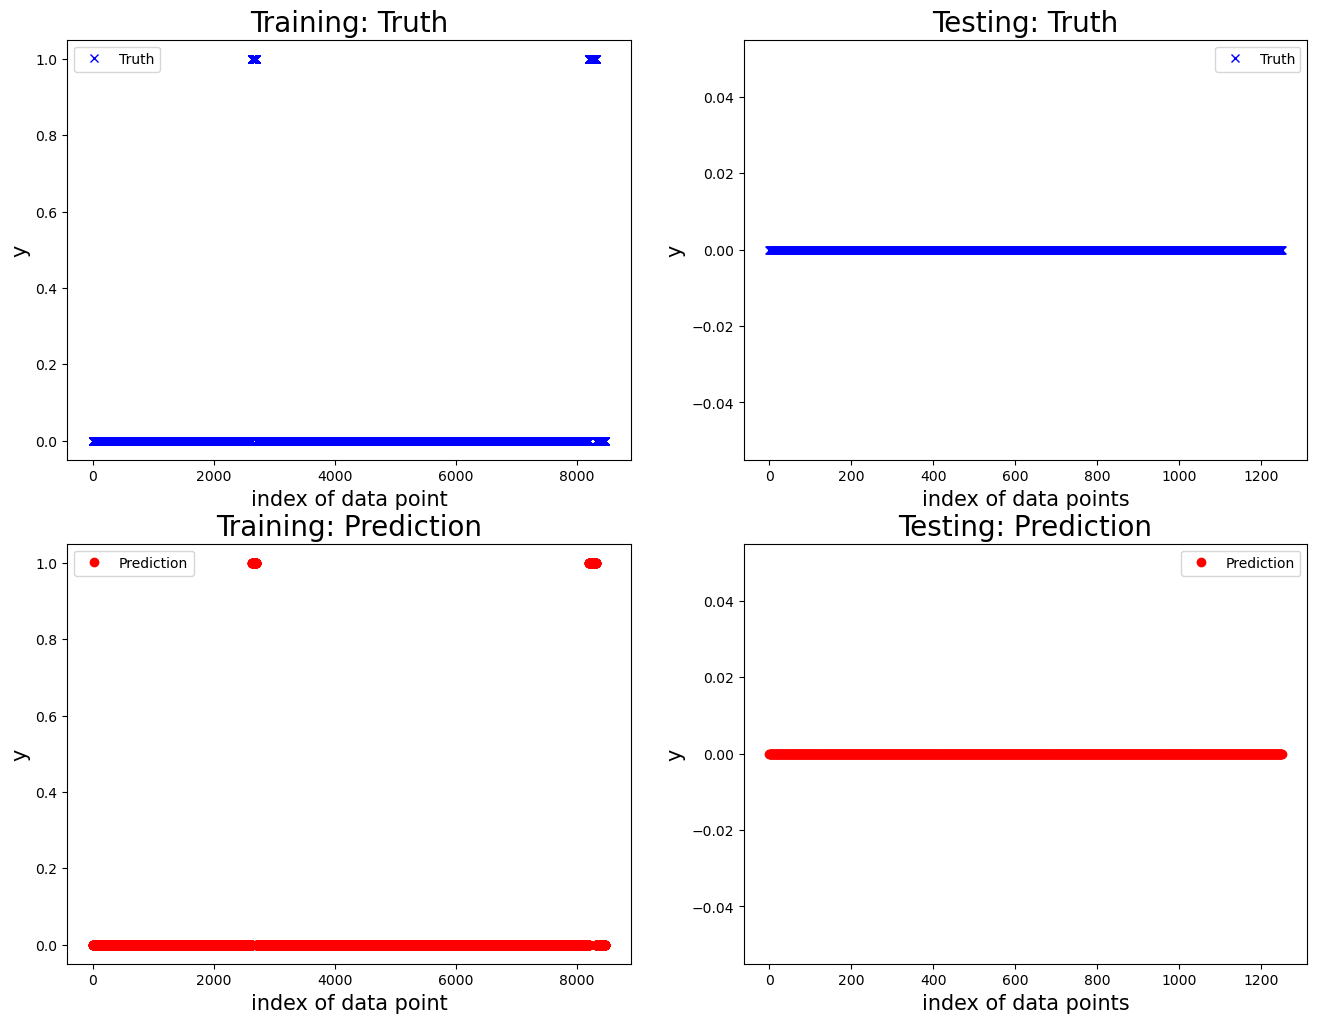

Accuracy     0.997124
Precision    0.796491
Recall       0.796491
F1 score     0.796491
dtype: float64


Model for predicting the label of motor 6:

 New cv run:

Training performance, accuracy is: 0.99609375
Training performance, precision is: 0.9712230215827338
Training performance, recall: 0.9854014598540146
Training performance, F1: 0.9782608695652174


Prediction performance, accuracy is: 0.9992477809538137
Prediction performance, precision is: 0.9983766233766234
Prediction performance, recall is：0.9935379644588045
Prediction performance, F1 is：0.9959514170040487


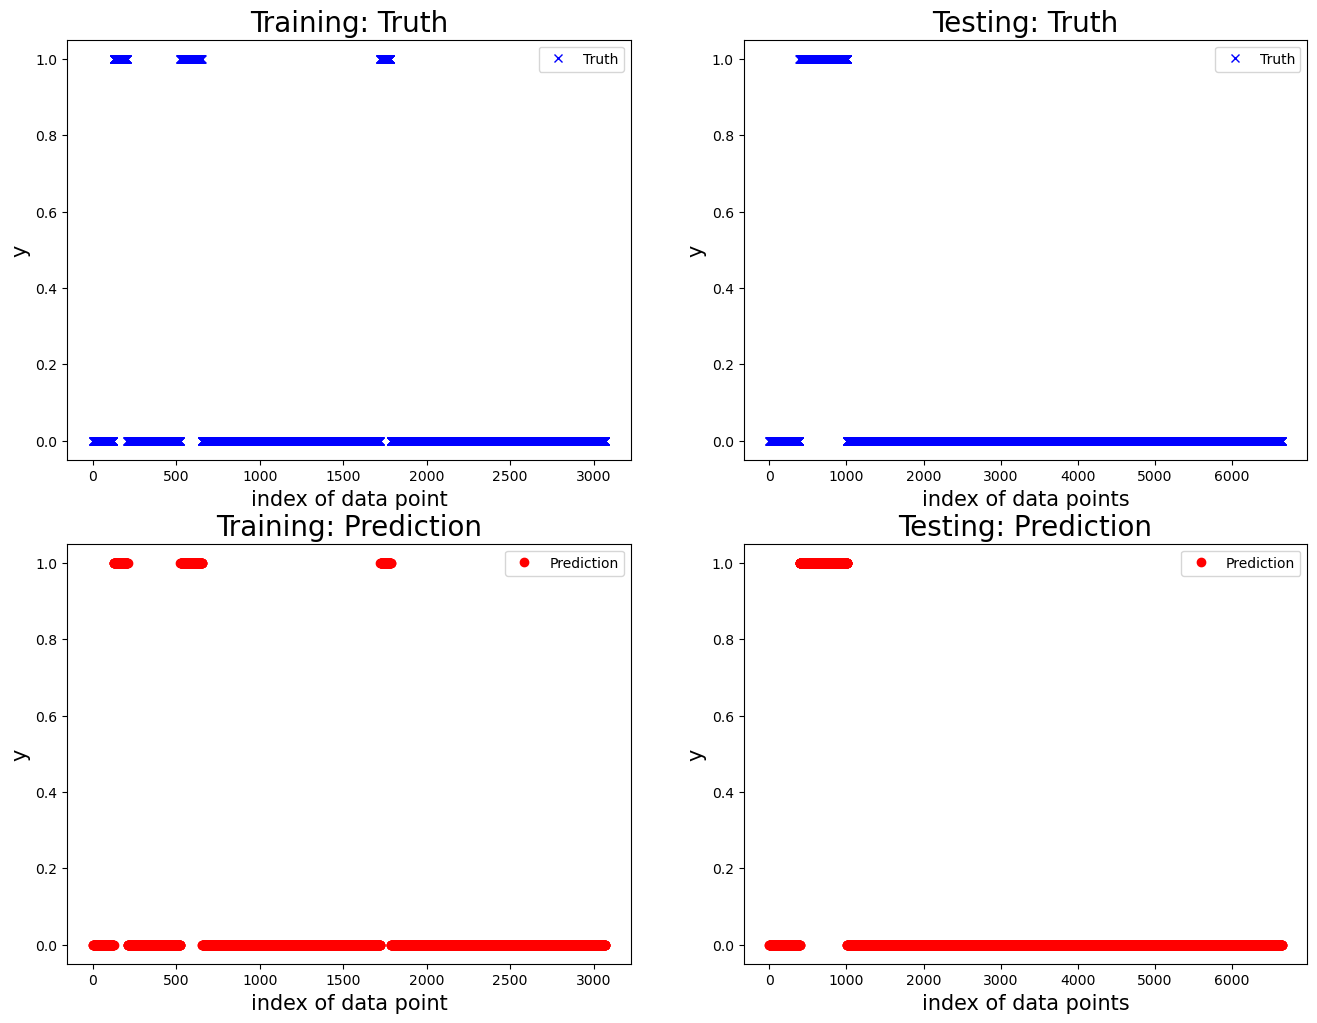


 New cv run:

Training performance, accuracy is: 0.9990519330032656
Training performance, precision is: 0.9926289926289926
Training performance, recall: 0.9963008631319359
Training performance, F1: 0.9944615384615384


Prediction performance, accuracy is: 0.9867256637168141
Prediction performance, precision is: 0.9759036144578314
Prediction performance, recall is：0.9878048780487805
Prediction performance, F1 is：0.9818181818181818


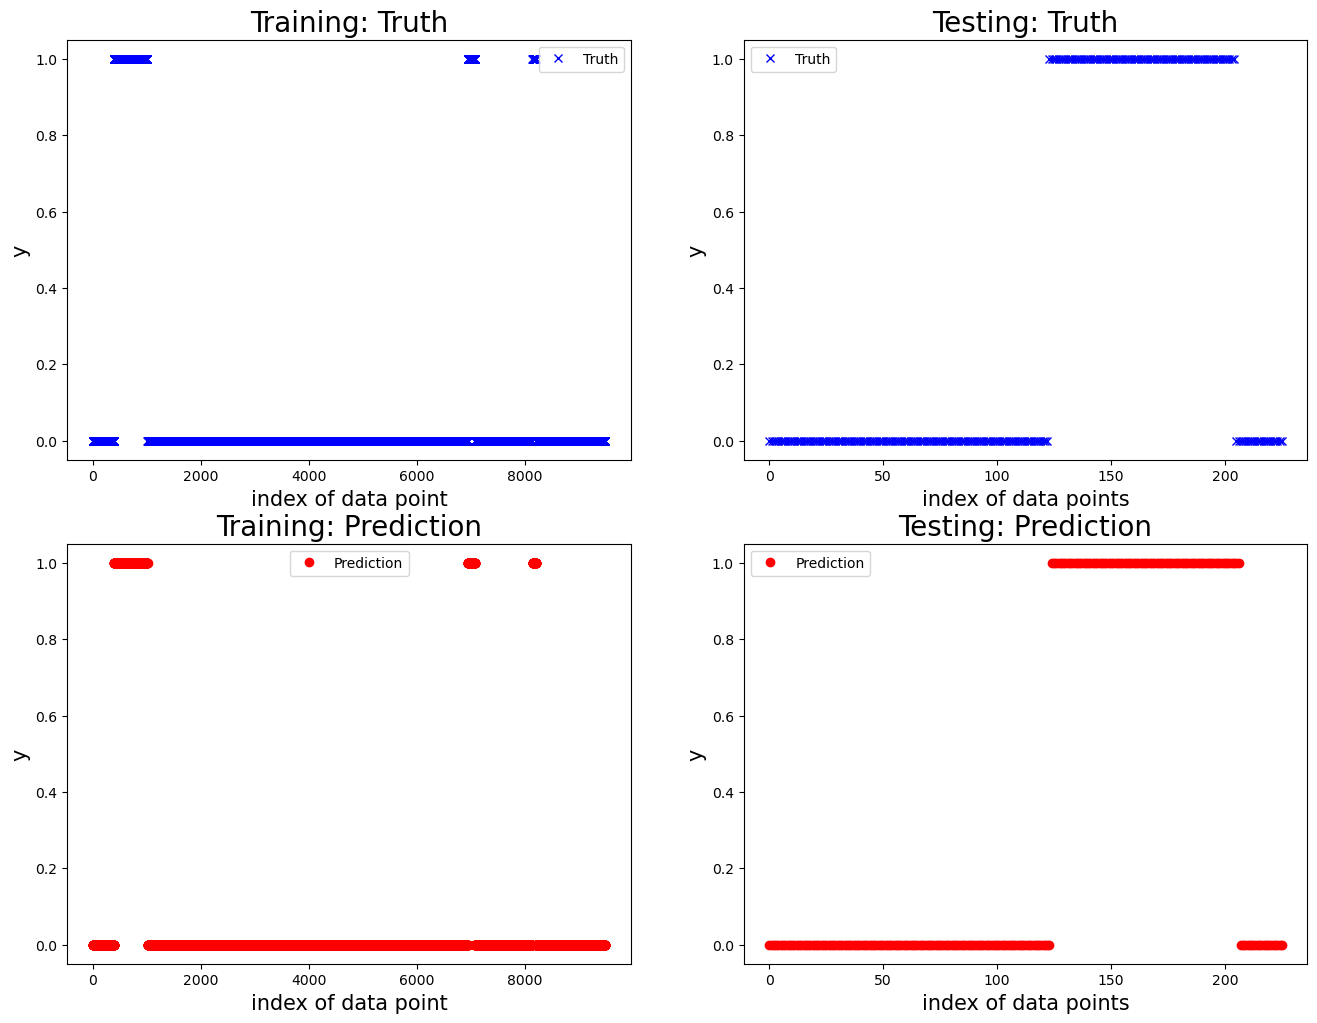


 New cv run:

Training performance, accuracy is: 0.998254037538193
Training performance, precision is: 0.9882506527415144
Training performance, recall: 0.9908376963350786
Training performance, F1: 0.9895424836601306


Prediction performance, accuracy is: 0.990990990990991
Prediction performance, precision is: 0.9769230769230769
Prediction performance, recall is：0.9844961240310077
Prediction performance, F1 is：0.9806949806949806


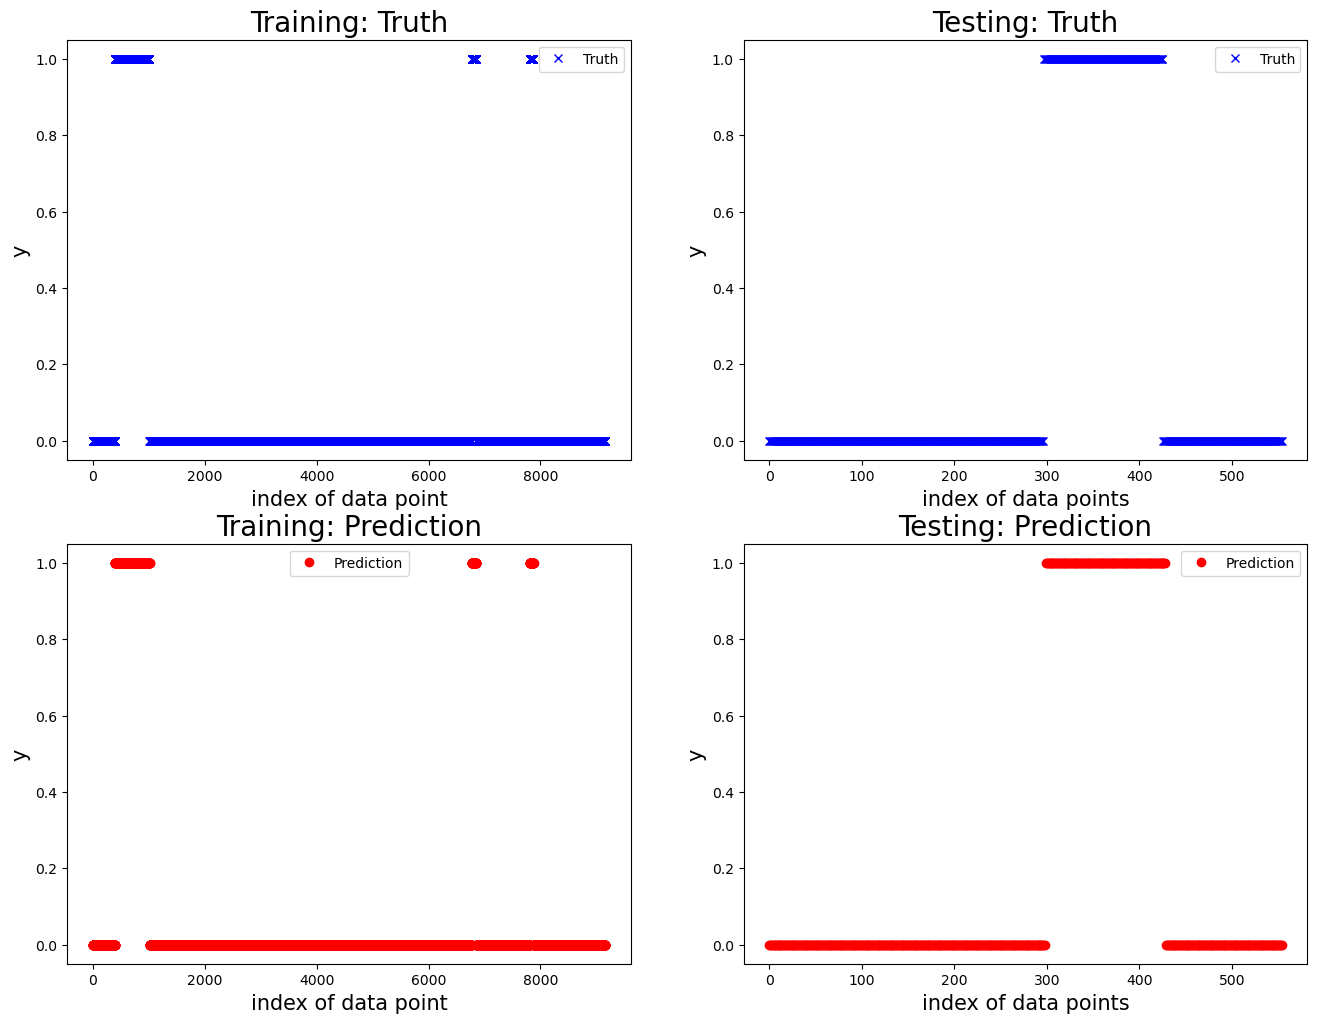


 New cv run:

Training performance, accuracy is: 0.998963133640553
Training performance, precision is: 0.992797118847539
Training performance, recall: 0.9963855421686747
Training performance, F1: 0.9945880938063739


Prediction performance, accuracy is: 0.9971126082771896
Prediction performance, precision is: 0.9838709677419355
Prediction performance, recall is：0.9682539682539683
Prediction performance, F1 is：0.976


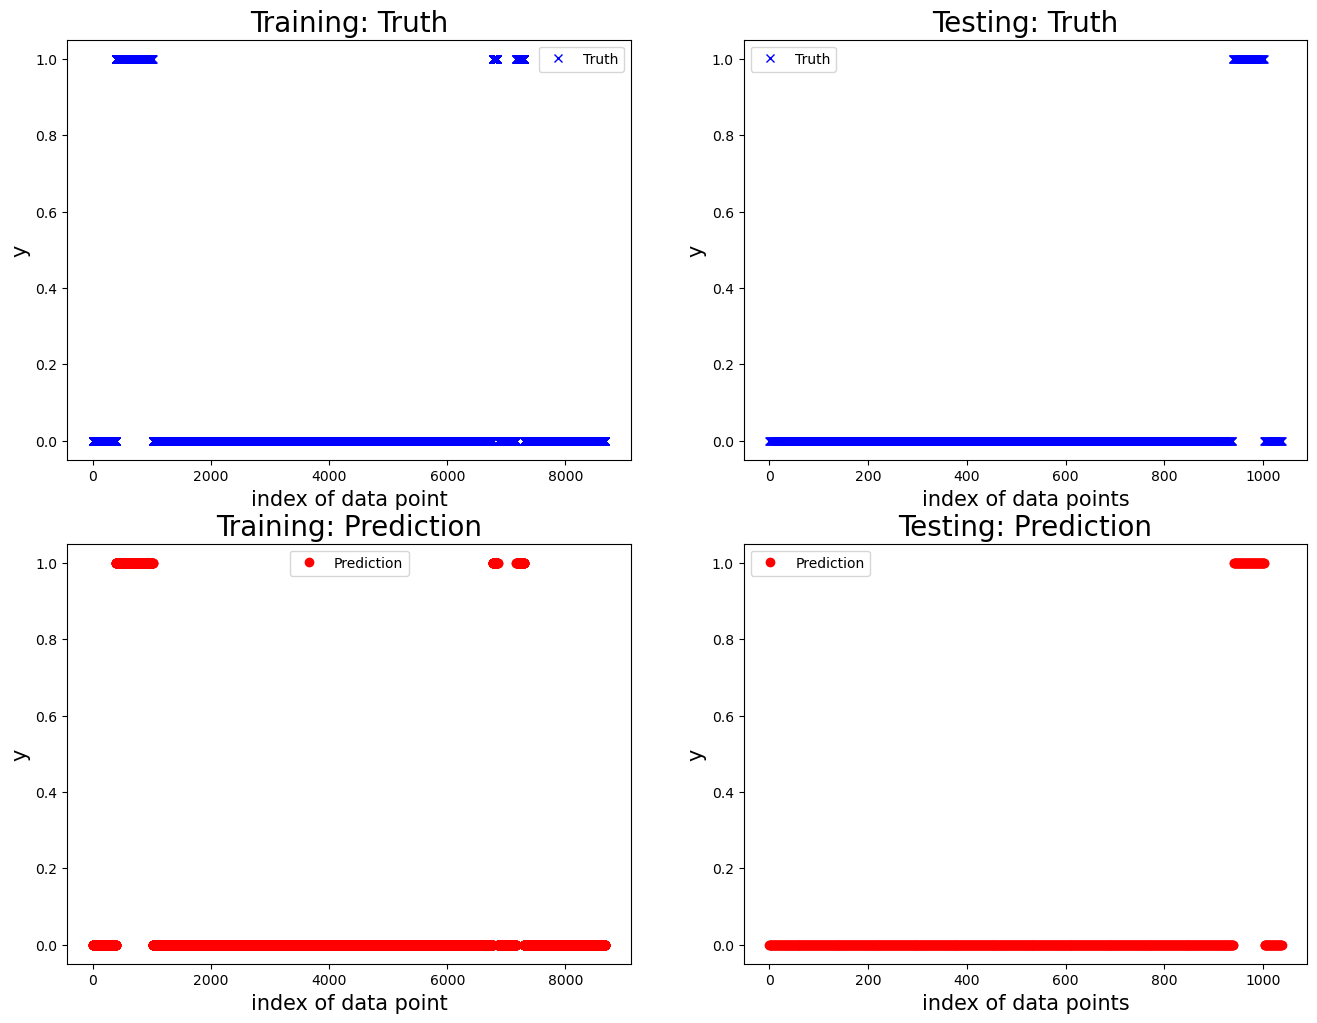


 New cv run:

Training performance, accuracy is: 0.9987008385496634
Training performance, precision is: 0.9921875
Training performance, recall: 0.9955207166853304
Training performance, F1: 0.9938513135830073


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


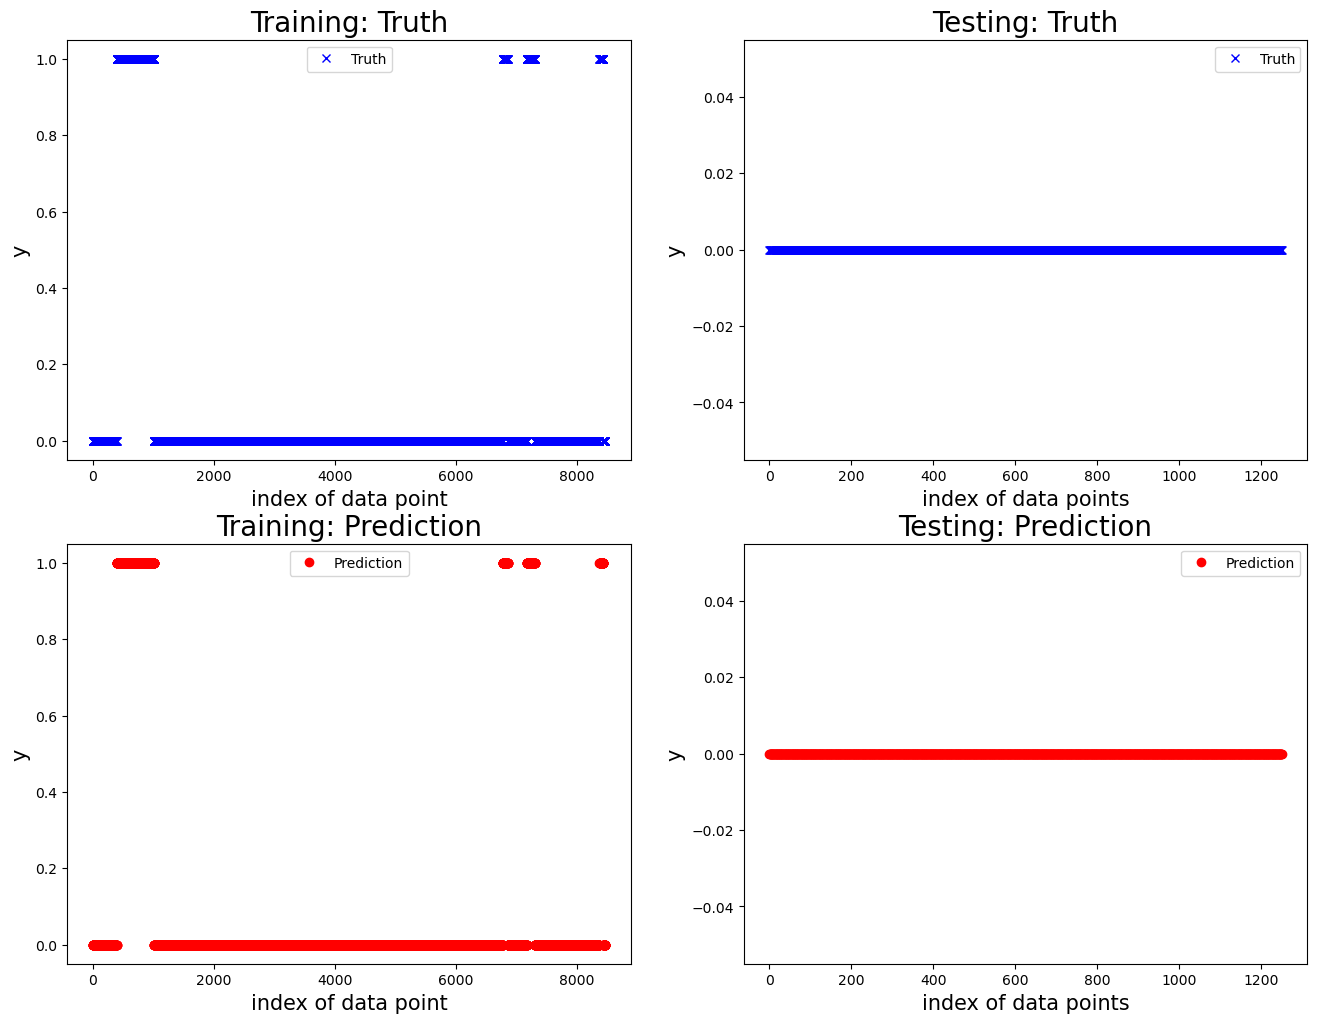

Accuracy     0.994815
Precision    0.987015
Recall       0.986819
F1 score     0.986893
dtype: float64




In [15]:
from sklearn.model_selection import GridSearchCV

# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('mdl', LogisticRegression(class_weight='balanced'))    # Step 2: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define hyperparameters to search
param_grid = {
    'mdl__penalty': ['l1', 'l2'],  # Regularization penalty
    'mdl__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=5)

all_results = run_all_motors(df_data, grid_search, window_size=5, single_run_result=True, mdl_type='clf')